In [1]:
import torch
import numpy as np
from tqdm import tqdm
from torchvision import transforms, datasets

from core.Util import show_plt
from core.ConditionalGAN import Discriminator, Generator

In [3]:
device = 'cpu'
if torch.mps.is_available():
    device = 'mps'
elif torch.cuda.is_available():
    device = 'cuda'

print(device)

mps


In [3]:
train_dataset = datasets.MNIST(root = "../data/",
                               train = True,
                               transform = transforms.ToTensor())

In [4]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion = torch.nn.BCELoss()
disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
genr_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)

In [5]:
def train_step(model, x, target, criterion, optimizer):
    model.train()
    pred = model(x)
    loss = criterion(pred, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

### 주의사항
 - 모델에 시드 값이 정규분포를 따를때 생성기의 학습이 잘됨 -> 그냥 랜덤값이면 학습 안됨
 - 모델 만들때, Normalizer, Activation 함수가 어떤것이냐에 따라 차이를 많이 보임
   - 현재 코드에서는 LayerNormalizer, LeakliyRelu 가 가장 빠르게 모드 붕괴를 해소함

  0%|                                               | 0/4 [00:00<?, ?it/s, 1/60000, dis_loss: 0.0736, gen_loss: 2.8451]

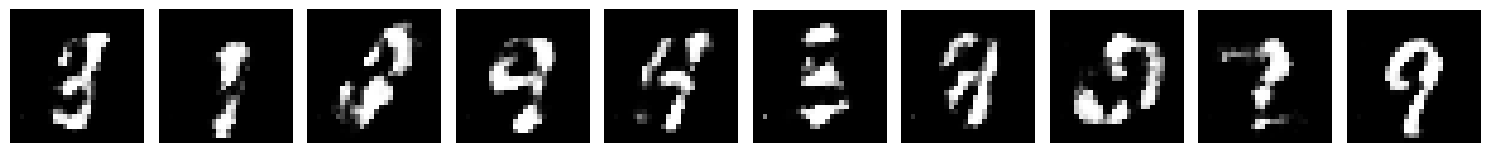

  0%|                                            | 0/4 [00:04<?, ?it/s, 1001/60000, dis_loss: 0.2684, gen_loss: 3.0668]

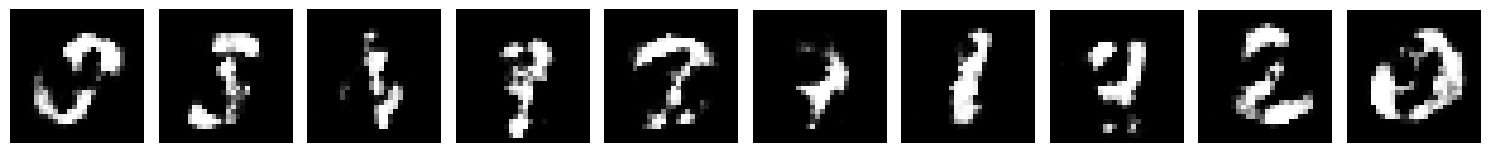

  0%|                                            | 0/4 [00:09<?, ?it/s, 2001/60000, dis_loss: 0.2603, gen_loss: 2.8382]

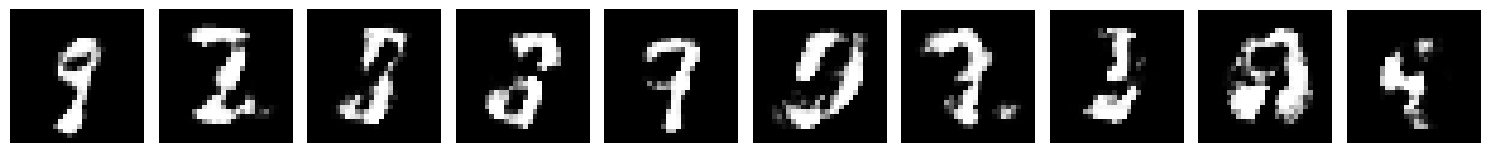

  0%|                                            | 0/4 [00:15<?, ?it/s, 3001/60000, dis_loss: 0.2467, gen_loss: 2.8958]

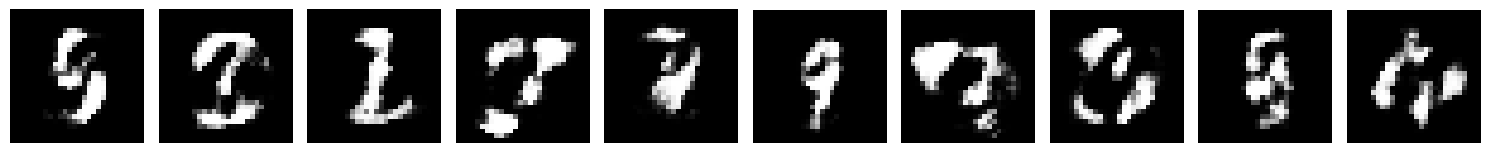

  0%|                                            | 0/4 [00:20<?, ?it/s, 4001/60000, dis_loss: 0.2439, gen_loss: 2.8763]

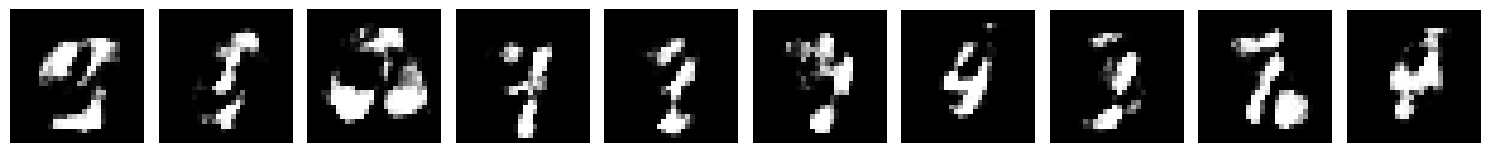

  0%|                                            | 0/4 [00:26<?, ?it/s, 5001/60000, dis_loss: 0.2407, gen_loss: 2.8987]

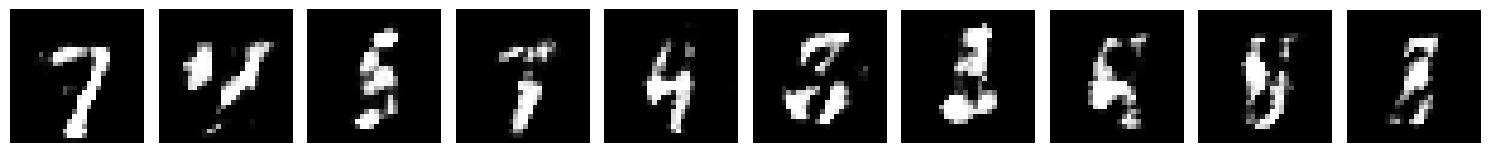

  0%|                                            | 0/4 [00:31<?, ?it/s, 6001/60000, dis_loss: 0.2405, gen_loss: 2.8854]

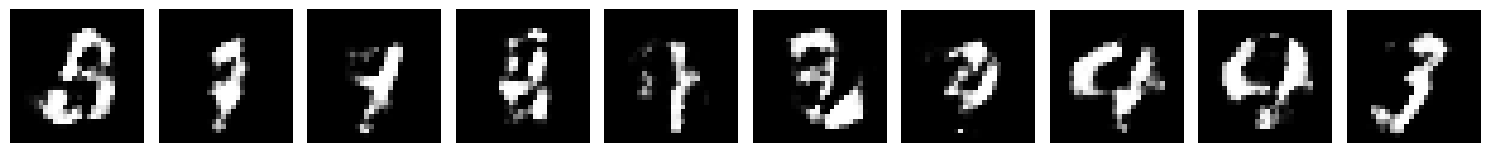

  0%|                                            | 0/4 [00:37<?, ?it/s, 7001/60000, dis_loss: 0.2470, gen_loss: 2.8755]

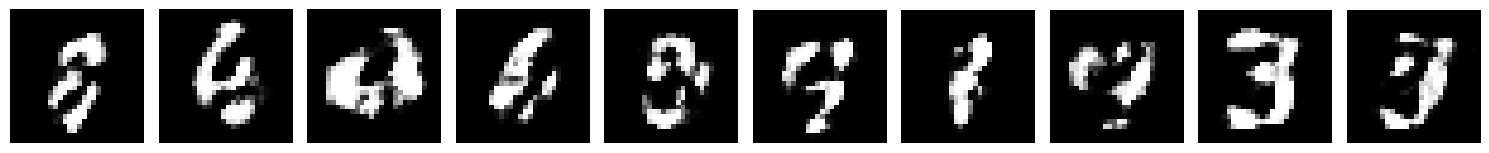

  0%|                                            | 0/4 [00:43<?, ?it/s, 8001/60000, dis_loss: 0.2478, gen_loss: 2.8639]

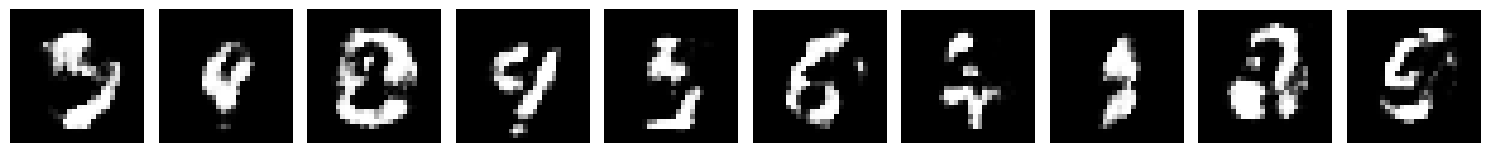

  0%|                                            | 0/4 [00:49<?, ?it/s, 9001/60000, dis_loss: 0.2506, gen_loss: 2.8353]

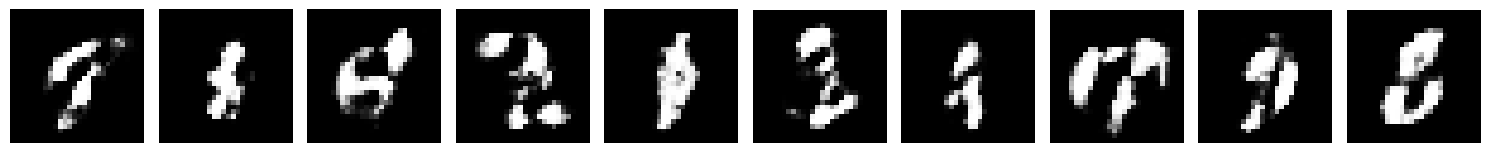

  0%|                                           | 0/4 [00:55<?, ?it/s, 10001/60000, dis_loss: 0.2490, gen_loss: 2.8486]

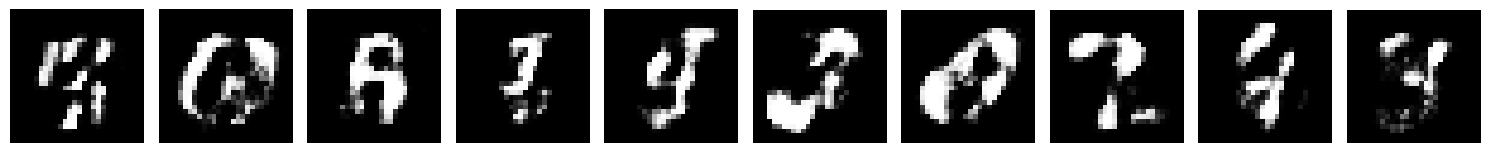

  0%|                                           | 0/4 [01:01<?, ?it/s, 11001/60000, dis_loss: 0.2511, gen_loss: 2.8288]

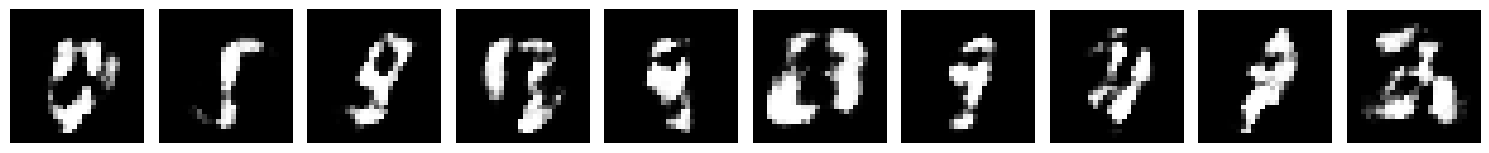

  0%|                                           | 0/4 [01:08<?, ?it/s, 12001/60000, dis_loss: 0.2526, gen_loss: 2.8247]

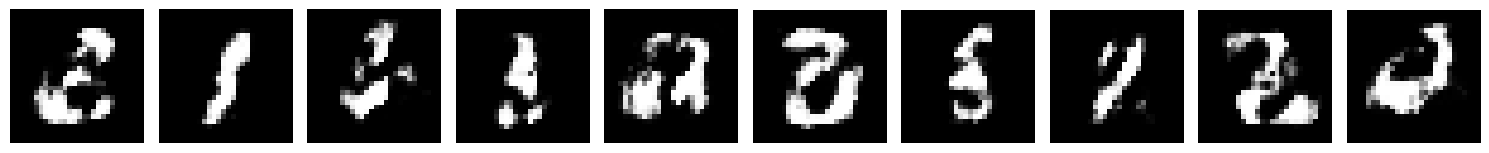

  0%|                                           | 0/4 [01:14<?, ?it/s, 13001/60000, dis_loss: 0.2538, gen_loss: 2.8198]

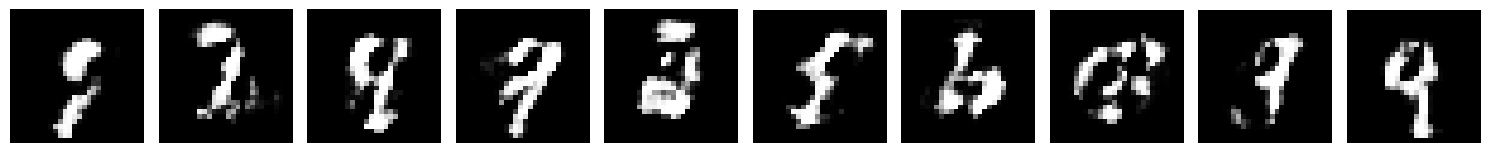

  0%|                                           | 0/4 [01:20<?, ?it/s, 14001/60000, dis_loss: 0.2531, gen_loss: 2.8157]

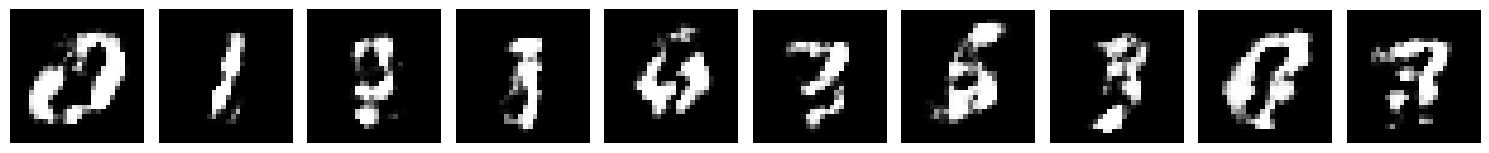

  0%|                                           | 0/4 [01:27<?, ?it/s, 15001/60000, dis_loss: 0.2537, gen_loss: 2.8125]

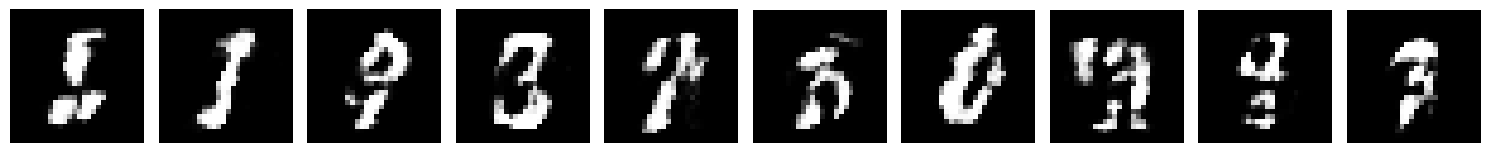

  0%|                                           | 0/4 [01:34<?, ?it/s, 16001/60000, dis_loss: 0.2550, gen_loss: 2.8021]

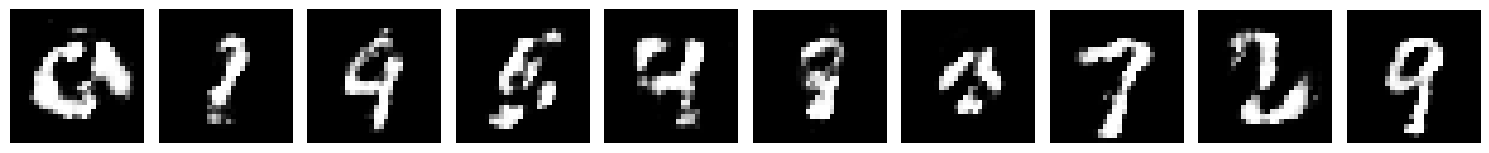

  0%|                                           | 0/4 [01:40<?, ?it/s, 17001/60000, dis_loss: 0.2571, gen_loss: 2.7912]

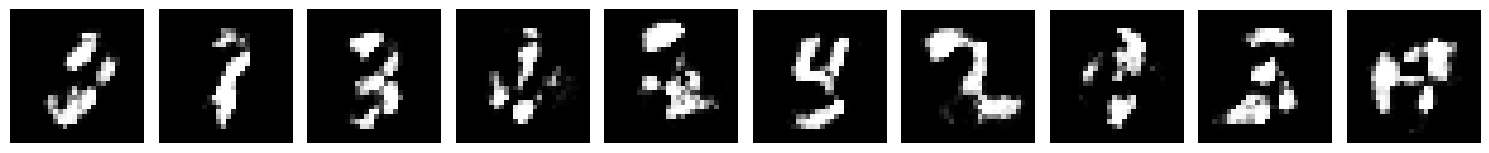

  0%|                                           | 0/4 [01:47<?, ?it/s, 18001/60000, dis_loss: 0.2578, gen_loss: 2.7873]

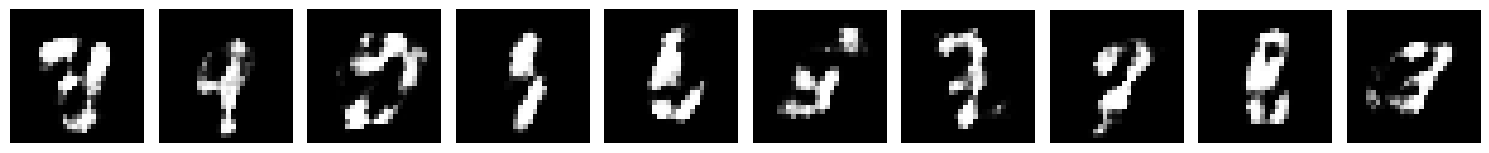

  0%|                                           | 0/4 [01:54<?, ?it/s, 19001/60000, dis_loss: 0.2594, gen_loss: 2.7780]

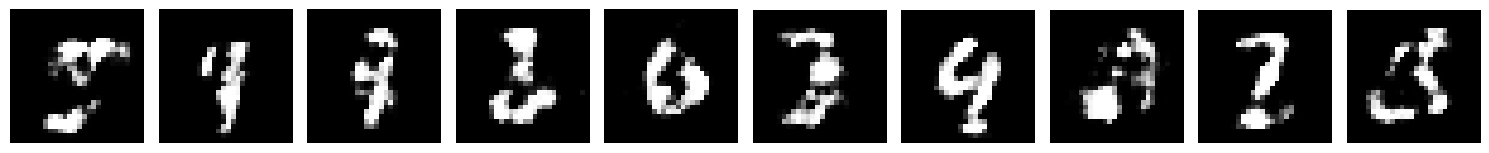

  0%|                                           | 0/4 [02:01<?, ?it/s, 20001/60000, dis_loss: 0.2608, gen_loss: 2.7614]

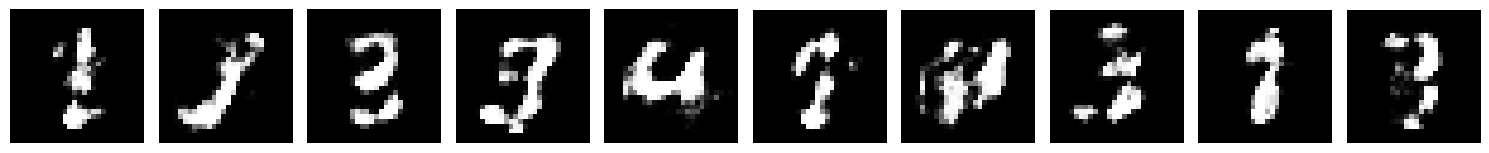

  0%|                                           | 0/4 [02:08<?, ?it/s, 21001/60000, dis_loss: 0.2616, gen_loss: 2.7534]

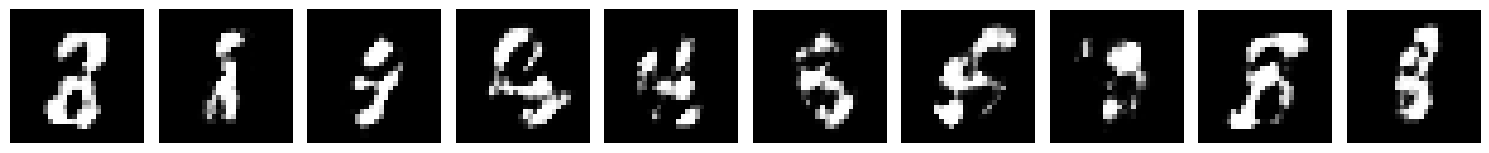

  0%|                                           | 0/4 [02:15<?, ?it/s, 22001/60000, dis_loss: 0.2620, gen_loss: 2.7412]

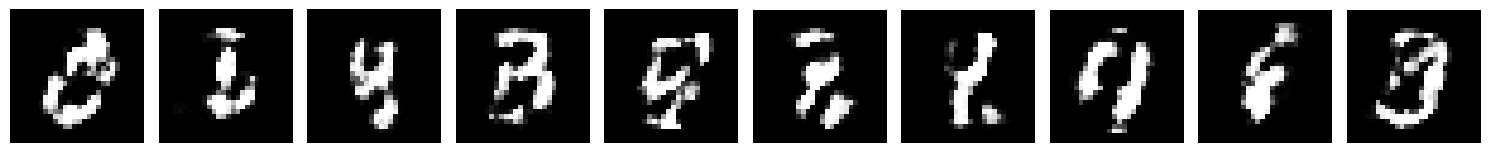

  0%|                                           | 0/4 [02:22<?, ?it/s, 23001/60000, dis_loss: 0.2626, gen_loss: 2.7400]

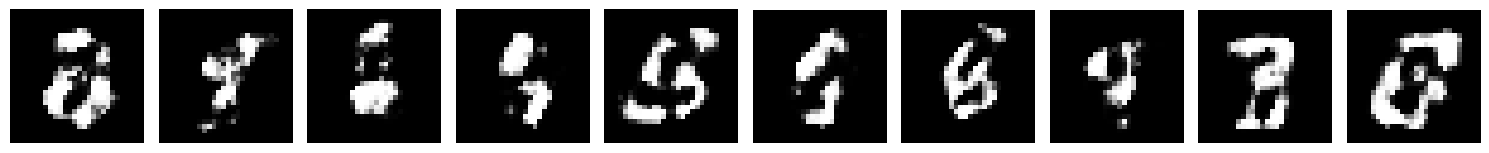

  0%|                                           | 0/4 [02:29<?, ?it/s, 24001/60000, dis_loss: 0.2637, gen_loss: 2.7373]

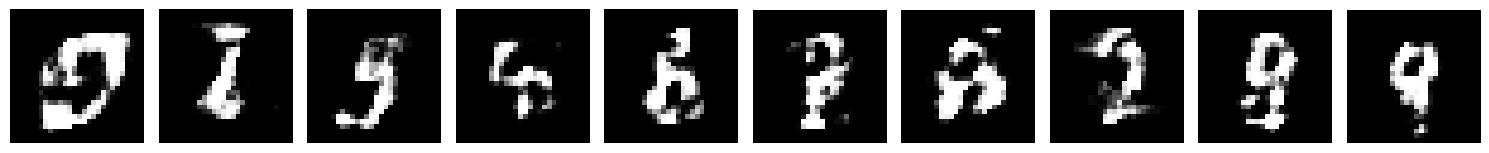

  0%|                                           | 0/4 [02:37<?, ?it/s, 25001/60000, dis_loss: 0.2646, gen_loss: 2.7271]

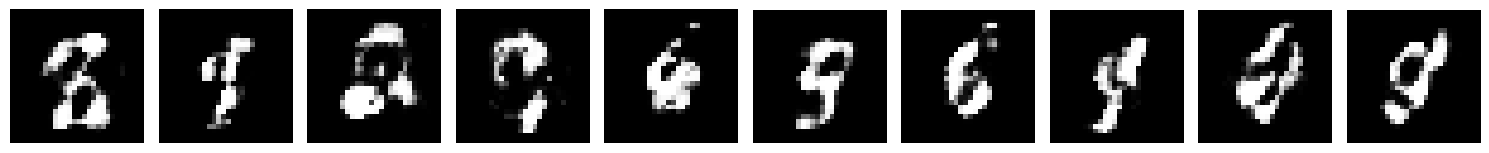

  0%|                                           | 0/4 [02:44<?, ?it/s, 26001/60000, dis_loss: 0.2648, gen_loss: 2.7211]

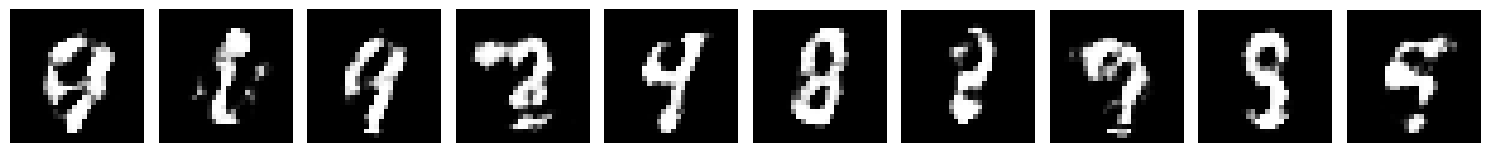

  0%|                                           | 0/4 [02:51<?, ?it/s, 27001/60000, dis_loss: 0.2665, gen_loss: 2.7103]

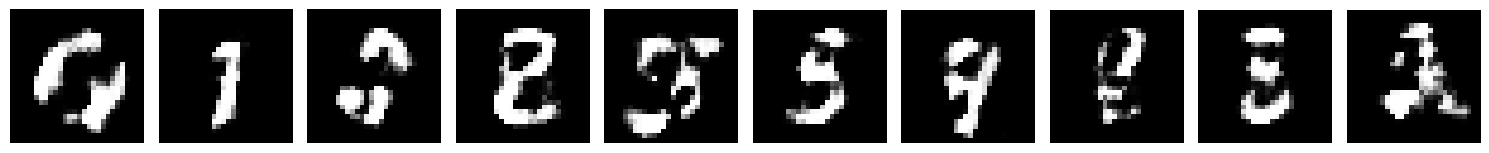

  0%|                                           | 0/4 [02:59<?, ?it/s, 28001/60000, dis_loss: 0.2667, gen_loss: 2.7072]

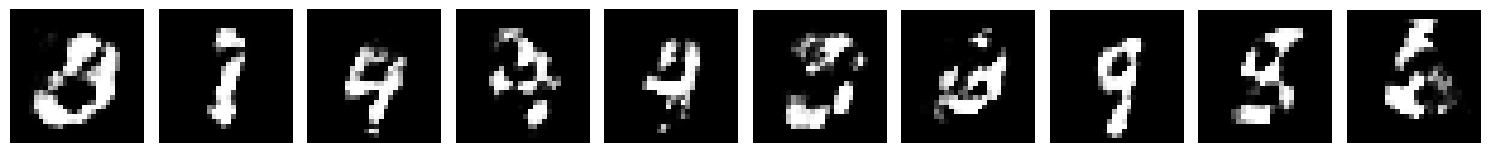

  0%|                                           | 0/4 [03:07<?, ?it/s, 29001/60000, dis_loss: 0.2676, gen_loss: 2.6995]

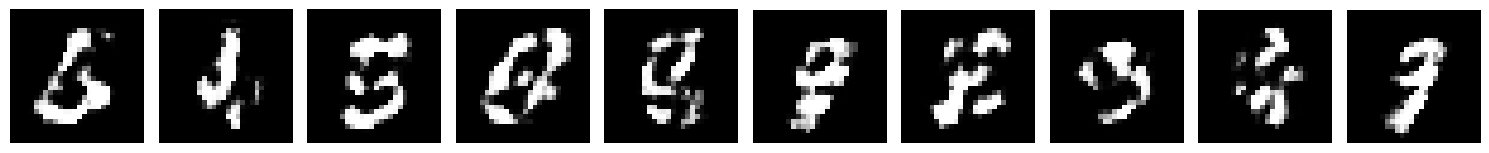

  0%|                                           | 0/4 [03:14<?, ?it/s, 30001/60000, dis_loss: 0.2681, gen_loss: 2.6932]

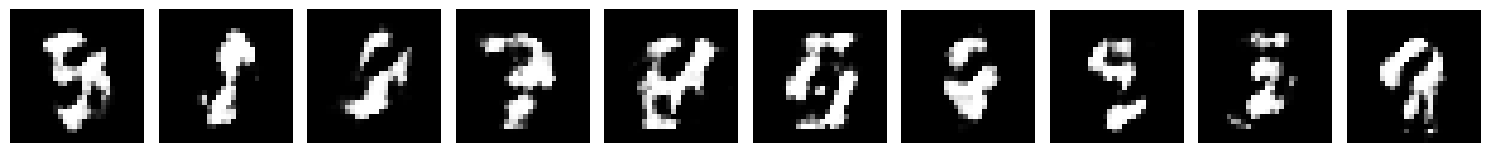

  0%|                                           | 0/4 [03:22<?, ?it/s, 31001/60000, dis_loss: 0.2683, gen_loss: 2.6881]

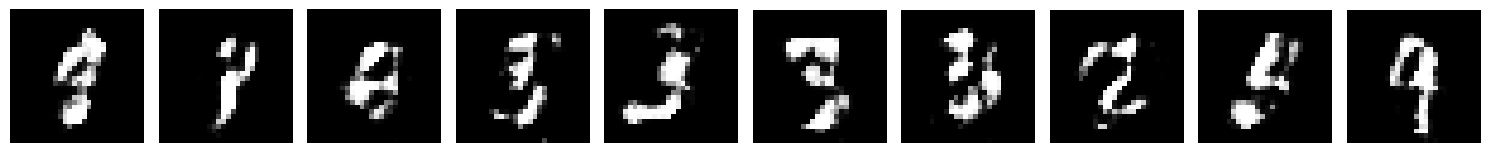

  0%|                                           | 0/4 [03:30<?, ?it/s, 32001/60000, dis_loss: 0.2683, gen_loss: 2.6841]

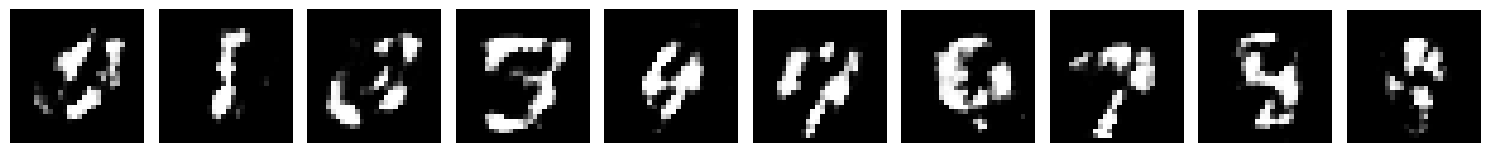

  0%|                                           | 0/4 [03:38<?, ?it/s, 33001/60000, dis_loss: 0.2689, gen_loss: 2.6770]

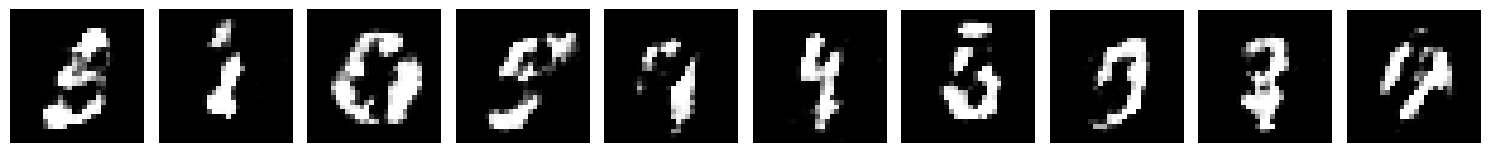

  0%|                                           | 0/4 [03:46<?, ?it/s, 34001/60000, dis_loss: 0.2692, gen_loss: 2.6715]

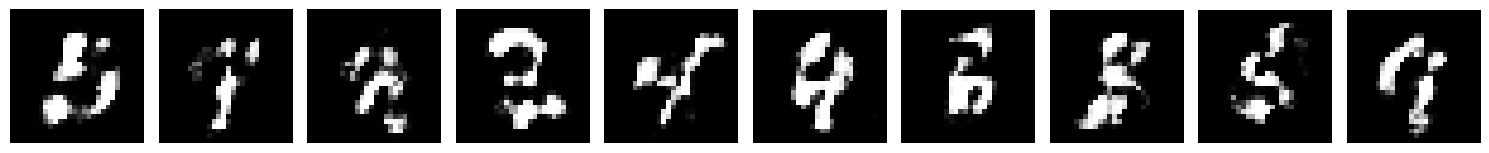

  0%|                                           | 0/4 [03:54<?, ?it/s, 35001/60000, dis_loss: 0.2698, gen_loss: 2.6693]

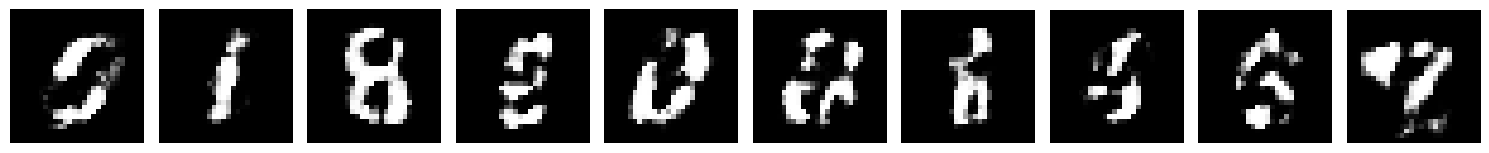

  0%|                                           | 0/4 [04:02<?, ?it/s, 36001/60000, dis_loss: 0.2699, gen_loss: 2.6695]

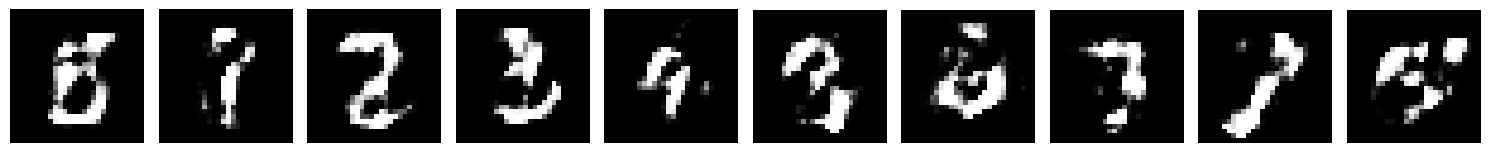

  0%|                                           | 0/4 [04:11<?, ?it/s, 37001/60000, dis_loss: 0.2711, gen_loss: 2.6629]

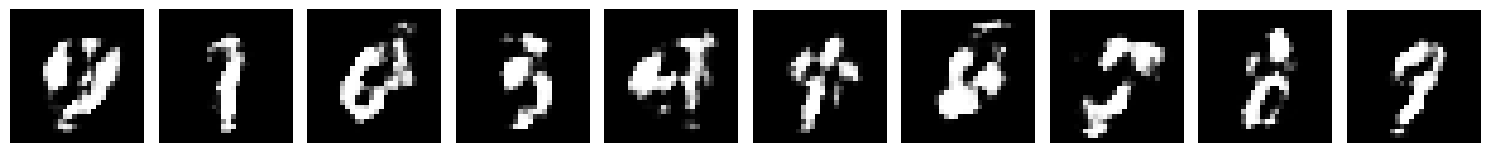

  0%|                                           | 0/4 [04:19<?, ?it/s, 38001/60000, dis_loss: 0.2716, gen_loss: 2.6569]

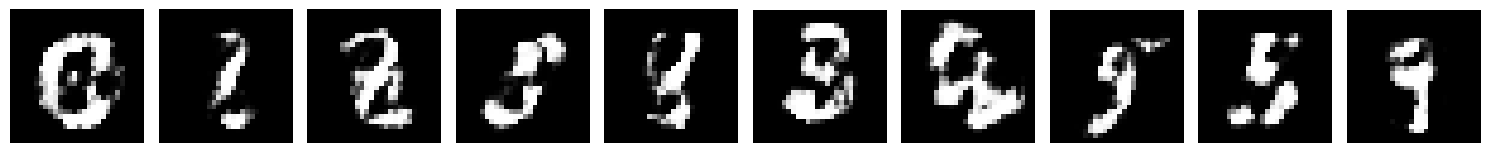

  0%|                                           | 0/4 [04:28<?, ?it/s, 39001/60000, dis_loss: 0.2724, gen_loss: 2.6509]

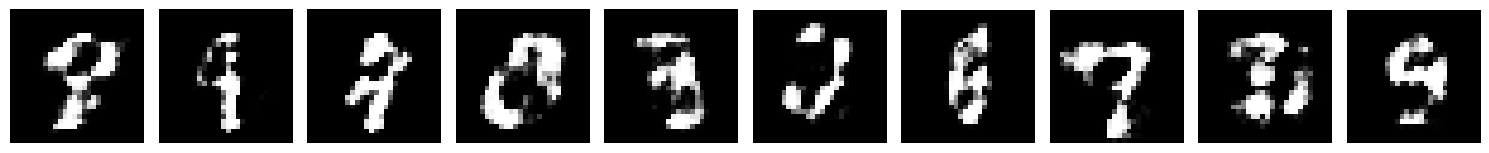

  0%|                                           | 0/4 [04:36<?, ?it/s, 40001/60000, dis_loss: 0.2735, gen_loss: 2.6419]

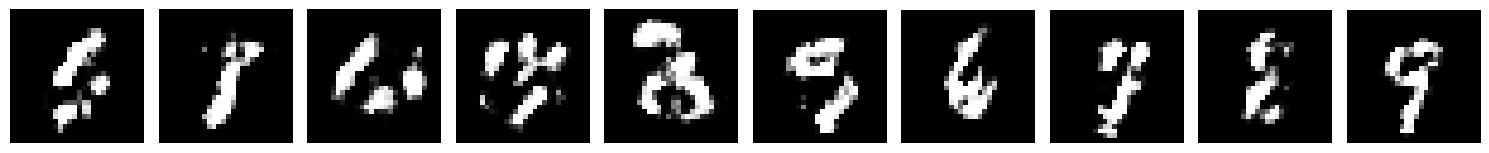

  0%|                                           | 0/4 [04:45<?, ?it/s, 41001/60000, dis_loss: 0.2737, gen_loss: 2.6364]

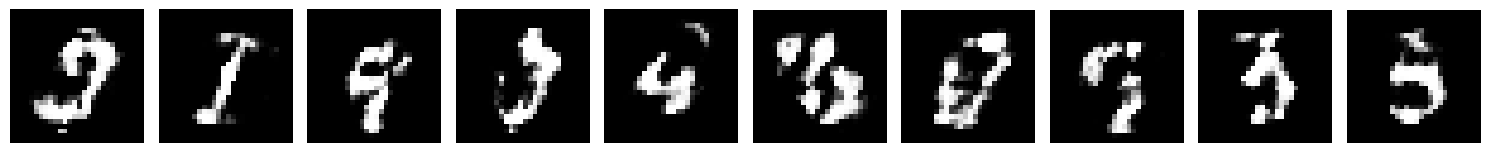

  0%|                                           | 0/4 [04:53<?, ?it/s, 42001/60000, dis_loss: 0.2740, gen_loss: 2.6316]

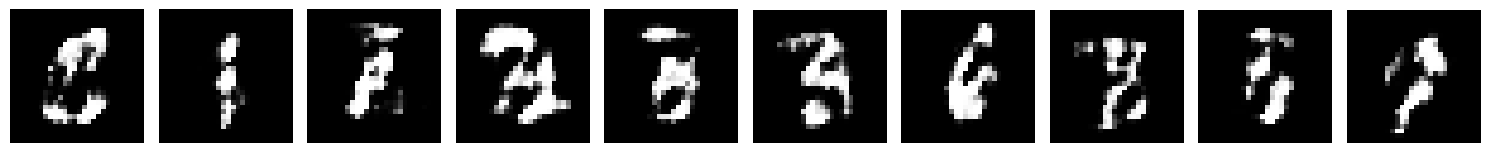

  0%|                                           | 0/4 [05:02<?, ?it/s, 43001/60000, dis_loss: 0.2750, gen_loss: 2.6242]

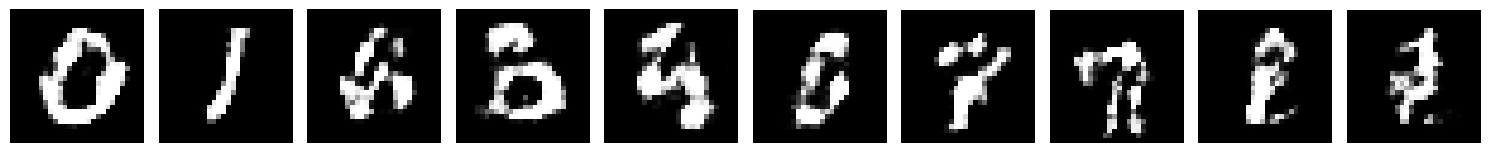

  0%|                                           | 0/4 [05:11<?, ?it/s, 44001/60000, dis_loss: 0.2759, gen_loss: 2.6173]

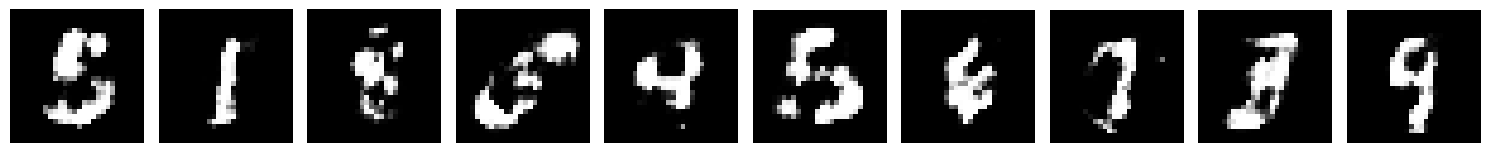

  0%|                                           | 0/4 [05:20<?, ?it/s, 45001/60000, dis_loss: 0.2761, gen_loss: 2.6114]

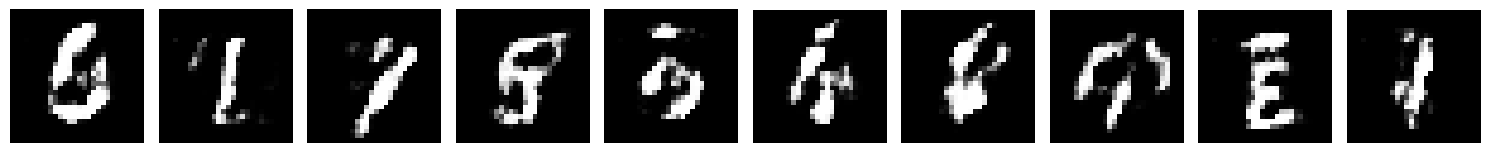

  0%|                                           | 0/4 [05:29<?, ?it/s, 46001/60000, dis_loss: 0.2767, gen_loss: 2.6069]

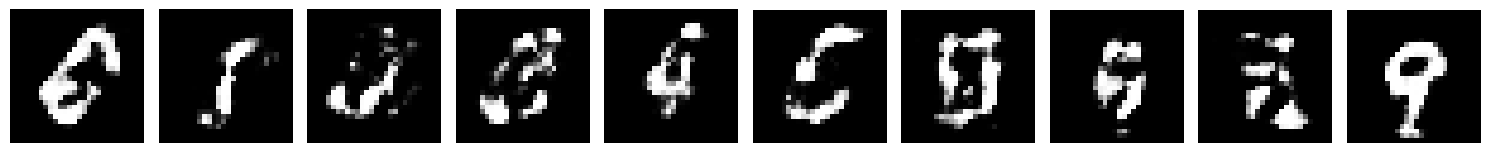

  0%|                                           | 0/4 [05:38<?, ?it/s, 47001/60000, dis_loss: 0.2775, gen_loss: 2.6030]

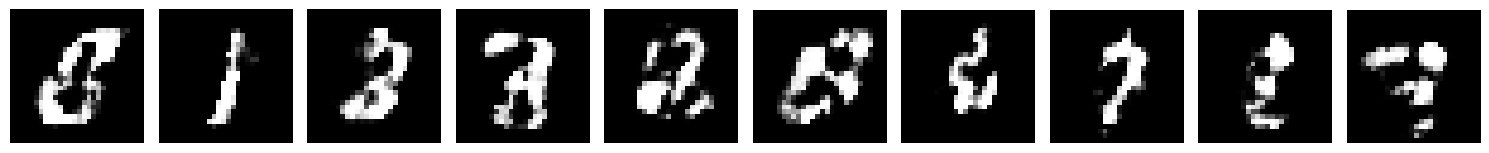

  0%|                                           | 0/4 [05:47<?, ?it/s, 48001/60000, dis_loss: 0.2788, gen_loss: 2.5970]

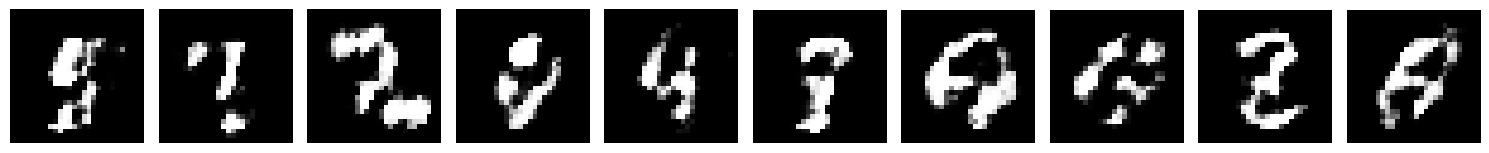

  0%|                                           | 0/4 [05:56<?, ?it/s, 49001/60000, dis_loss: 0.2798, gen_loss: 2.5889]

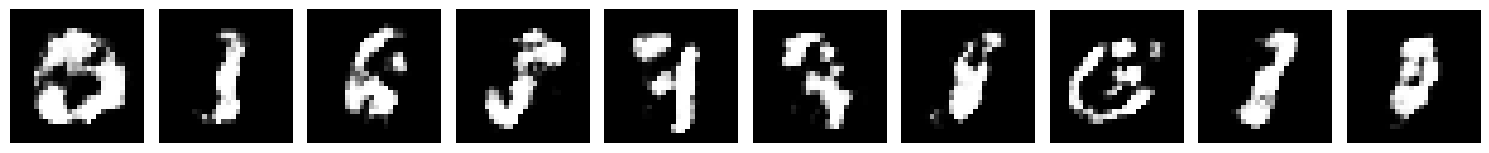

  0%|                                           | 0/4 [06:05<?, ?it/s, 50001/60000, dis_loss: 0.2797, gen_loss: 2.5860]

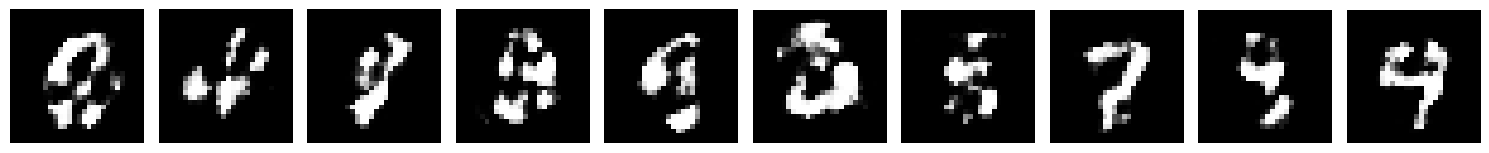

  0%|                                           | 0/4 [06:15<?, ?it/s, 51001/60000, dis_loss: 0.2810, gen_loss: 2.5789]

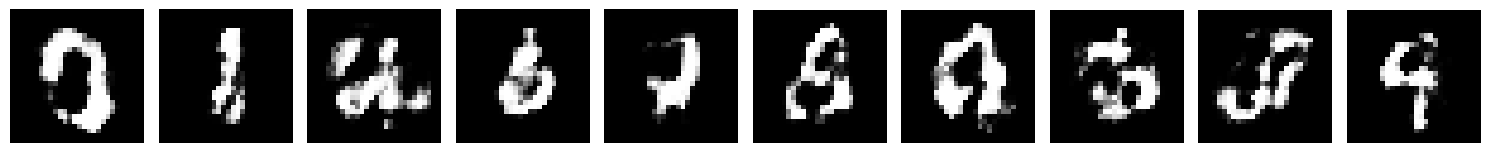

  0%|                                           | 0/4 [06:24<?, ?it/s, 52001/60000, dis_loss: 0.2815, gen_loss: 2.5753]

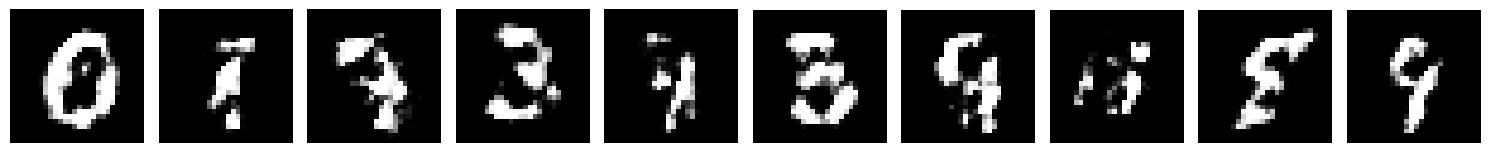

  0%|                                           | 0/4 [06:34<?, ?it/s, 53001/60000, dis_loss: 0.2824, gen_loss: 2.5665]

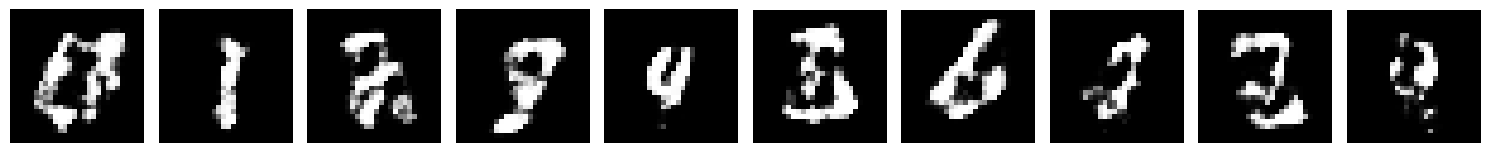

  0%|                                           | 0/4 [06:43<?, ?it/s, 54001/60000, dis_loss: 0.2829, gen_loss: 2.5595]

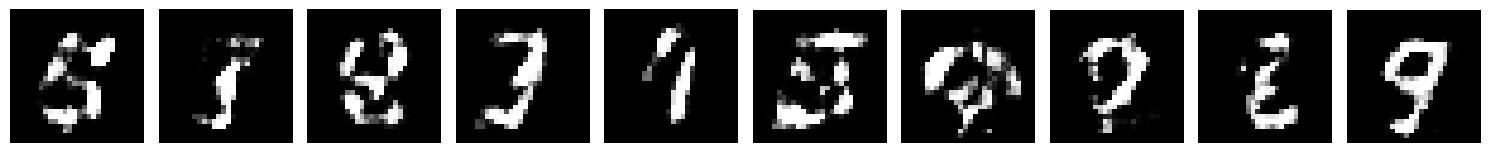

  0%|                                           | 0/4 [06:53<?, ?it/s, 55001/60000, dis_loss: 0.2840, gen_loss: 2.5514]

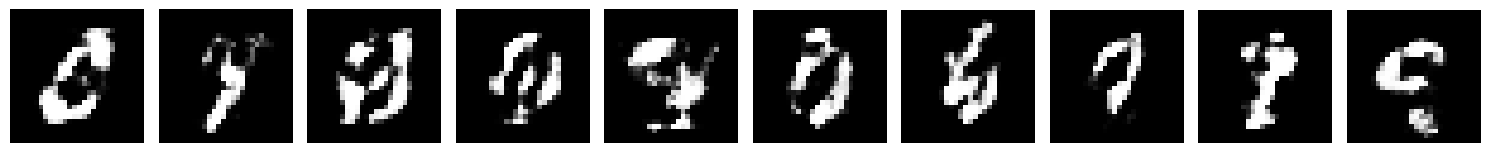

  0%|                                           | 0/4 [07:03<?, ?it/s, 56001/60000, dis_loss: 0.2847, gen_loss: 2.5416]

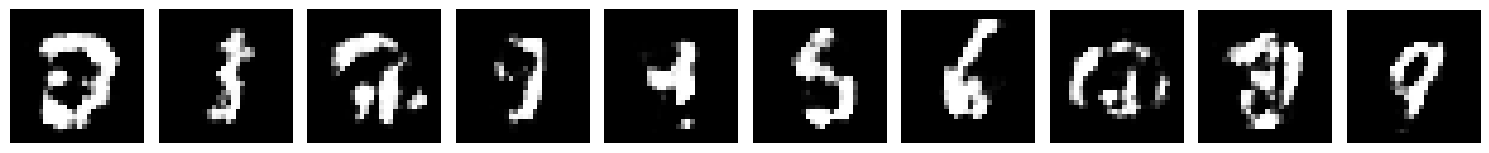

  0%|                                           | 0/4 [07:12<?, ?it/s, 57001/60000, dis_loss: 0.2855, gen_loss: 2.5349]

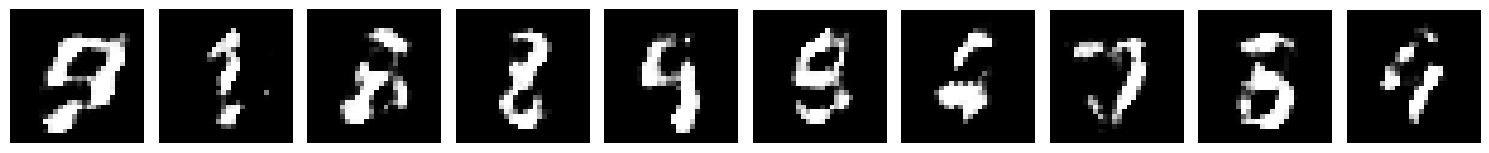

  0%|                                           | 0/4 [07:22<?, ?it/s, 58001/60000, dis_loss: 0.2862, gen_loss: 2.5299]

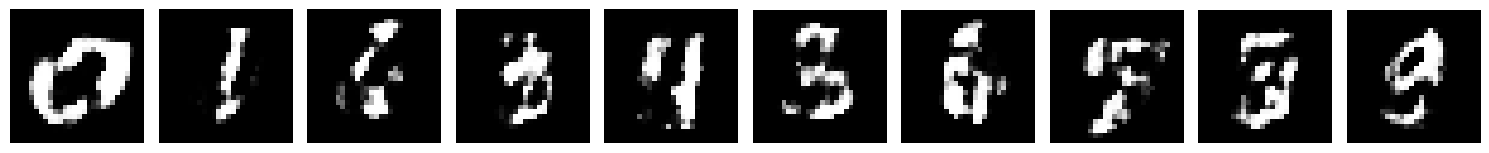

  0%|                                           | 0/4 [07:32<?, ?it/s, 59001/60000, dis_loss: 0.2866, gen_loss: 2.5245]

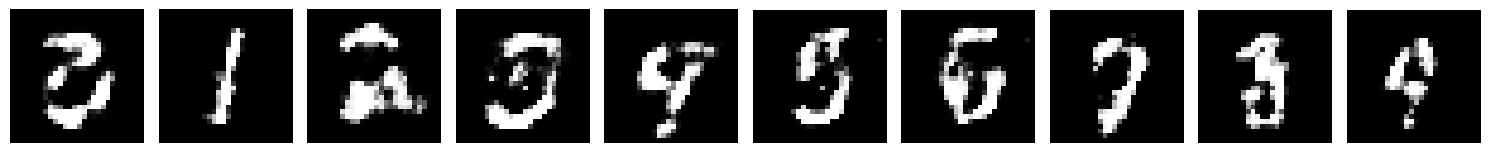

 25%|█████████▌                            | 1/4 [07:42<23:08, 462.69s/it, 1/60000, dis_loss: 0.0440, gen_loss: 3.4502]

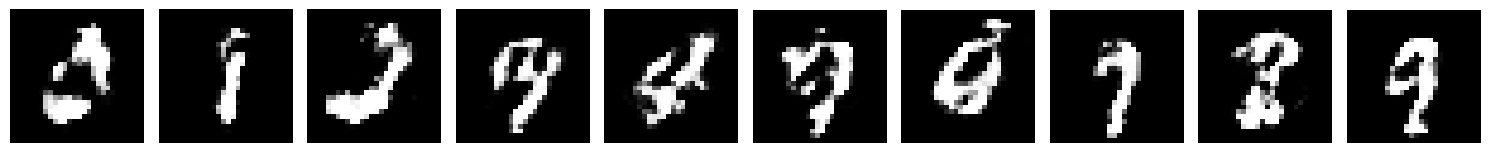

 25%|████████▊                          | 1/4 [07:48<23:08, 462.69s/it, 1001/60000, dis_loss: 0.3332, gen_loss: 2.2100]

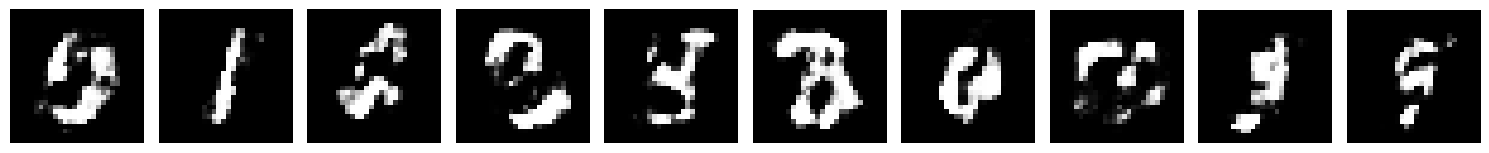

 25%|████████▊                          | 1/4 [07:53<23:08, 462.69s/it, 2001/60000, dis_loss: 0.3437, gen_loss: 2.1420]

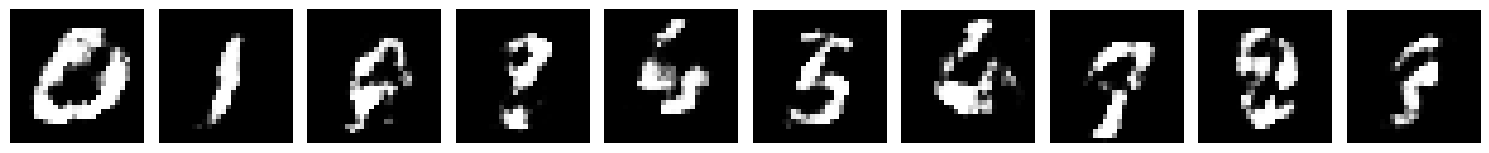

 25%|████████▊                          | 1/4 [07:59<23:08, 462.69s/it, 3001/60000, dis_loss: 0.3372, gen_loss: 2.1201]

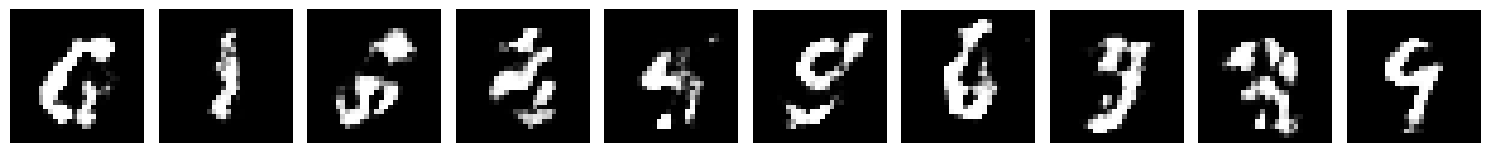

 25%|████████▊                          | 1/4 [08:04<23:08, 462.69s/it, 4001/60000, dis_loss: 0.3339, gen_loss: 2.1001]

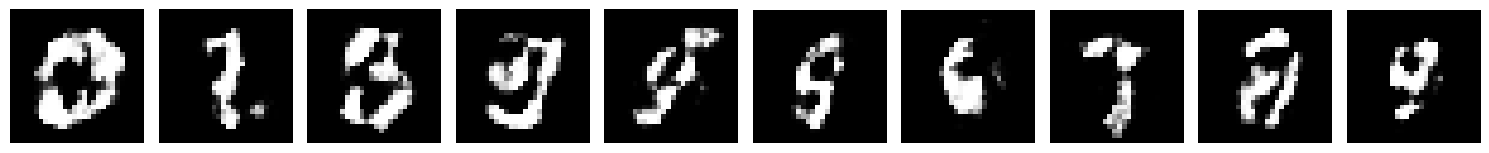

 25%|████████▊                          | 1/4 [08:10<23:08, 462.69s/it, 5001/60000, dis_loss: 0.3314, gen_loss: 2.1094]

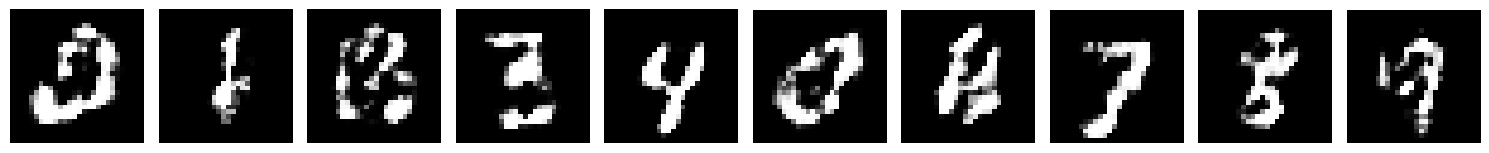

 25%|████████▊                          | 1/4 [08:16<23:08, 462.69s/it, 6001/60000, dis_loss: 0.3277, gen_loss: 2.1144]

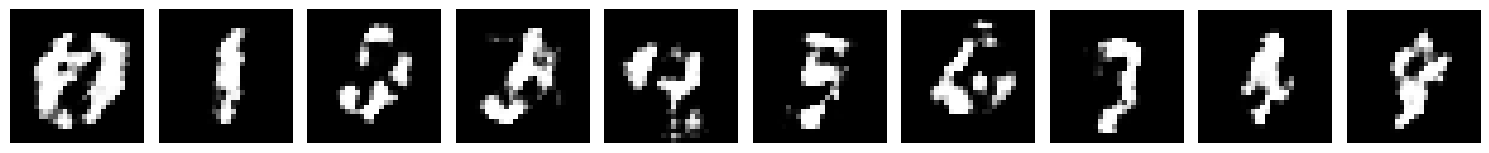

 25%|████████▊                          | 1/4 [08:21<23:08, 462.69s/it, 7001/60000, dis_loss: 0.3299, gen_loss: 2.1023]

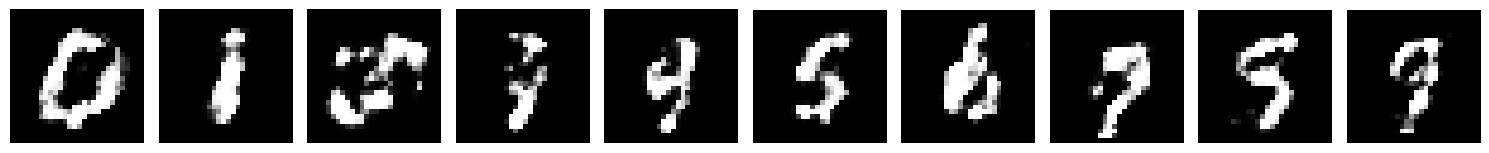

 25%|████████▊                          | 1/4 [08:28<23:08, 462.69s/it, 8001/60000, dis_loss: 0.3276, gen_loss: 2.0989]

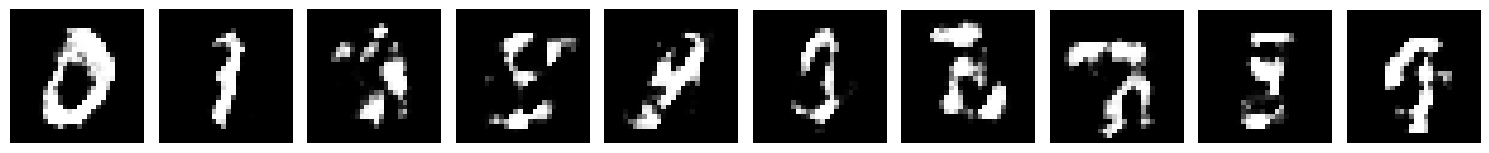

 25%|████████▊                          | 1/4 [08:34<23:08, 462.69s/it, 9001/60000, dis_loss: 0.3300, gen_loss: 2.0893]

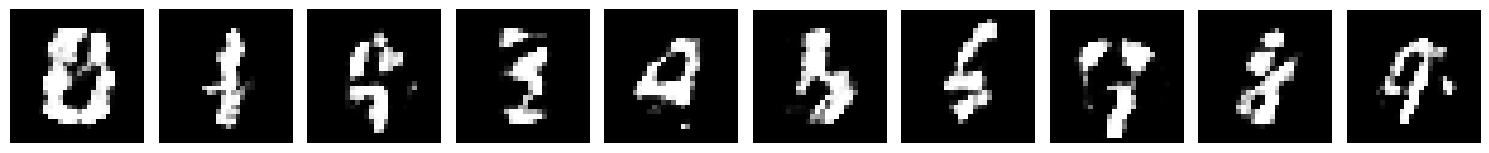

 25%|████████▌                         | 1/4 [08:40<23:08, 462.69s/it, 10001/60000, dis_loss: 0.3315, gen_loss: 2.0826]

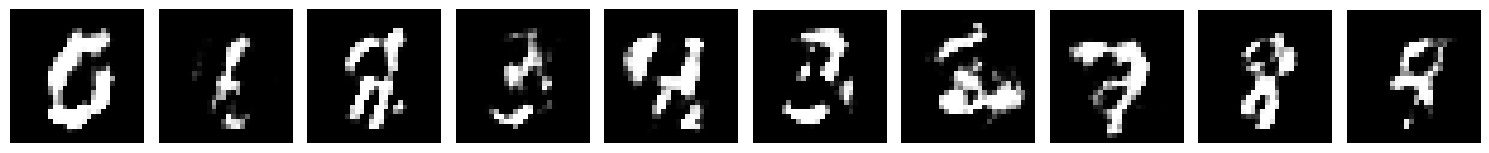

 25%|████████▌                         | 1/4 [08:46<23:08, 462.69s/it, 11001/60000, dis_loss: 0.3346, gen_loss: 2.0646]

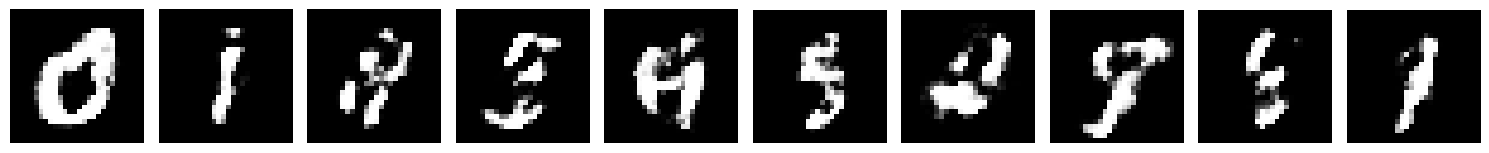

 25%|████████▌                         | 1/4 [08:52<23:08, 462.69s/it, 12001/60000, dis_loss: 0.3364, gen_loss: 2.0535]

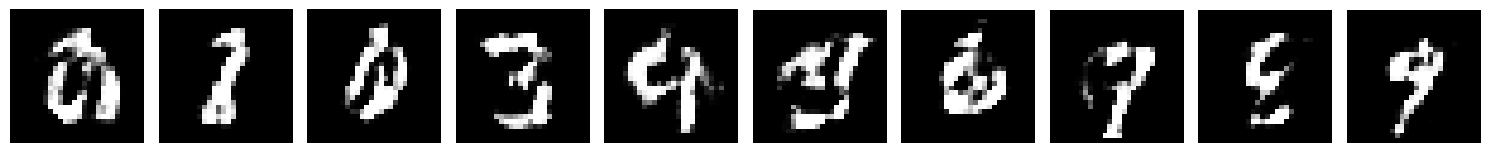

 25%|████████▌                         | 1/4 [08:59<23:08, 462.69s/it, 13001/60000, dis_loss: 0.3347, gen_loss: 2.0623]

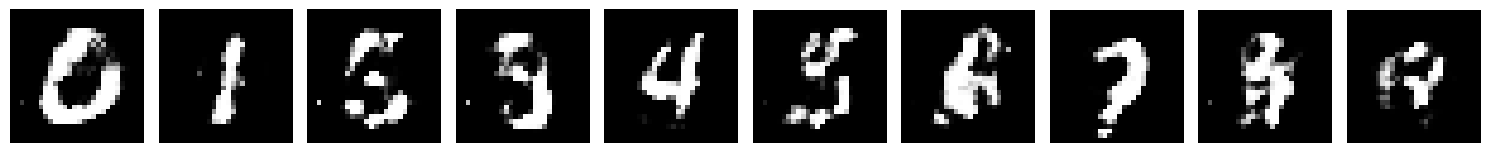

 25%|████████▌                         | 1/4 [09:05<23:08, 462.69s/it, 14001/60000, dis_loss: 0.3332, gen_loss: 2.0638]

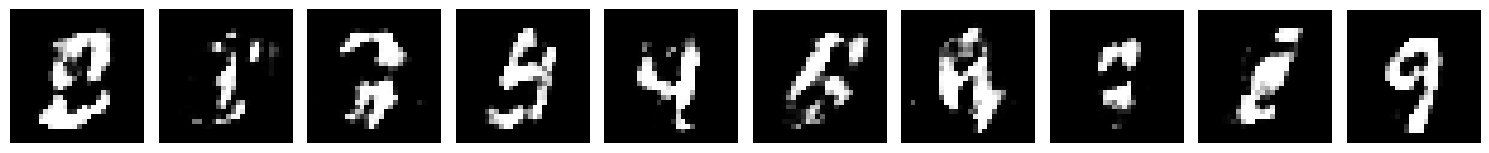

 25%|████████▌                         | 1/4 [09:12<23:08, 462.69s/it, 15001/60000, dis_loss: 0.3333, gen_loss: 2.0714]

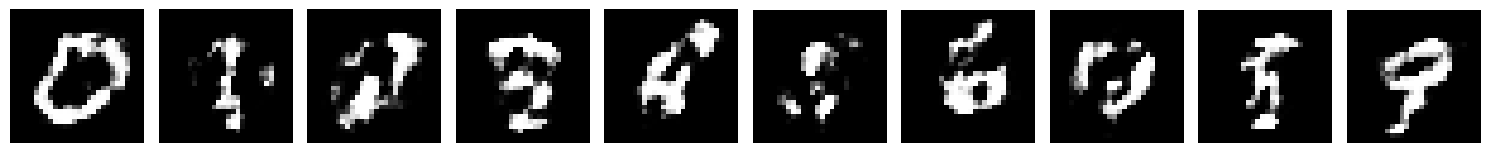

 25%|████████▌                         | 1/4 [09:18<23:08, 462.69s/it, 16001/60000, dis_loss: 0.3333, gen_loss: 2.0708]

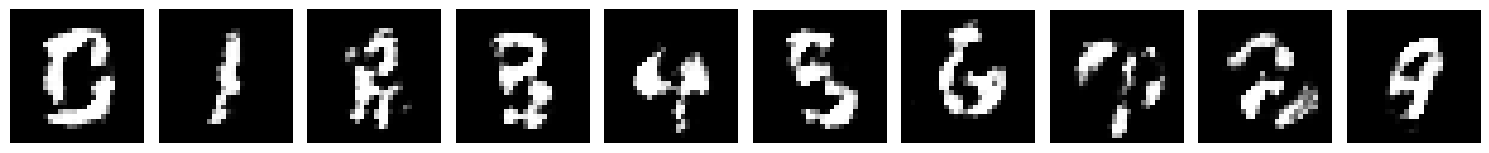

 25%|████████▌                         | 1/4 [09:25<23:08, 462.69s/it, 17001/60000, dis_loss: 0.3330, gen_loss: 2.0613]

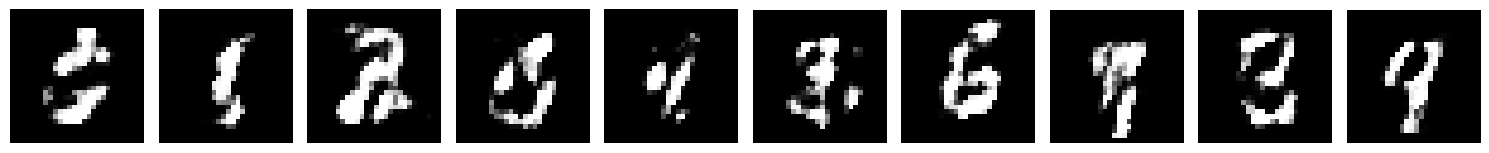

 25%|████████▌                         | 1/4 [09:32<23:08, 462.69s/it, 18001/60000, dis_loss: 0.3325, gen_loss: 2.0682]

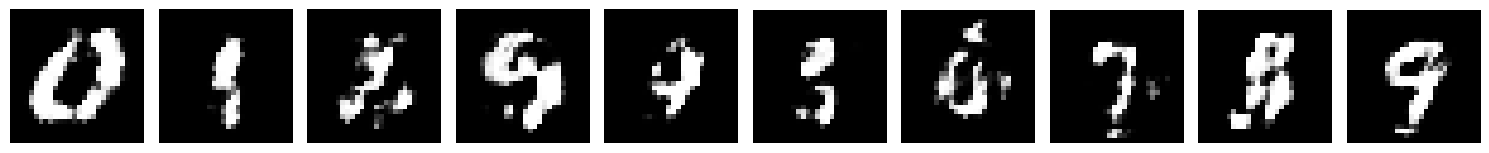

 25%|████████▌                         | 1/4 [09:38<23:08, 462.69s/it, 19001/60000, dis_loss: 0.3337, gen_loss: 2.0603]

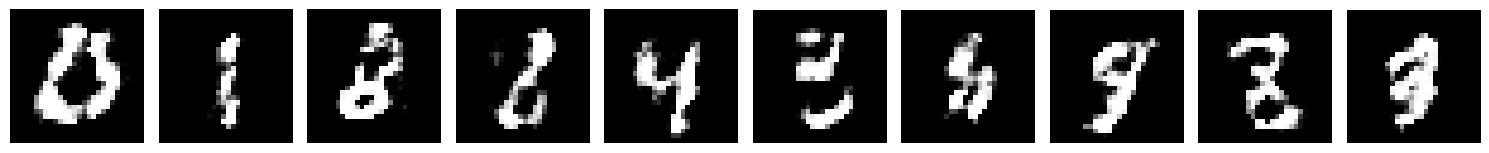

 25%|████████▌                         | 1/4 [09:45<23:08, 462.69s/it, 20001/60000, dis_loss: 0.3342, gen_loss: 2.0534]

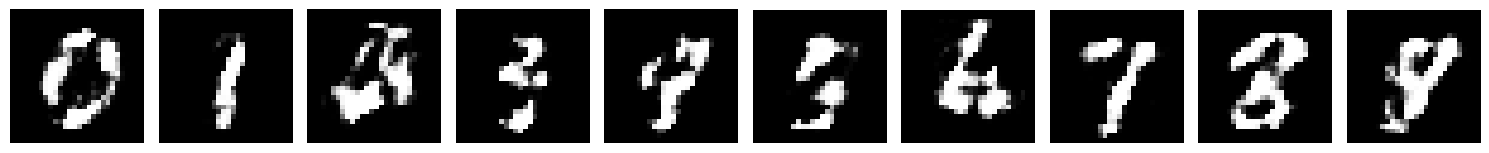

 25%|████████▌                         | 1/4 [09:52<23:08, 462.69s/it, 21001/60000, dis_loss: 0.3345, gen_loss: 2.0511]

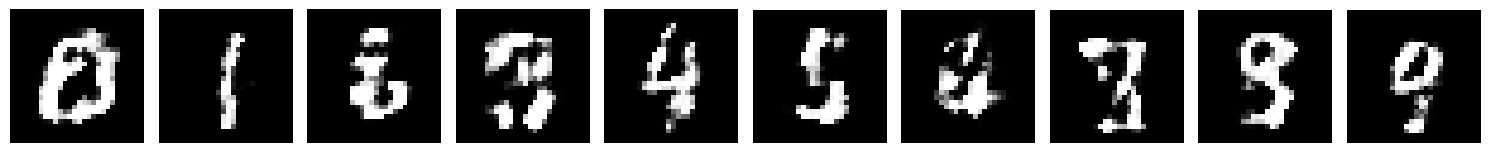

 25%|████████▌                         | 1/4 [09:59<23:08, 462.69s/it, 22001/60000, dis_loss: 0.3337, gen_loss: 2.0506]

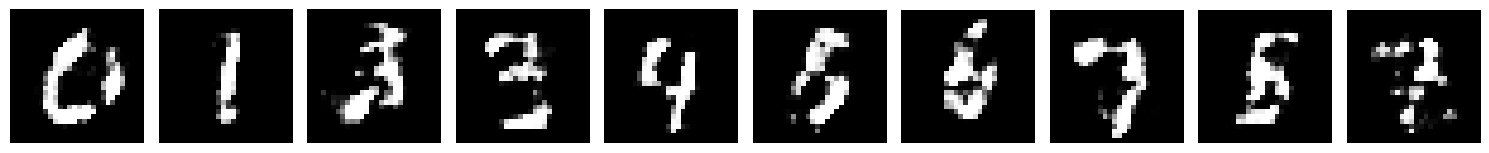

 25%|████████▌                         | 1/4 [10:07<23:08, 462.69s/it, 23001/60000, dis_loss: 0.3336, gen_loss: 2.0550]

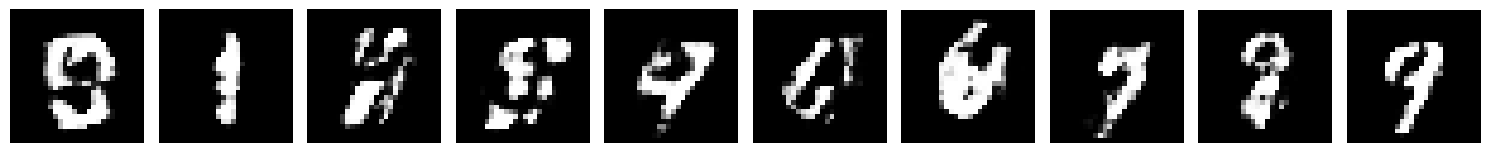

 25%|████████▌                         | 1/4 [10:14<23:08, 462.69s/it, 24001/60000, dis_loss: 0.3340, gen_loss: 2.0556]

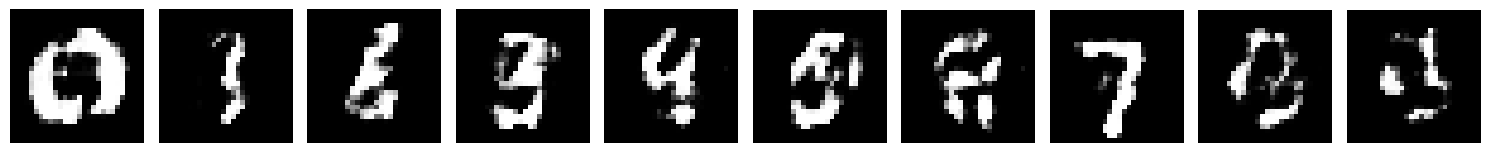

 25%|████████▌                         | 1/4 [10:21<23:08, 462.69s/it, 25001/60000, dis_loss: 0.3351, gen_loss: 2.0515]

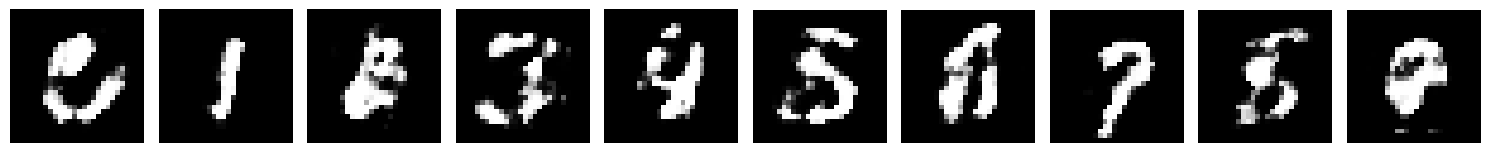

 25%|████████▌                         | 1/4 [10:29<23:08, 462.69s/it, 26001/60000, dis_loss: 0.3355, gen_loss: 2.0477]

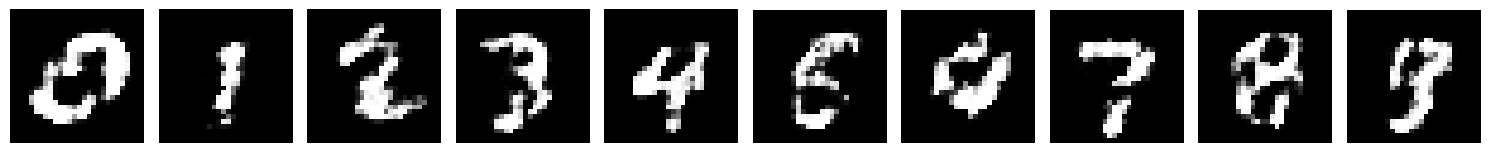

 25%|████████▌                         | 1/4 [10:36<23:08, 462.69s/it, 27001/60000, dis_loss: 0.3364, gen_loss: 2.0451]

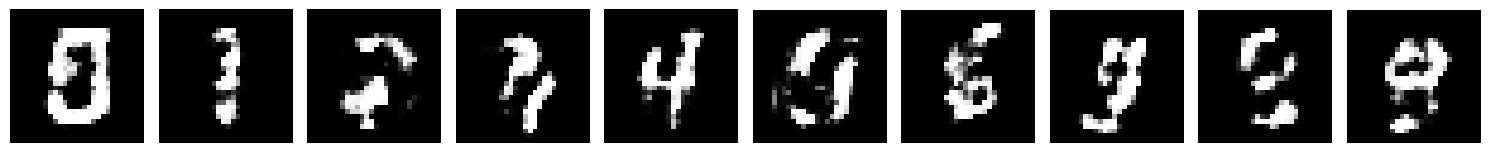

 25%|████████▌                         | 1/4 [10:44<23:08, 462.69s/it, 28001/60000, dis_loss: 0.3355, gen_loss: 2.0441]

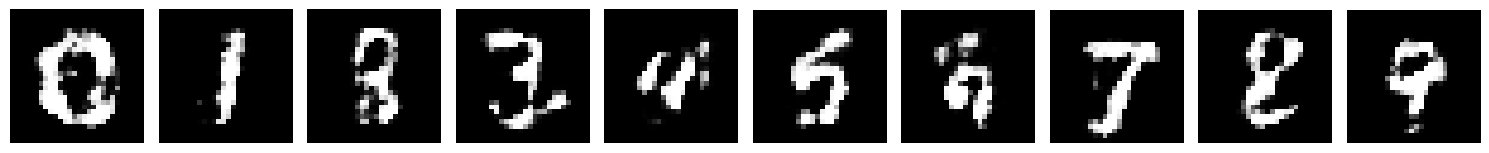

 25%|████████▌                         | 1/4 [10:51<23:08, 462.69s/it, 29001/60000, dis_loss: 0.3362, gen_loss: 2.0416]

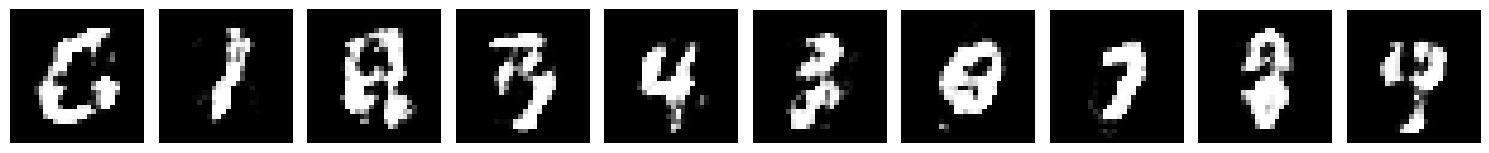

 25%|████████▌                         | 1/4 [10:59<23:08, 462.69s/it, 30001/60000, dis_loss: 0.3374, gen_loss: 2.0410]

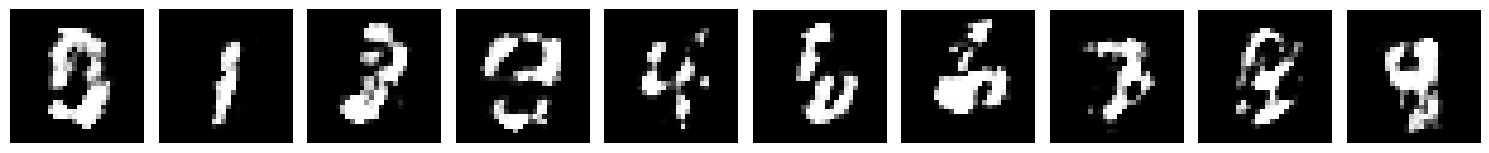

 25%|████████▌                         | 1/4 [11:07<23:08, 462.69s/it, 31001/60000, dis_loss: 0.3379, gen_loss: 2.0406]

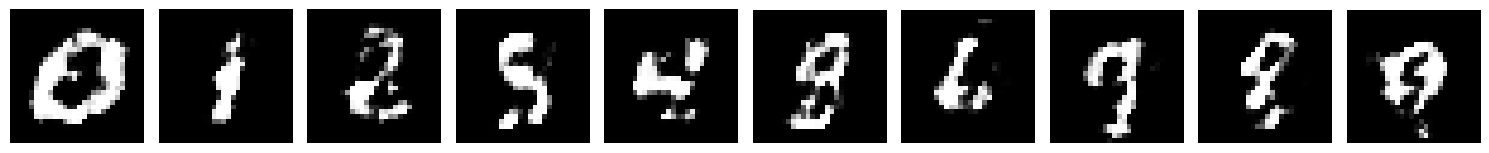

 25%|████████▌                         | 1/4 [11:15<23:08, 462.69s/it, 32001/60000, dis_loss: 0.3384, gen_loss: 2.0394]

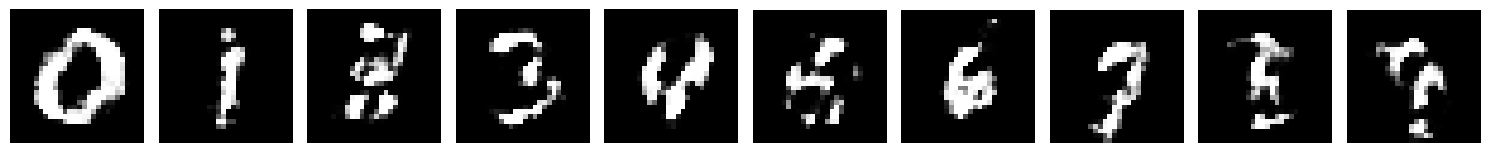

 25%|████████▌                         | 1/4 [11:23<23:08, 462.69s/it, 33001/60000, dis_loss: 0.3394, gen_loss: 2.0366]

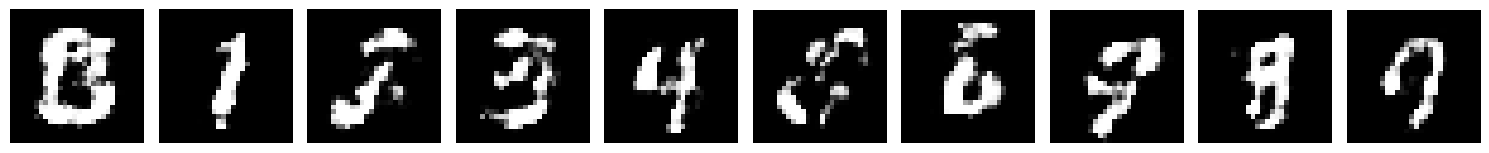

 25%|████████▌                         | 1/4 [11:31<23:08, 462.69s/it, 34001/60000, dis_loss: 0.3397, gen_loss: 2.0333]

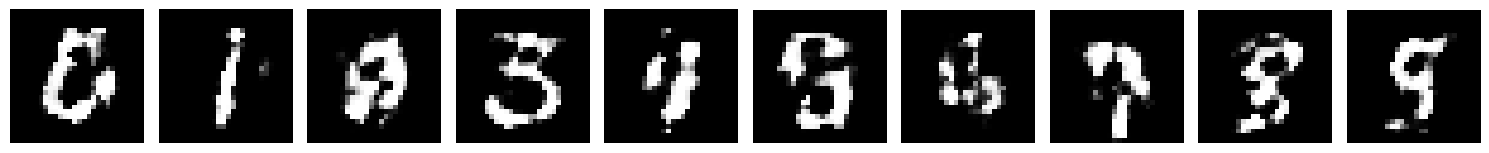

 25%|████████▌                         | 1/4 [11:39<23:08, 462.69s/it, 35001/60000, dis_loss: 0.3404, gen_loss: 2.0289]

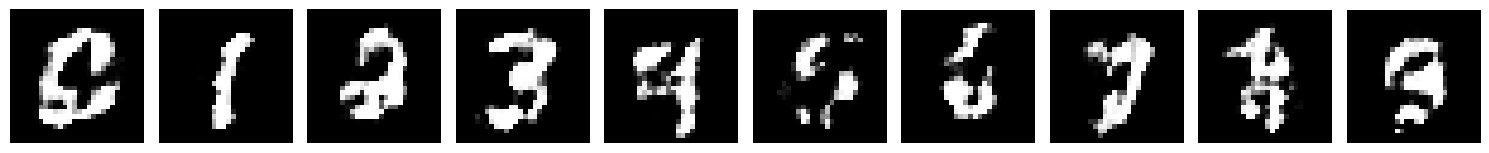

 25%|████████▌                         | 1/4 [11:47<23:08, 462.69s/it, 36001/60000, dis_loss: 0.3403, gen_loss: 2.0272]

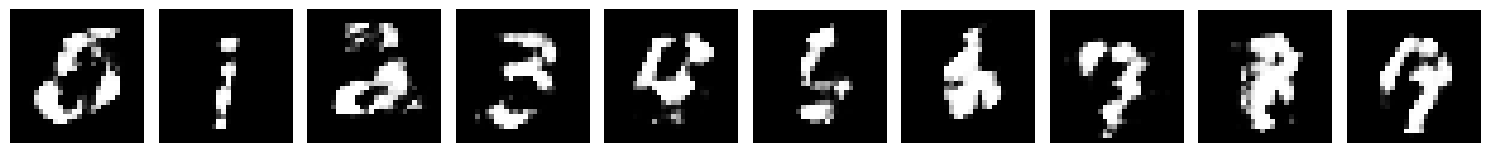

 25%|████████▌                         | 1/4 [11:56<23:08, 462.69s/it, 37001/60000, dis_loss: 0.3410, gen_loss: 2.0230]

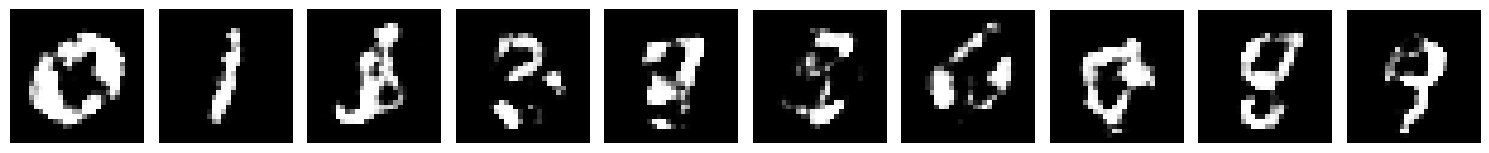

 25%|████████▌                         | 1/4 [12:04<23:08, 462.69s/it, 38001/60000, dis_loss: 0.3419, gen_loss: 2.0226]

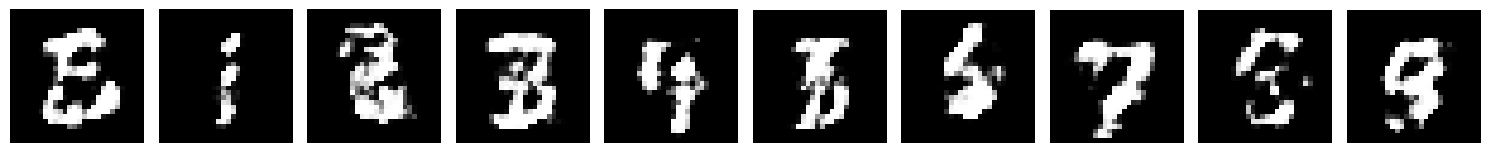

 25%|████████▌                         | 1/4 [12:13<23:08, 462.69s/it, 39001/60000, dis_loss: 0.3422, gen_loss: 2.0190]

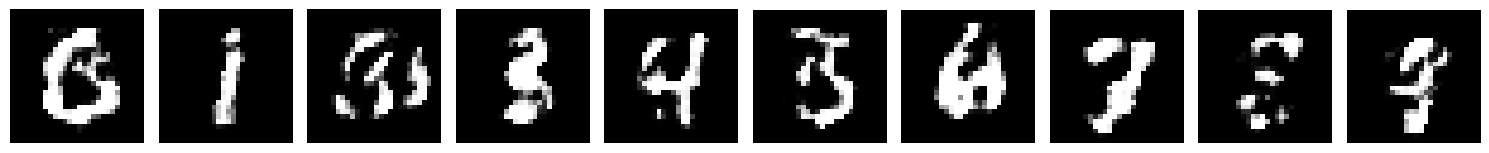

 25%|████████▌                         | 1/4 [12:21<23:08, 462.69s/it, 40001/60000, dis_loss: 0.3432, gen_loss: 2.0146]

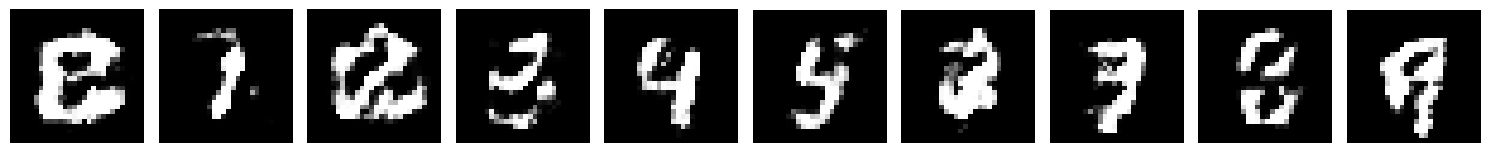

 25%|████████▌                         | 1/4 [12:30<23:08, 462.69s/it, 41001/60000, dis_loss: 0.3435, gen_loss: 2.0132]

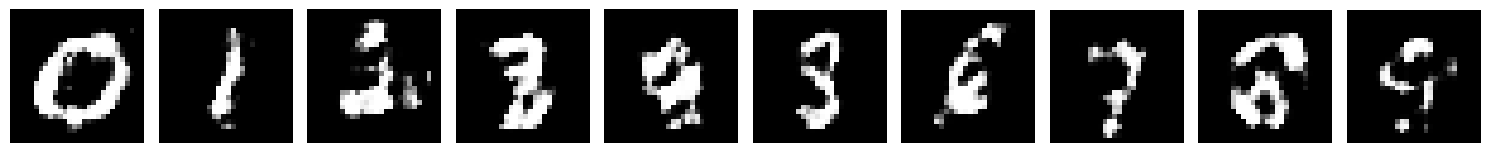

 25%|████████▌                         | 1/4 [12:39<23:08, 462.69s/it, 42001/60000, dis_loss: 0.3434, gen_loss: 2.0130]

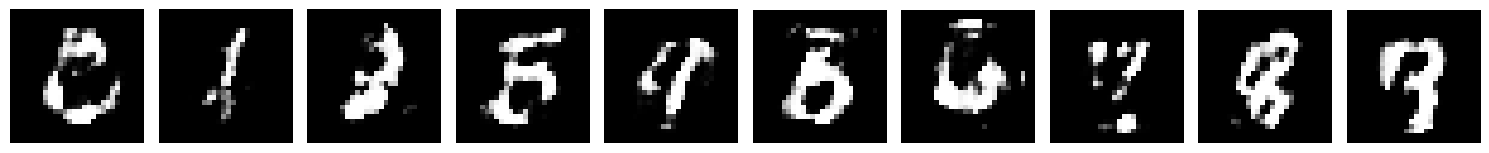

 25%|████████▌                         | 1/4 [12:47<23:08, 462.69s/it, 43001/60000, dis_loss: 0.3447, gen_loss: 2.0083]

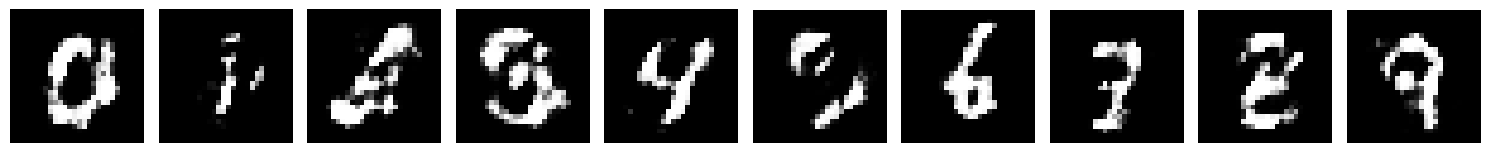

 25%|████████▌                         | 1/4 [12:56<23:08, 462.69s/it, 44001/60000, dis_loss: 0.3454, gen_loss: 2.0026]

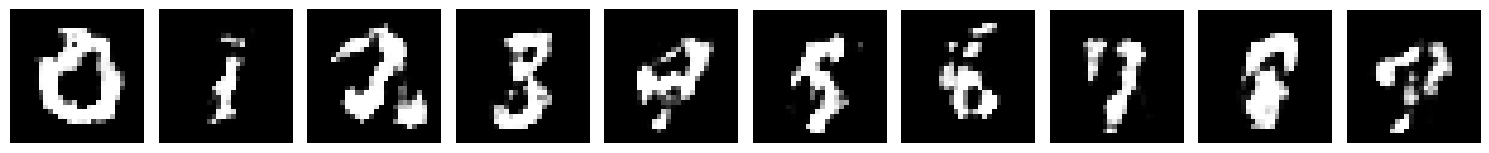

 25%|████████▌                         | 1/4 [13:05<23:08, 462.69s/it, 45001/60000, dis_loss: 0.3464, gen_loss: 2.0006]

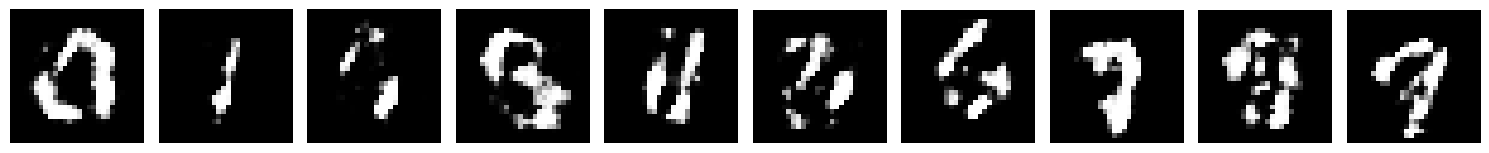

 25%|████████▌                         | 1/4 [13:14<23:08, 462.69s/it, 46001/60000, dis_loss: 0.3470, gen_loss: 1.9958]

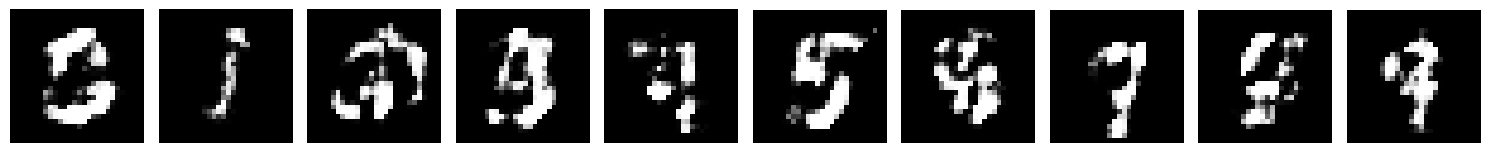

 25%|████████▌                         | 1/4 [13:23<23:08, 462.69s/it, 47001/60000, dis_loss: 0.3480, gen_loss: 1.9911]

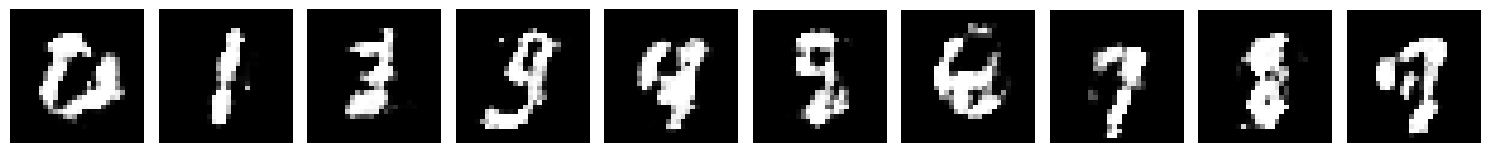

 25%|████████▌                         | 1/4 [13:32<23:08, 462.69s/it, 48001/60000, dis_loss: 0.3482, gen_loss: 1.9876]

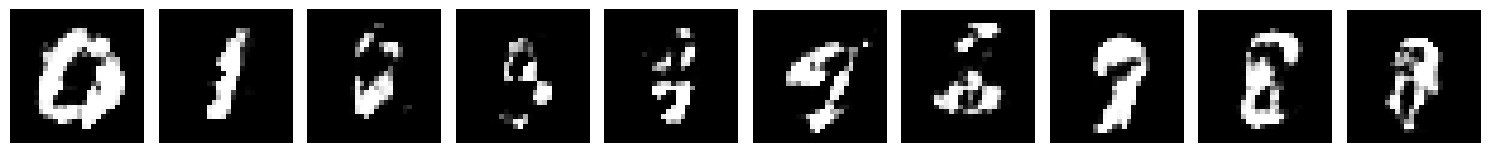

 25%|████████▌                         | 1/4 [13:42<23:08, 462.69s/it, 49001/60000, dis_loss: 0.3493, gen_loss: 1.9818]

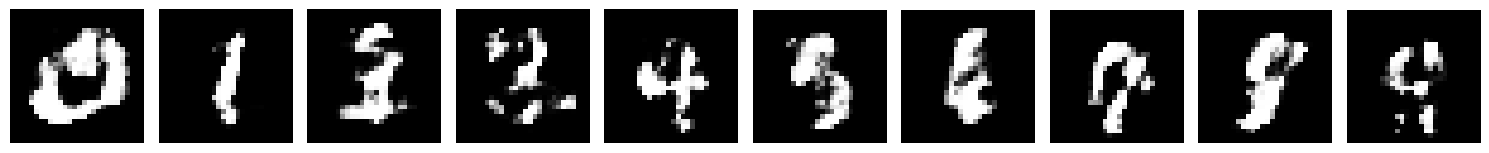

 25%|████████▌                         | 1/4 [13:51<23:08, 462.69s/it, 50001/60000, dis_loss: 0.3494, gen_loss: 1.9805]

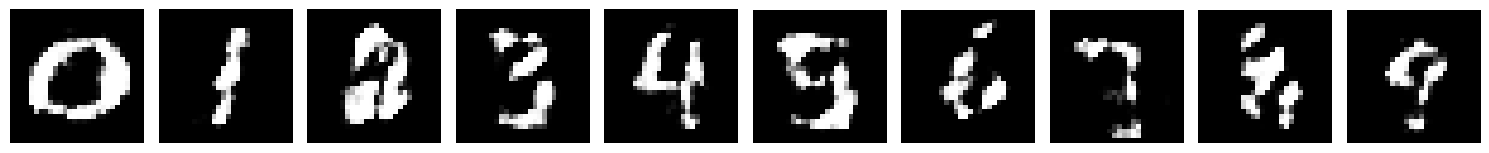

 25%|████████▌                         | 1/4 [14:00<23:08, 462.69s/it, 51001/60000, dis_loss: 0.3505, gen_loss: 1.9746]

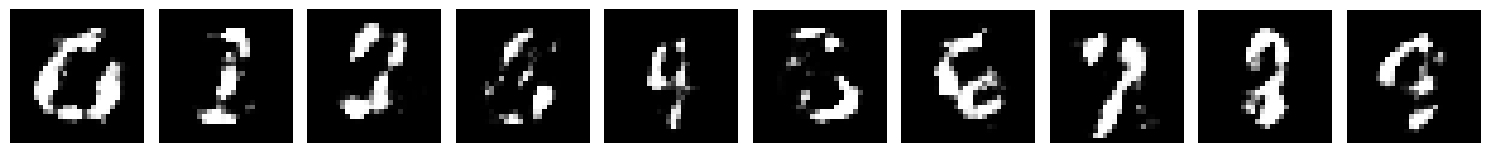

 25%|████████▌                         | 1/4 [14:10<23:08, 462.69s/it, 52001/60000, dis_loss: 0.3510, gen_loss: 1.9725]

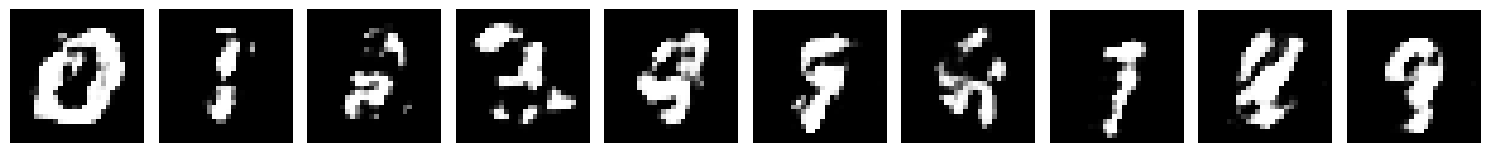

 25%|████████▌                         | 1/4 [14:19<23:08, 462.69s/it, 53001/60000, dis_loss: 0.3516, gen_loss: 1.9691]

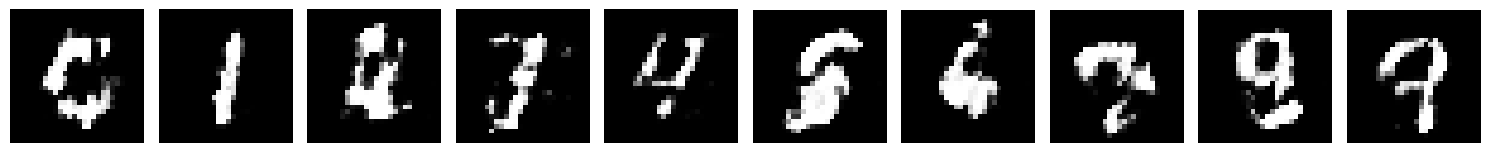

 25%|████████▌                         | 1/4 [14:29<23:08, 462.69s/it, 54001/60000, dis_loss: 0.3522, gen_loss: 1.9656]

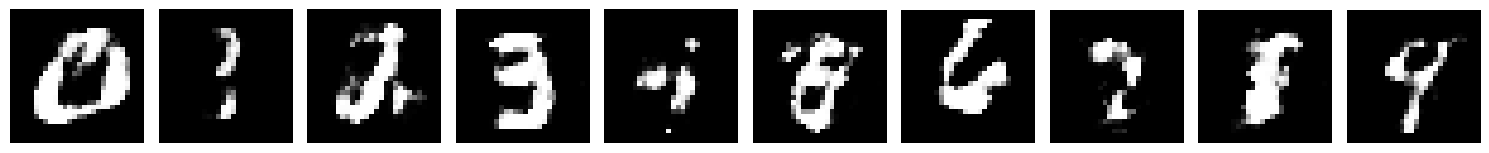

 25%|████████▌                         | 1/4 [14:39<23:08, 462.69s/it, 55001/60000, dis_loss: 0.3532, gen_loss: 1.9612]

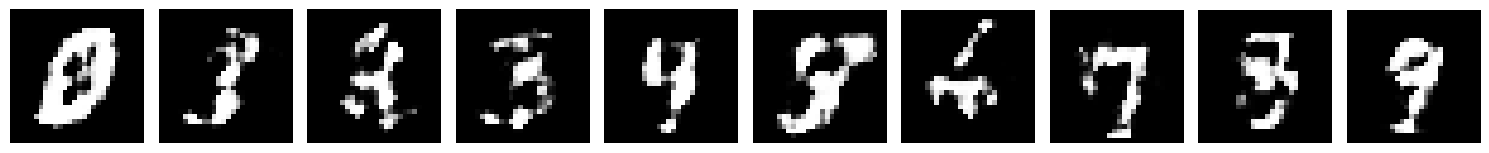

 25%|████████▌                         | 1/4 [14:49<23:08, 462.69s/it, 56001/60000, dis_loss: 0.3540, gen_loss: 1.9565]

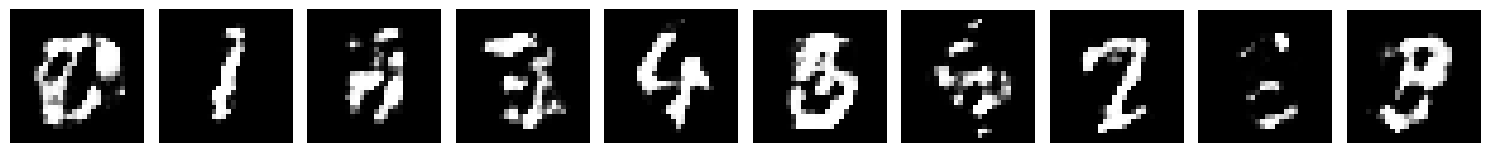

 25%|████████▌                         | 1/4 [14:59<23:08, 462.69s/it, 57001/60000, dis_loss: 0.3541, gen_loss: 1.9532]

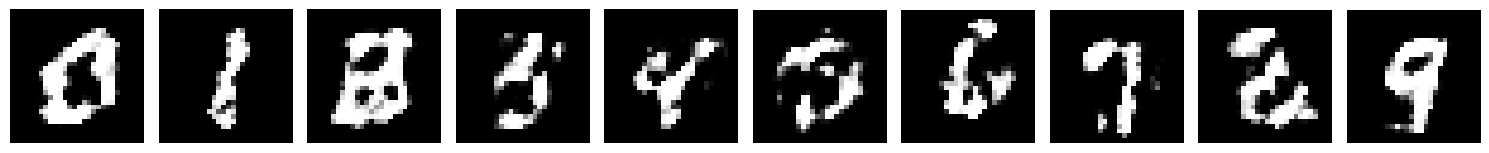

 25%|████████▌                         | 1/4 [15:09<23:08, 462.69s/it, 58001/60000, dis_loss: 0.3542, gen_loss: 1.9516]

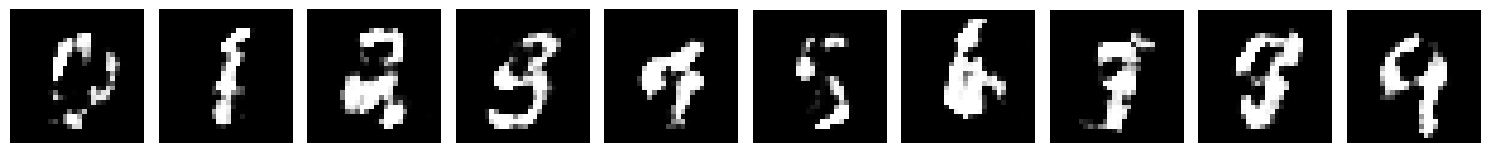

 25%|████████▌                         | 1/4 [15:19<23:08, 462.69s/it, 59001/60000, dis_loss: 0.3539, gen_loss: 1.9523]

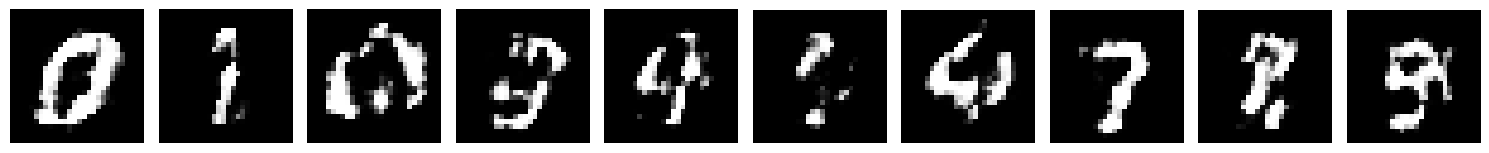

 50%|███████████████████                   | 2/4 [15:29<15:30, 465.23s/it, 1/60000, dis_loss: 0.3434, gen_loss: 5.7758]

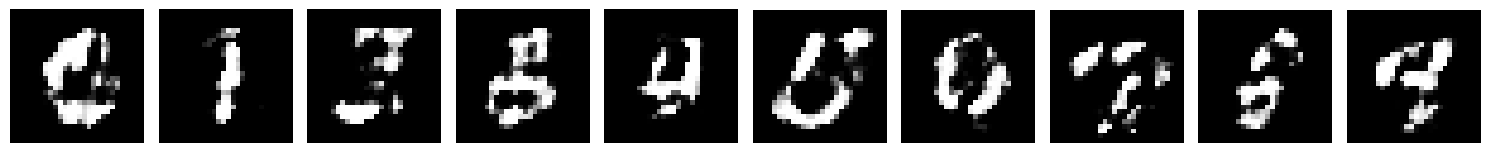

 50%|█████████████████▌                 | 2/4 [15:35<15:30, 465.23s/it, 1001/60000, dis_loss: 0.3698, gen_loss: 1.8958]

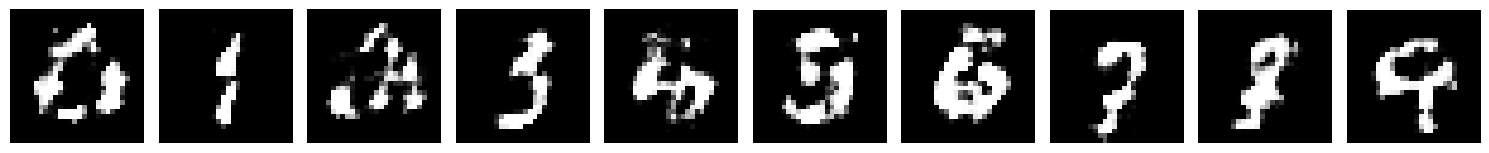

 50%|█████████████████▌                 | 2/4 [15:40<15:30, 465.23s/it, 2001/60000, dis_loss: 0.3722, gen_loss: 1.8819]

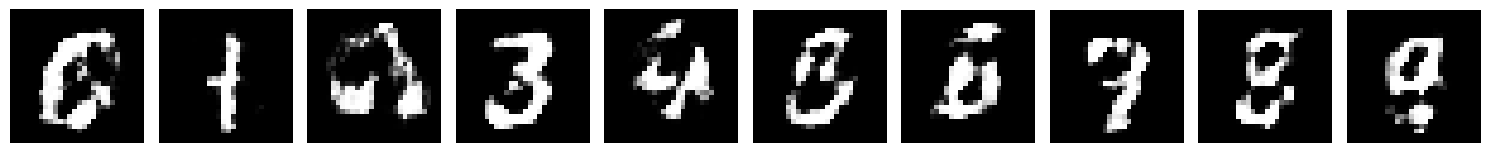

 50%|█████████████████▌                 | 2/4 [15:46<15:30, 465.23s/it, 3001/60000, dis_loss: 0.3750, gen_loss: 1.8575]

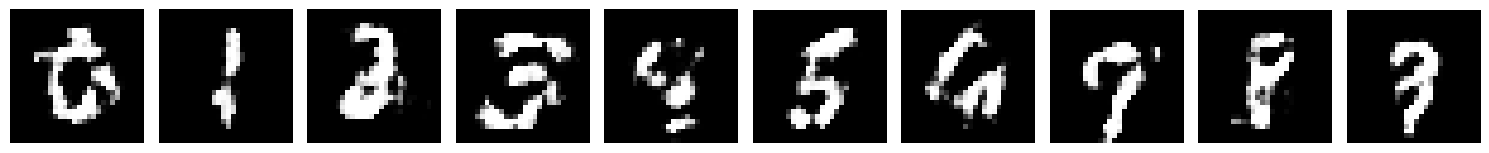

 50%|█████████████████▌                 | 2/4 [15:51<15:30, 465.23s/it, 4001/60000, dis_loss: 0.3742, gen_loss: 1.8503]

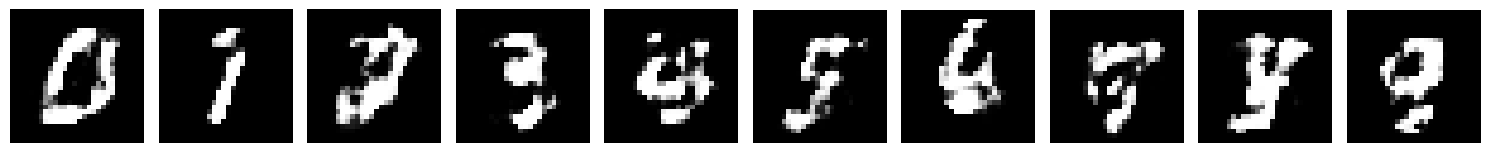

 50%|█████████████████▌                 | 2/4 [15:57<15:30, 465.23s/it, 5001/60000, dis_loss: 0.3792, gen_loss: 1.8431]

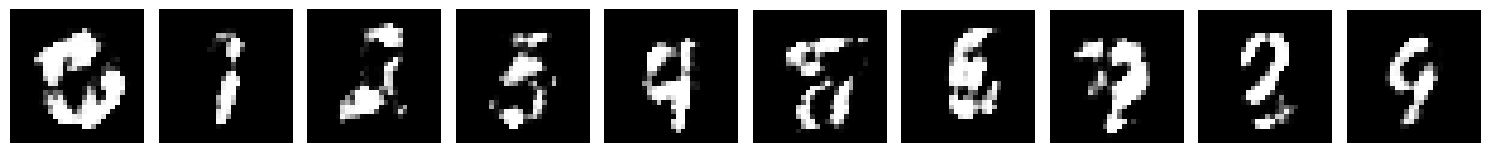

 50%|█████████████████▌                 | 2/4 [16:03<15:30, 465.23s/it, 6001/60000, dis_loss: 0.3765, gen_loss: 1.8382]

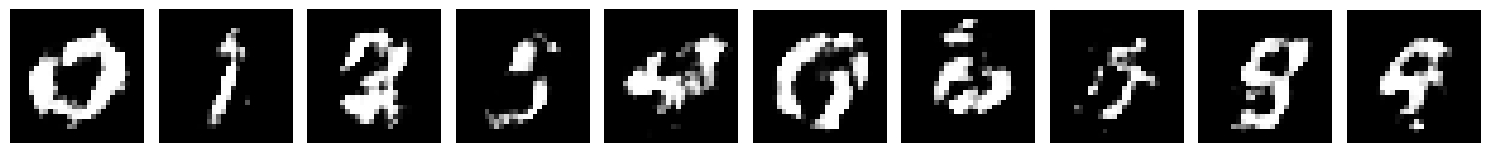

 50%|█████████████████▌                 | 2/4 [16:09<15:30, 465.23s/it, 7001/60000, dis_loss: 0.3828, gen_loss: 1.8093]

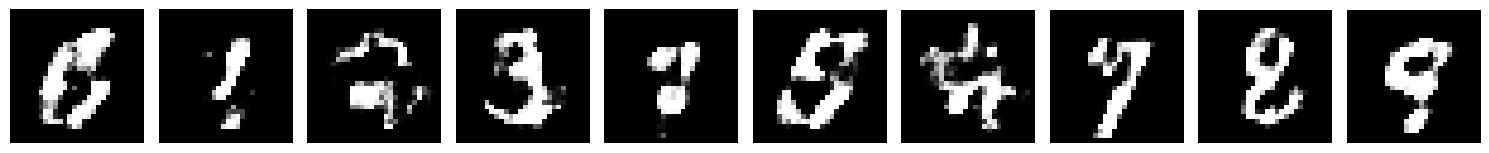

 50%|█████████████████▌                 | 2/4 [16:14<15:30, 465.23s/it, 8001/60000, dis_loss: 0.3774, gen_loss: 1.8137]

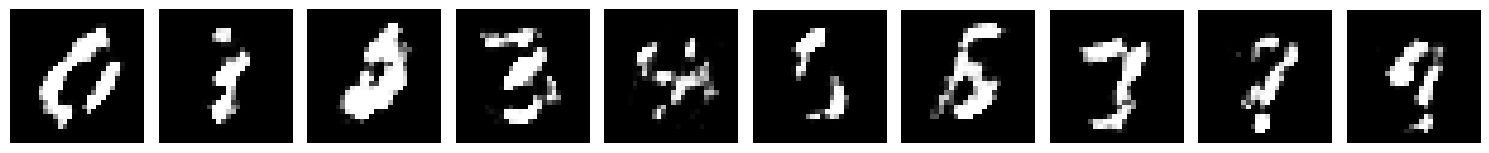

 50%|█████████████████▌                 | 2/4 [16:21<15:30, 465.23s/it, 9001/60000, dis_loss: 0.3783, gen_loss: 1.8036]

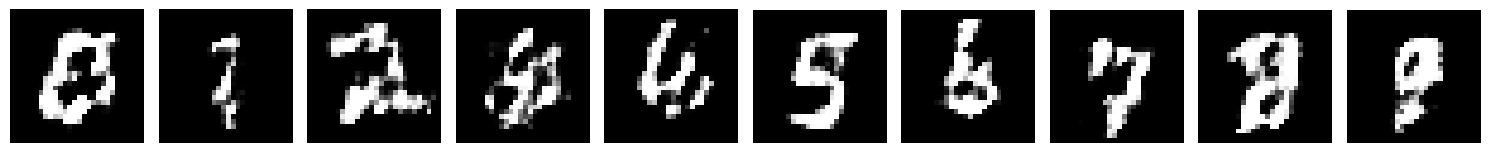

 50%|█████████████████                 | 2/4 [16:27<15:30, 465.23s/it, 10001/60000, dis_loss: 0.3763, gen_loss: 1.8036]

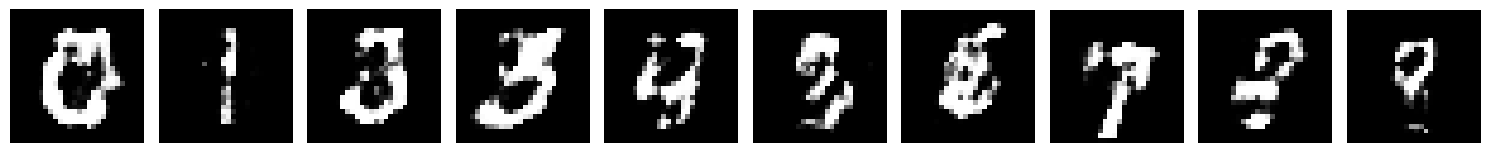

 50%|█████████████████                 | 2/4 [16:33<15:30, 465.23s/it, 11001/60000, dis_loss: 0.3787, gen_loss: 1.7918]

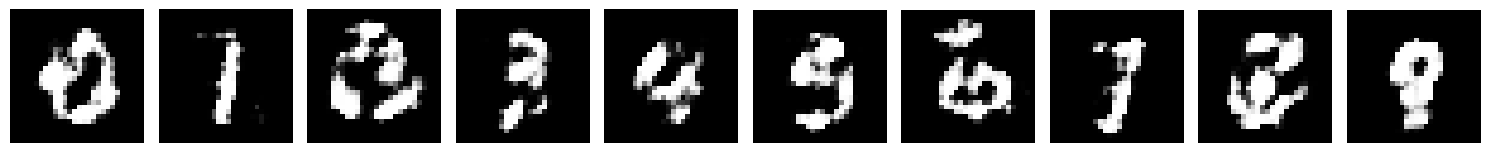

 50%|█████████████████                 | 2/4 [16:39<15:30, 465.23s/it, 12001/60000, dis_loss: 0.3792, gen_loss: 1.7876]

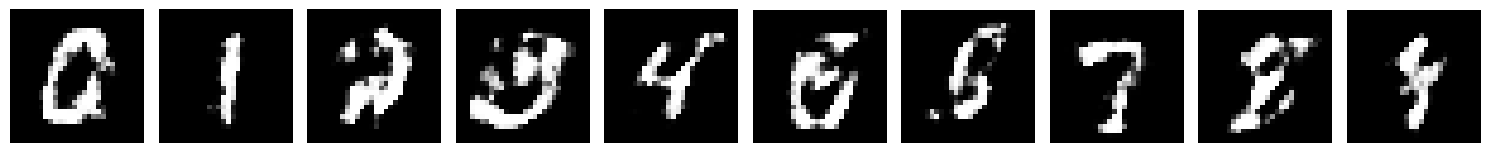

 50%|█████████████████                 | 2/4 [16:46<15:30, 465.23s/it, 13001/60000, dis_loss: 0.3788, gen_loss: 1.7862]

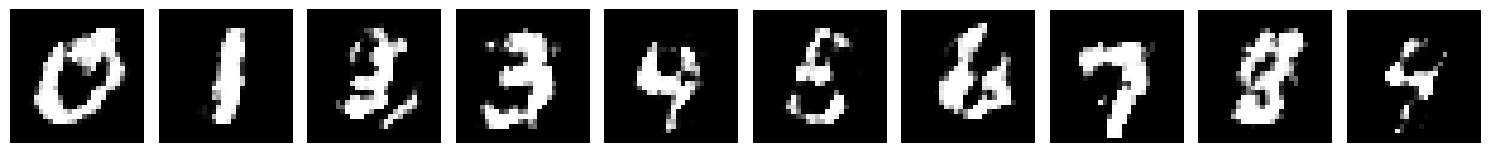

 50%|█████████████████                 | 2/4 [16:52<15:30, 465.23s/it, 14001/60000, dis_loss: 0.3758, gen_loss: 1.7885]

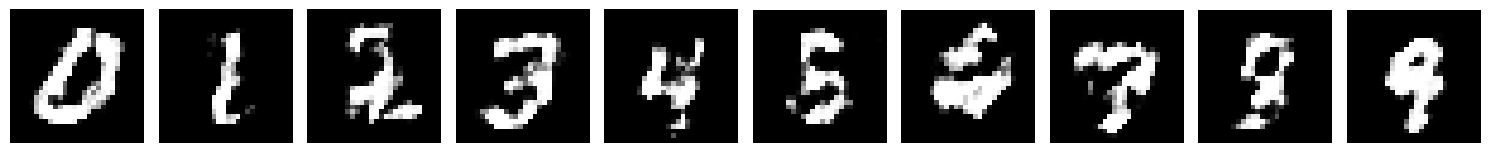

 50%|█████████████████                 | 2/4 [16:59<15:30, 465.23s/it, 15001/60000, dis_loss: 0.3747, gen_loss: 1.7942]

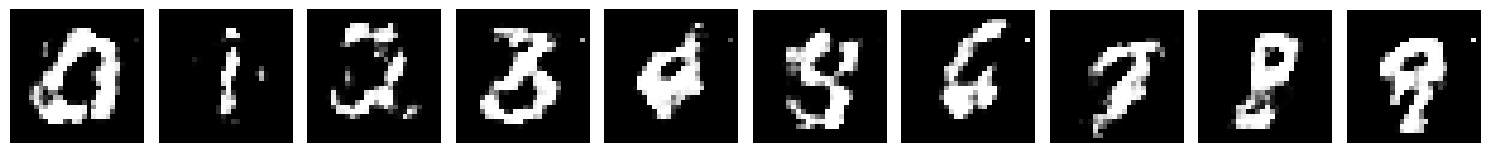

 50%|█████████████████                 | 2/4 [17:05<15:30, 465.23s/it, 16001/60000, dis_loss: 0.3743, gen_loss: 1.7934]

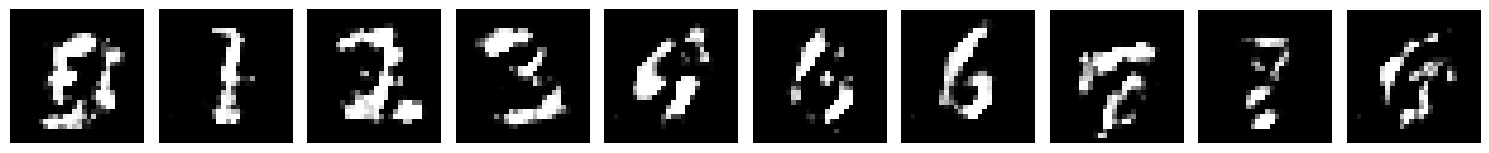

 50%|█████████████████                 | 2/4 [17:12<15:30, 465.23s/it, 17001/60000, dis_loss: 0.3737, gen_loss: 1.7934]

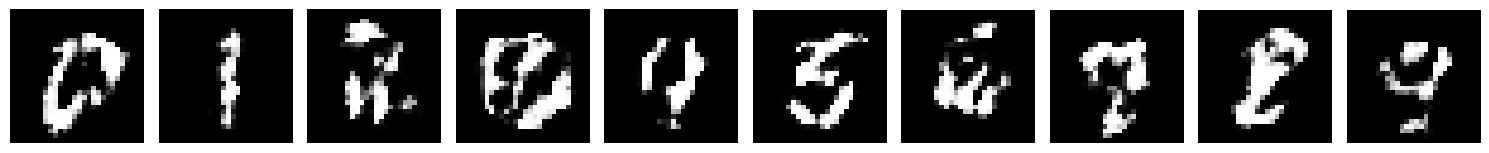

 50%|█████████████████                 | 2/4 [17:19<15:30, 465.23s/it, 18001/60000, dis_loss: 0.3728, gen_loss: 1.8001]

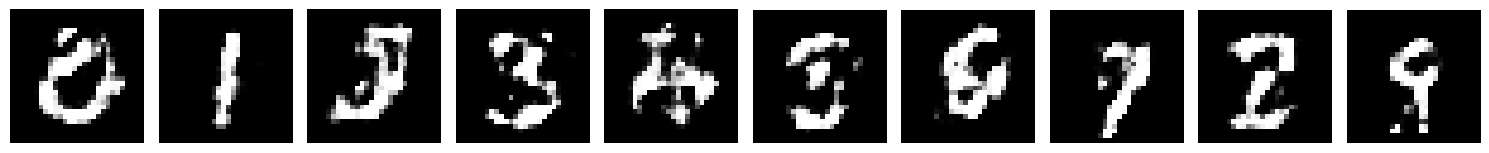

 50%|█████████████████                 | 2/4 [17:26<15:30, 465.23s/it, 19001/60000, dis_loss: 0.3740, gen_loss: 1.7977]

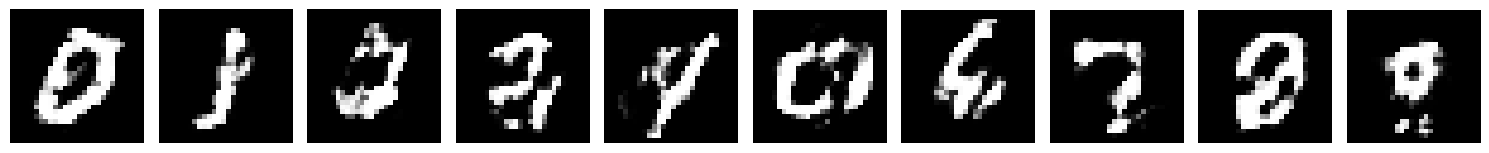

 50%|█████████████████                 | 2/4 [17:33<15:30, 465.23s/it, 20001/60000, dis_loss: 0.3740, gen_loss: 1.7990]

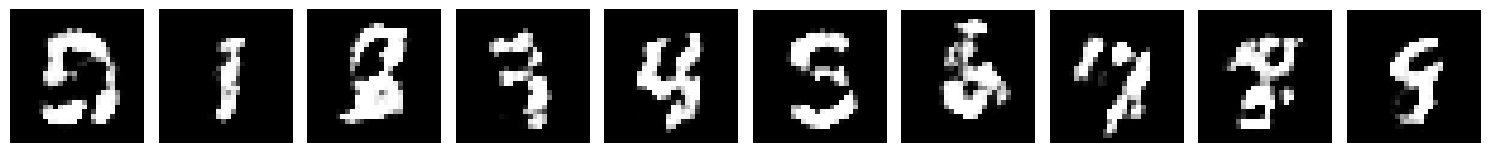

 50%|█████████████████                 | 2/4 [17:40<15:30, 465.23s/it, 21001/60000, dis_loss: 0.3738, gen_loss: 1.7986]

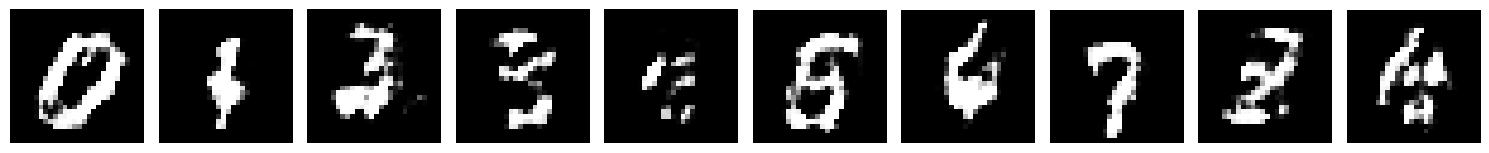

 50%|█████████████████                 | 2/4 [17:47<15:30, 465.23s/it, 22001/60000, dis_loss: 0.3739, gen_loss: 1.7978]

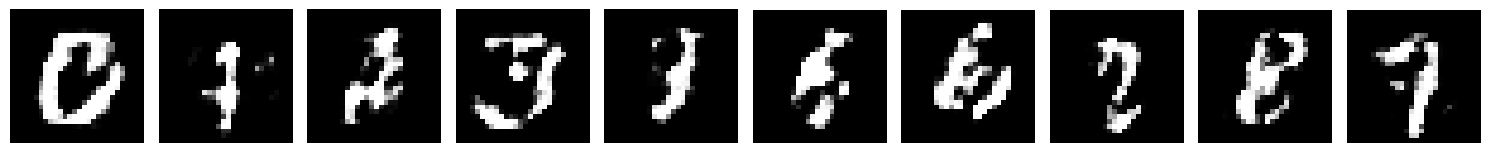

 50%|█████████████████                 | 2/4 [17:54<15:30, 465.23s/it, 23001/60000, dis_loss: 0.3738, gen_loss: 1.7963]

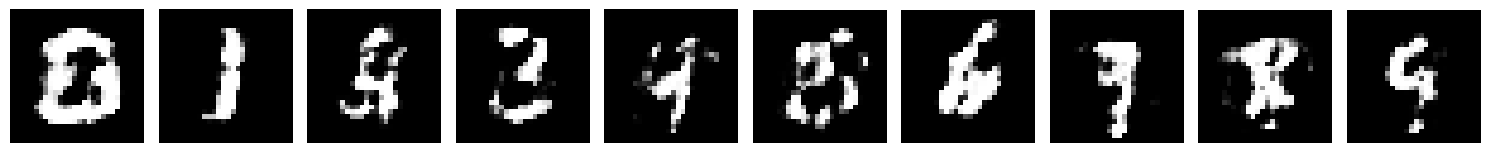

 50%|█████████████████                 | 2/4 [18:01<15:30, 465.23s/it, 24001/60000, dis_loss: 0.3733, gen_loss: 1.7988]

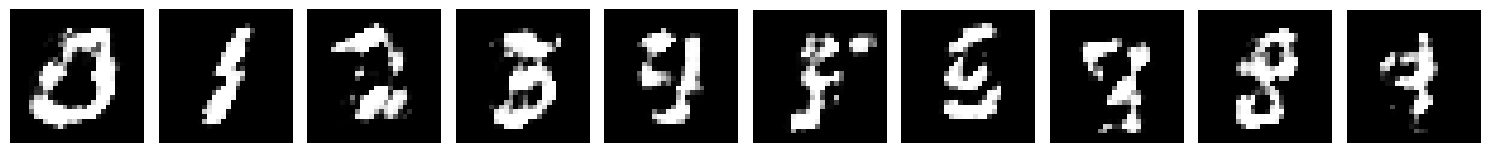

 50%|█████████████████                 | 2/4 [18:09<15:30, 465.23s/it, 25001/60000, dis_loss: 0.3737, gen_loss: 1.7999]

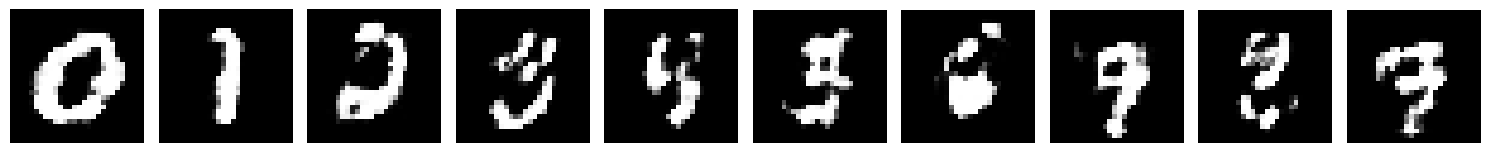

 50%|█████████████████                 | 2/4 [18:16<15:30, 465.23s/it, 26001/60000, dis_loss: 0.3737, gen_loss: 1.7971]

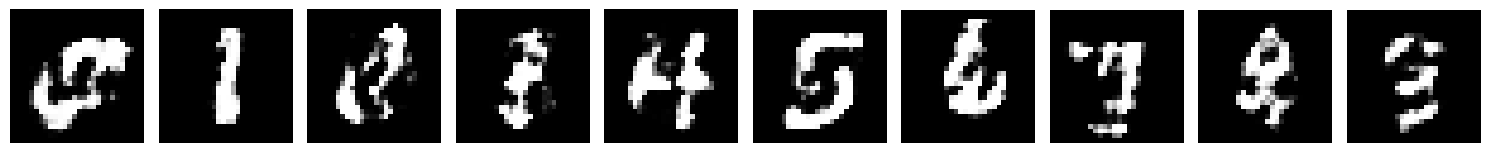

 50%|█████████████████                 | 2/4 [18:24<15:30, 465.23s/it, 27001/60000, dis_loss: 0.3742, gen_loss: 1.7939]

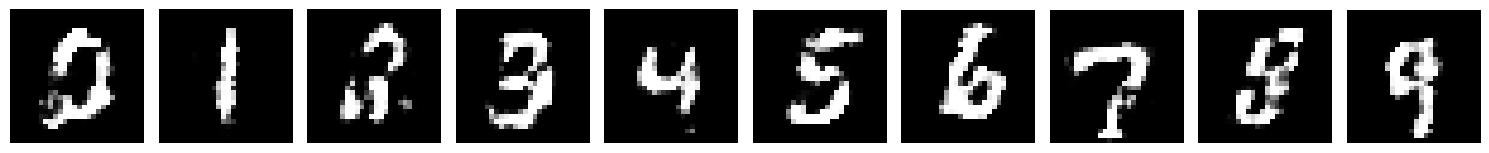

 50%|█████████████████                 | 2/4 [18:31<15:30, 465.23s/it, 28001/60000, dis_loss: 0.3730, gen_loss: 1.7984]

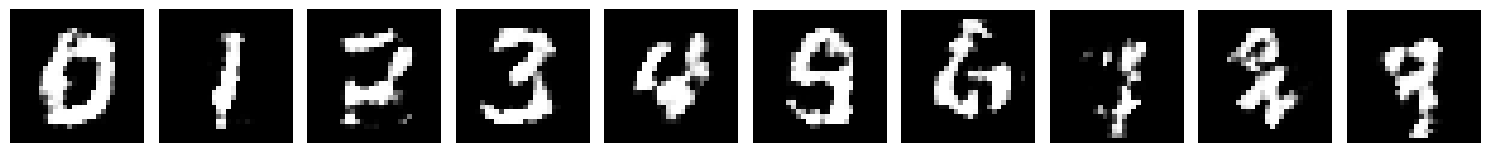

 50%|█████████████████                 | 2/4 [18:39<15:30, 465.23s/it, 29001/60000, dis_loss: 0.3735, gen_loss: 1.7975]

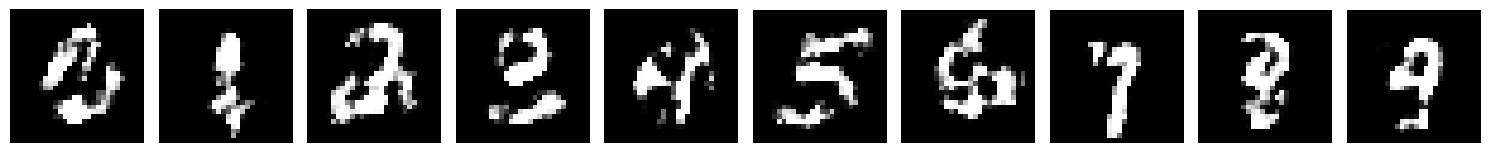

 50%|█████████████████                 | 2/4 [18:47<15:30, 465.23s/it, 30001/60000, dis_loss: 0.3733, gen_loss: 1.7971]

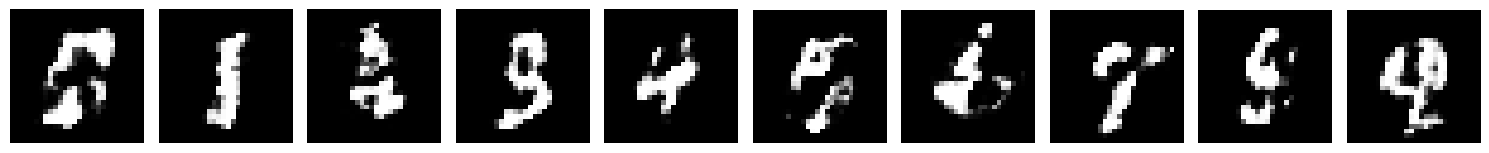

 50%|█████████████████                 | 2/4 [18:54<15:30, 465.23s/it, 31001/60000, dis_loss: 0.3726, gen_loss: 1.8016]

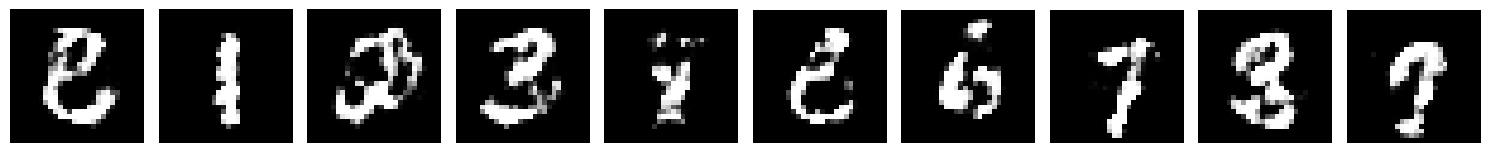

 50%|█████████████████                 | 2/4 [19:02<15:30, 465.23s/it, 32001/60000, dis_loss: 0.3715, gen_loss: 1.8032]

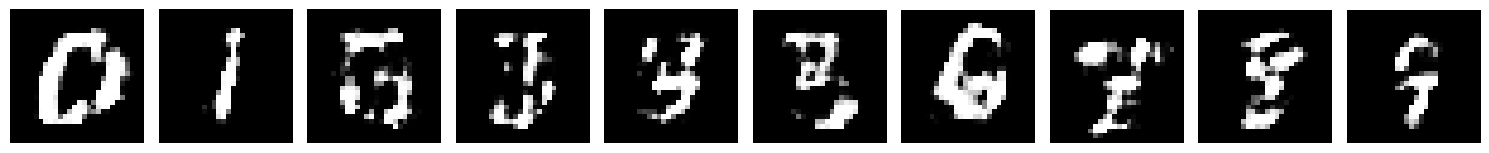

 50%|█████████████████                 | 2/4 [19:10<15:30, 465.23s/it, 33001/60000, dis_loss: 0.3713, gen_loss: 1.8028]

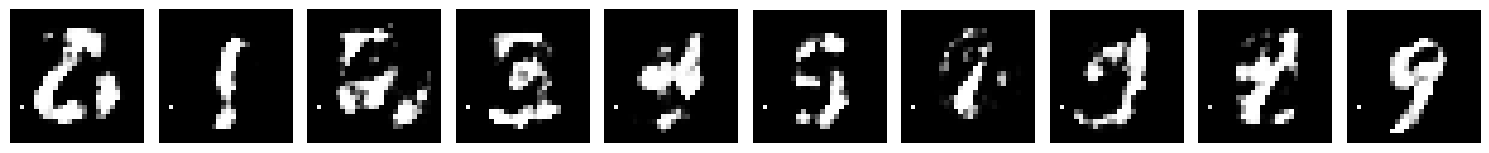

 50%|█████████████████                 | 2/4 [19:18<15:30, 465.23s/it, 34001/60000, dis_loss: 0.3710, gen_loss: 1.8034]

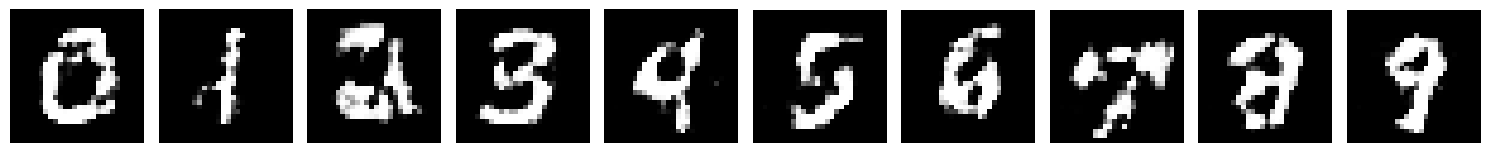

 50%|█████████████████                 | 2/4 [19:27<15:30, 465.23s/it, 35001/60000, dis_loss: 0.3710, gen_loss: 1.8040]

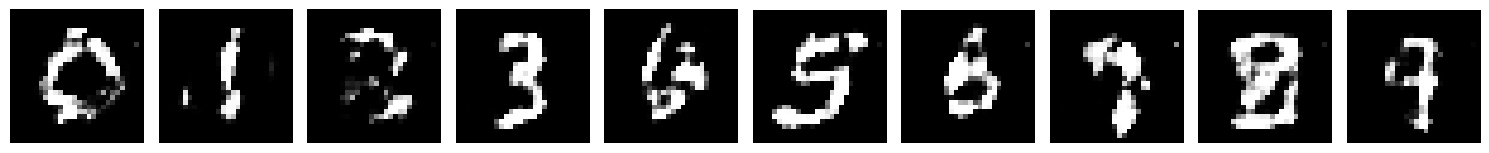

 50%|█████████████████                 | 2/4 [19:35<15:30, 465.23s/it, 36001/60000, dis_loss: 0.3699, gen_loss: 1.8078]

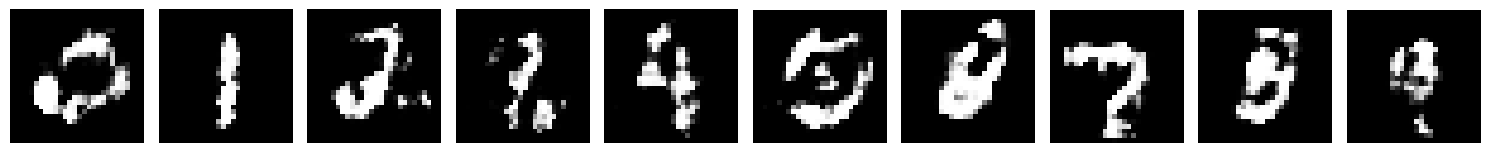

 50%|█████████████████                 | 2/4 [19:43<15:30, 465.23s/it, 37001/60000, dis_loss: 0.3703, gen_loss: 1.8086]

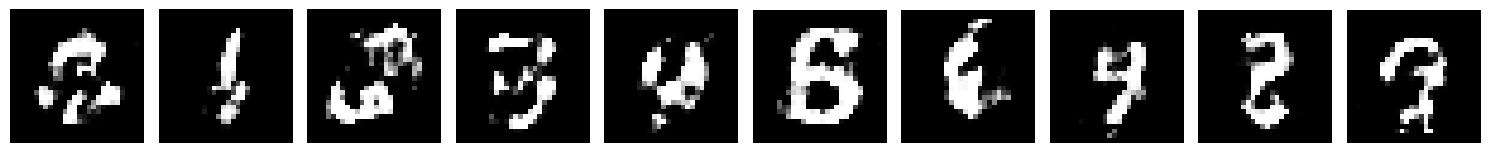

 50%|█████████████████                 | 2/4 [19:52<15:30, 465.23s/it, 38001/60000, dis_loss: 0.3699, gen_loss: 1.8104]

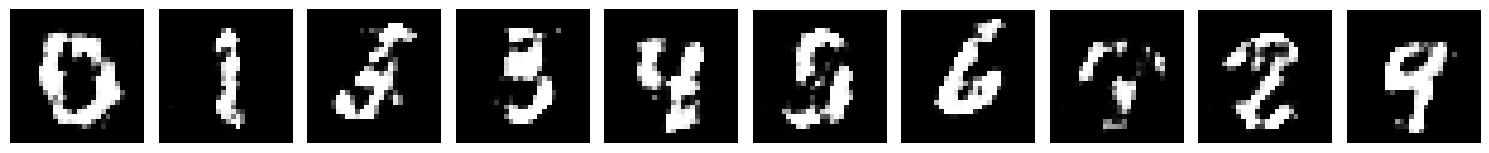

 50%|█████████████████                 | 2/4 [20:00<15:30, 465.23s/it, 39001/60000, dis_loss: 0.3689, gen_loss: 1.8113]

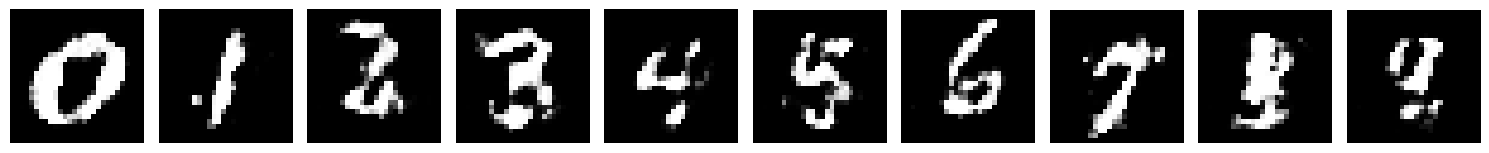

 50%|█████████████████                 | 2/4 [20:09<15:30, 465.23s/it, 40001/60000, dis_loss: 0.3689, gen_loss: 1.8105]

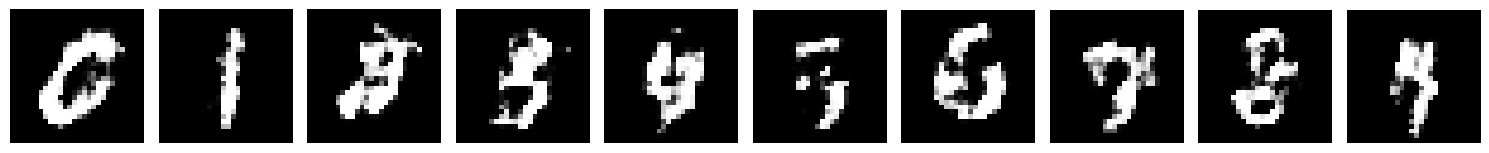

 50%|█████████████████                 | 2/4 [20:17<15:30, 465.23s/it, 41001/60000, dis_loss: 0.3680, gen_loss: 1.8120]

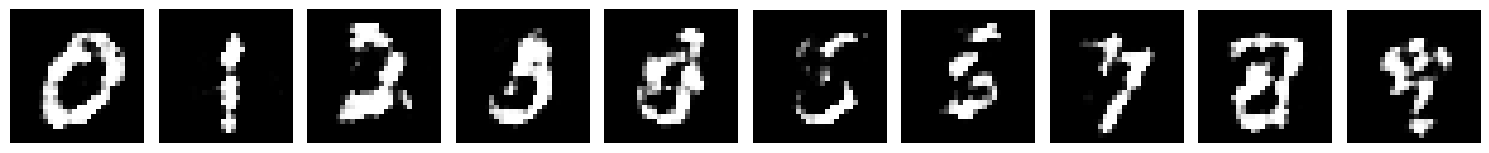

 50%|█████████████████                 | 2/4 [20:26<15:30, 465.23s/it, 42001/60000, dis_loss: 0.3669, gen_loss: 1.8161]

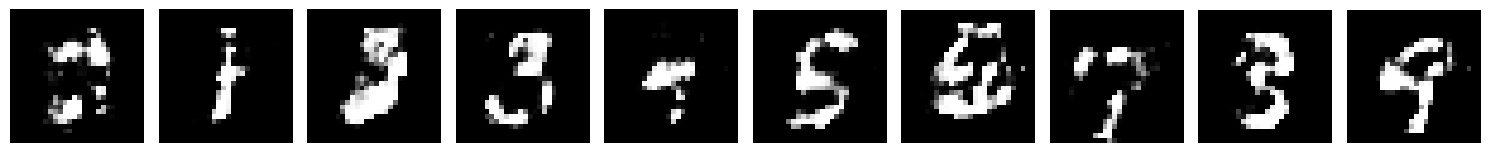

 50%|█████████████████                 | 2/4 [20:35<15:30, 465.23s/it, 43001/60000, dis_loss: 0.3671, gen_loss: 1.8174]

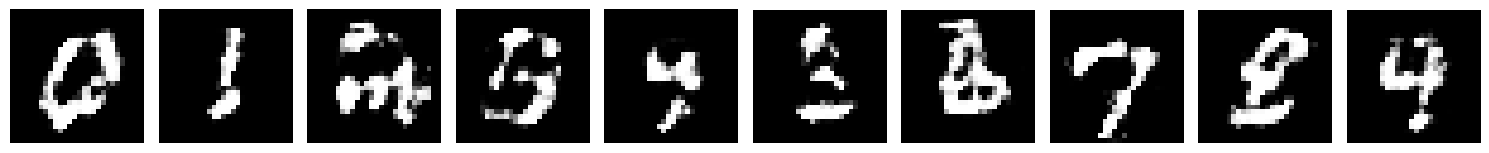

 50%|█████████████████                 | 2/4 [20:44<15:30, 465.23s/it, 44001/60000, dis_loss: 0.3673, gen_loss: 1.8181]

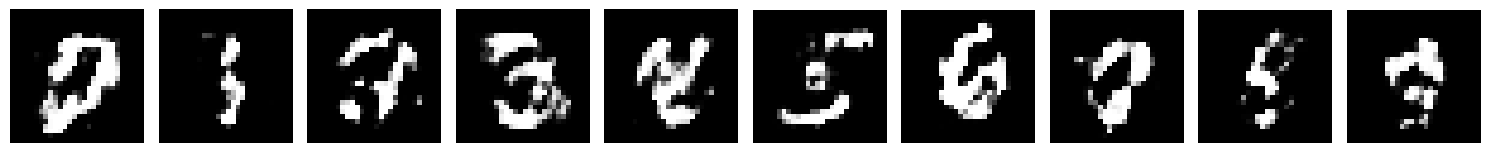

 50%|█████████████████                 | 2/4 [20:53<15:30, 465.23s/it, 45001/60000, dis_loss: 0.3668, gen_loss: 1.8199]

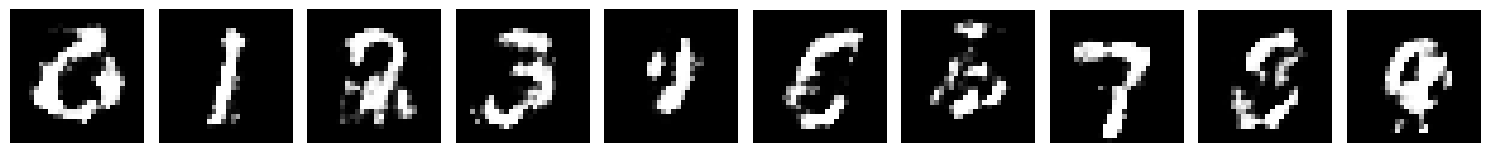

 50%|█████████████████                 | 2/4 [21:02<15:30, 465.23s/it, 46001/60000, dis_loss: 0.3666, gen_loss: 1.8192]

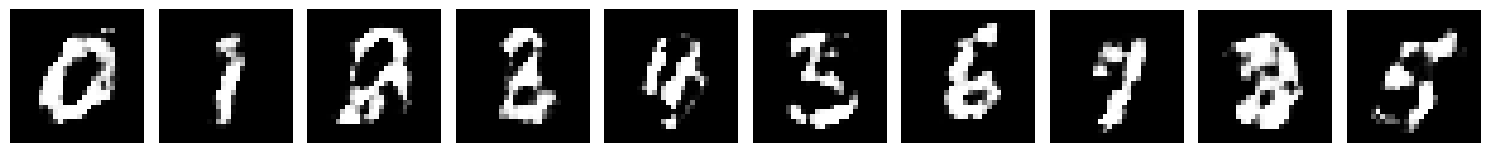

 50%|█████████████████                 | 2/4 [21:11<15:30, 465.23s/it, 47001/60000, dis_loss: 0.3666, gen_loss: 1.8200]

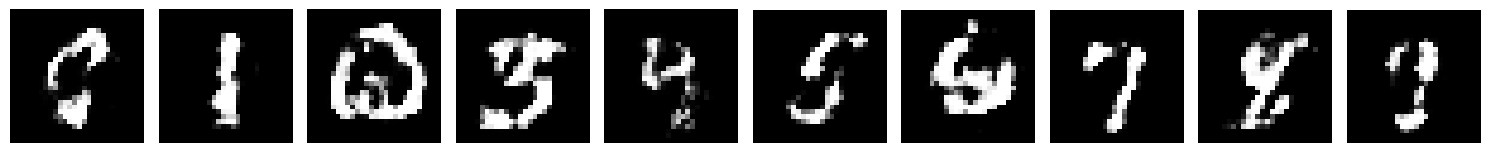

 50%|█████████████████                 | 2/4 [21:20<15:30, 465.23s/it, 48001/60000, dis_loss: 0.3666, gen_loss: 1.8217]

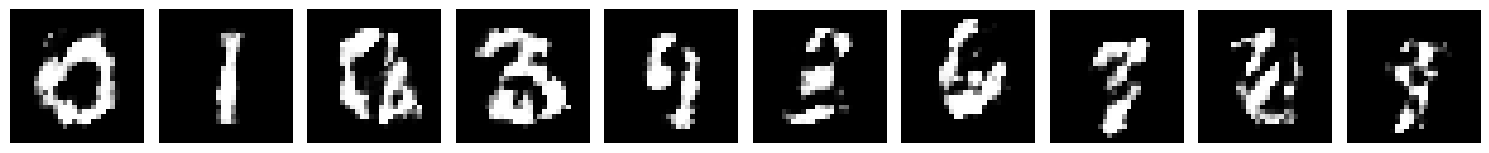

 50%|█████████████████                 | 2/4 [21:29<15:30, 465.23s/it, 49001/60000, dis_loss: 0.3667, gen_loss: 1.8213]

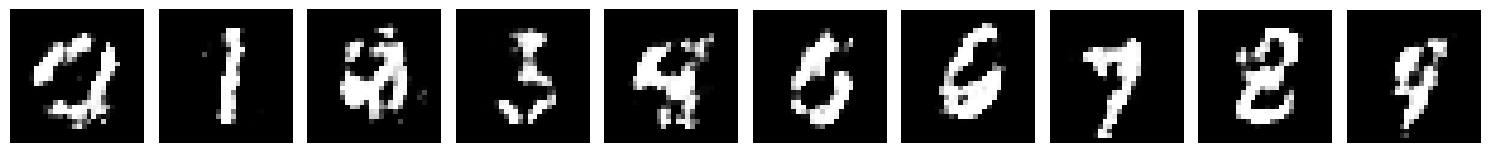

 50%|█████████████████                 | 2/4 [21:38<15:30, 465.23s/it, 50001/60000, dis_loss: 0.3656, gen_loss: 1.8246]

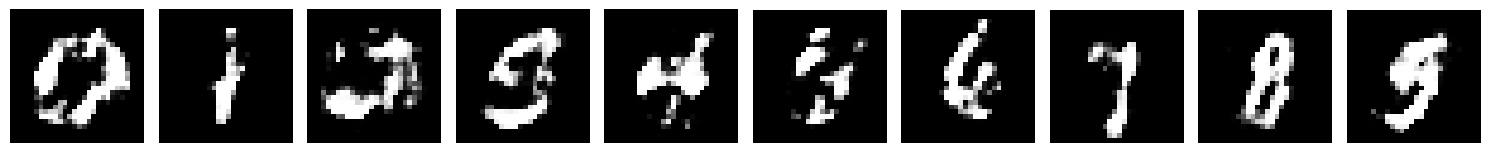

 50%|█████████████████                 | 2/4 [21:48<15:30, 465.23s/it, 51001/60000, dis_loss: 0.3659, gen_loss: 1.8240]

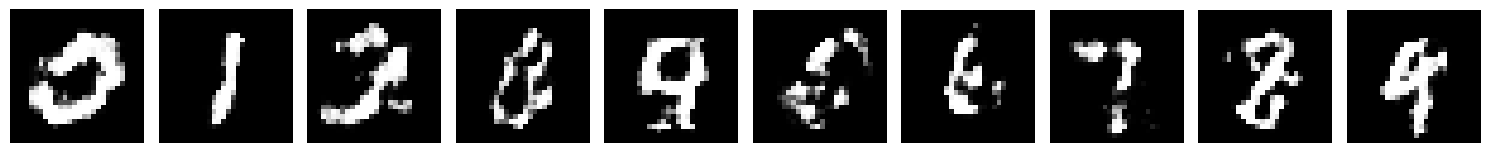

 50%|█████████████████                 | 2/4 [21:57<15:30, 465.23s/it, 52001/60000, dis_loss: 0.3656, gen_loss: 1.8241]

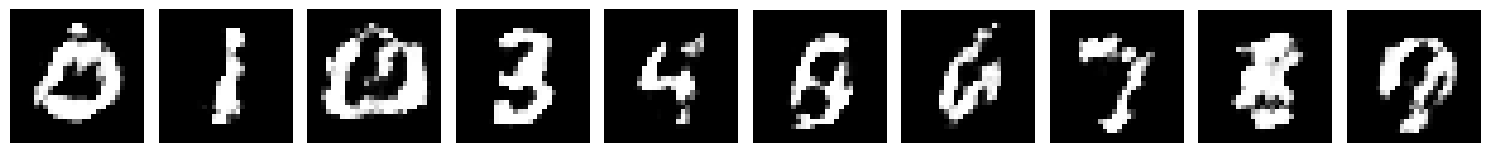

 50%|█████████████████                 | 2/4 [22:07<15:30, 465.23s/it, 53001/60000, dis_loss: 0.3655, gen_loss: 1.8230]

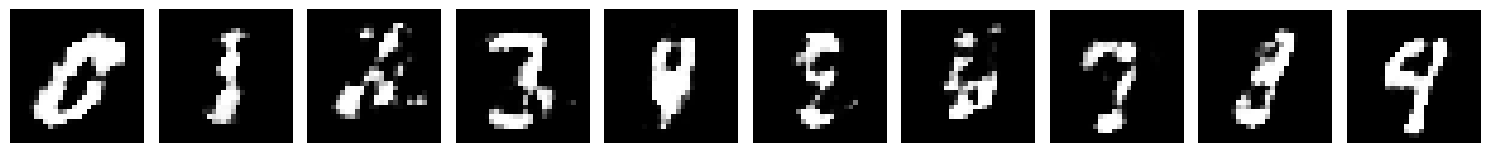

 50%|█████████████████                 | 2/4 [22:17<15:30, 465.23s/it, 54001/60000, dis_loss: 0.3651, gen_loss: 1.8239]

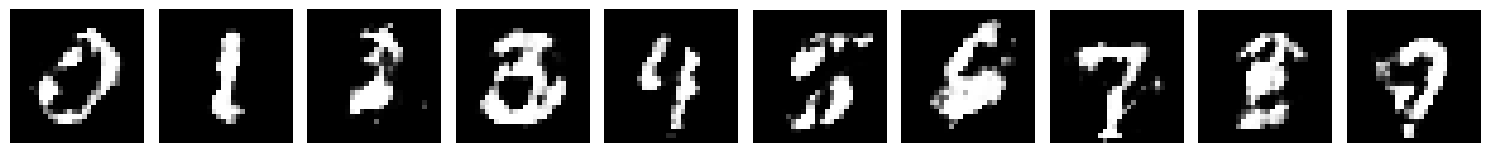

 50%|█████████████████                 | 2/4 [22:26<15:30, 465.23s/it, 55001/60000, dis_loss: 0.3654, gen_loss: 1.8238]

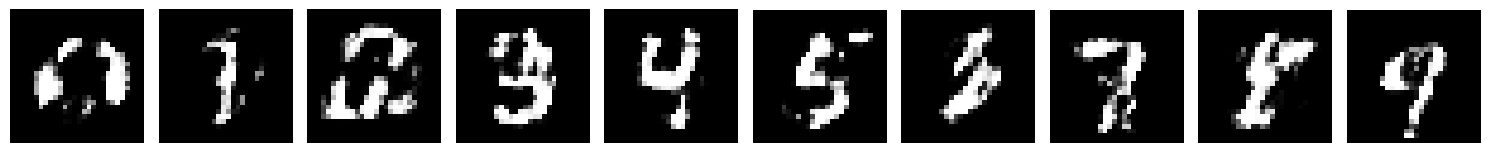

 50%|█████████████████                 | 2/4 [22:36<15:30, 465.23s/it, 56001/60000, dis_loss: 0.3659, gen_loss: 1.8220]

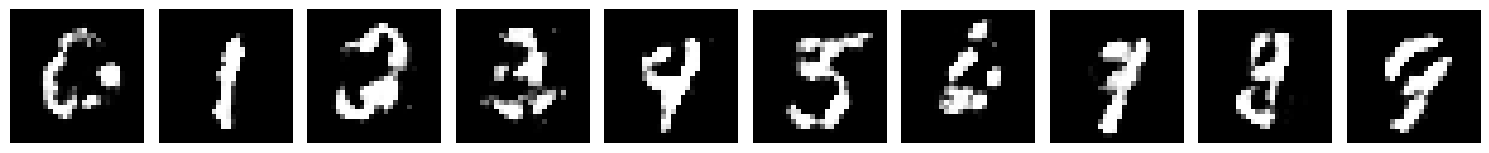

 50%|█████████████████                 | 2/4 [22:46<15:30, 465.23s/it, 57001/60000, dis_loss: 0.3655, gen_loss: 1.8225]

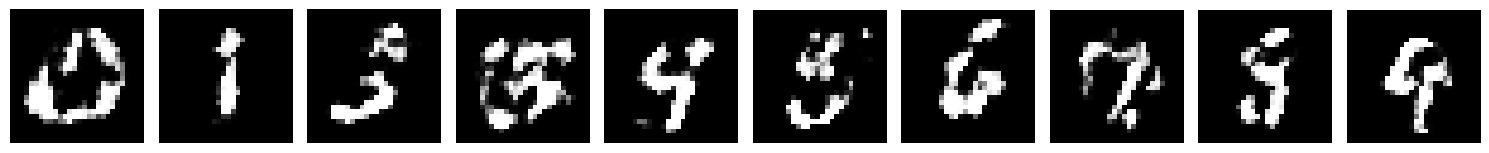

 50%|█████████████████                 | 2/4 [22:56<15:30, 465.23s/it, 58001/60000, dis_loss: 0.3647, gen_loss: 1.8254]

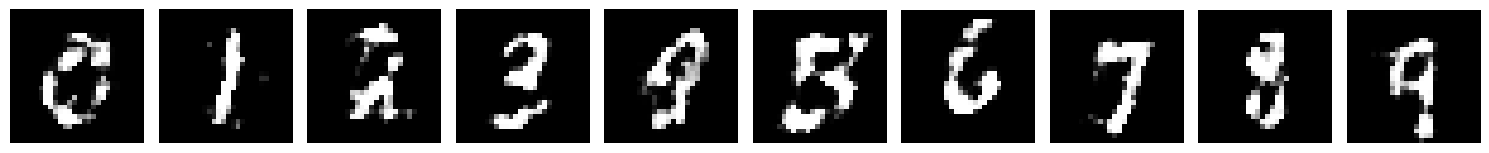

 50%|█████████████████                 | 2/4 [23:06<15:30, 465.23s/it, 59001/60000, dis_loss: 0.3643, gen_loss: 1.8280]

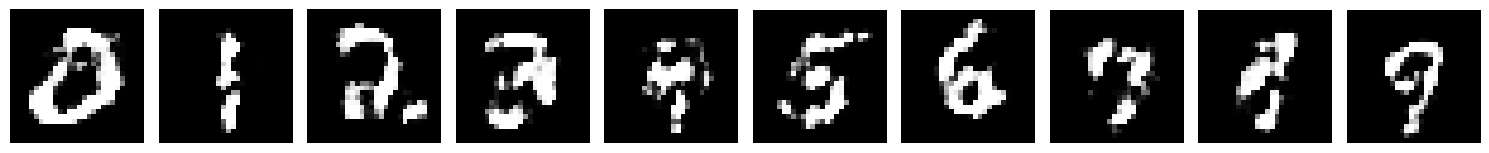

 75%|████████████████████████████▌         | 3/4 [23:16<07:45, 465.84s/it, 1/60000, dis_loss: 0.0528, gen_loss: 2.0035]

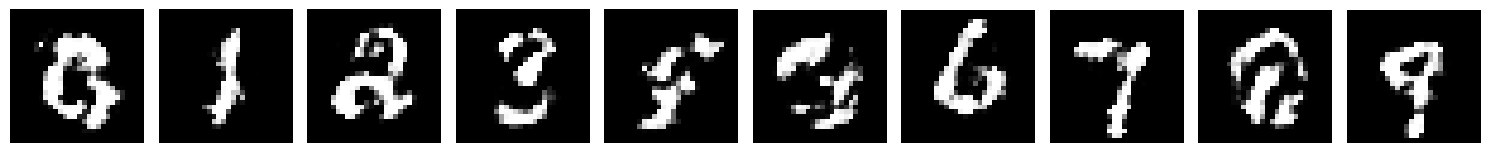

 75%|██████████████████████████▎        | 3/4 [23:21<07:45, 465.84s/it, 1001/60000, dis_loss: 0.3419, gen_loss: 1.9605]

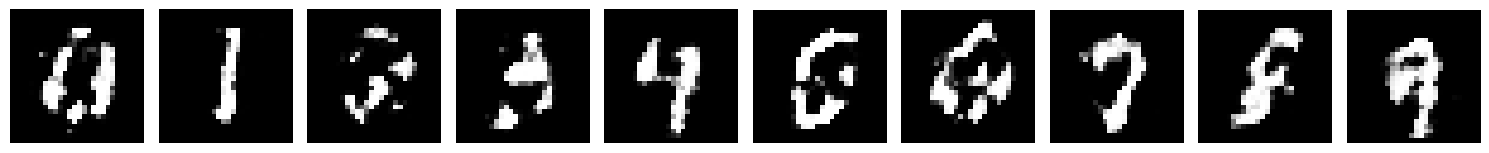

 75%|██████████████████████████▎        | 3/4 [23:27<07:45, 465.84s/it, 2001/60000, dis_loss: 0.3631, gen_loss: 1.8837]

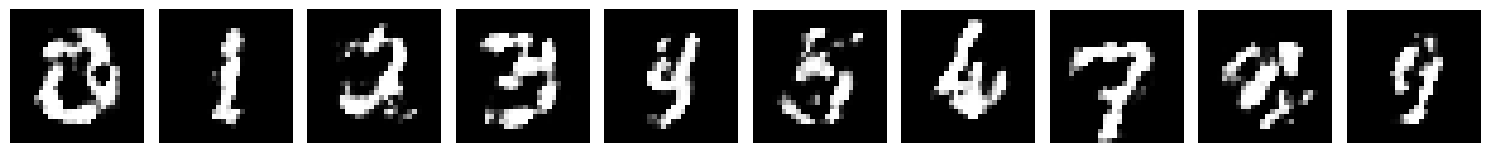

 75%|██████████████████████████▎        | 3/4 [23:32<07:45, 465.84s/it, 3001/60000, dis_loss: 0.3531, gen_loss: 1.8513]

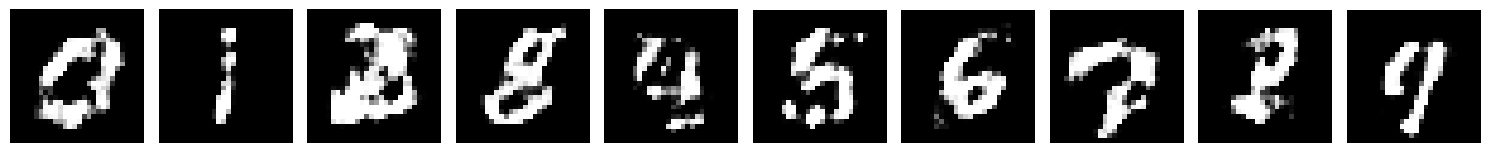

 75%|██████████████████████████▎        | 3/4 [23:38<07:45, 465.84s/it, 4001/60000, dis_loss: 0.3536, gen_loss: 1.8613]

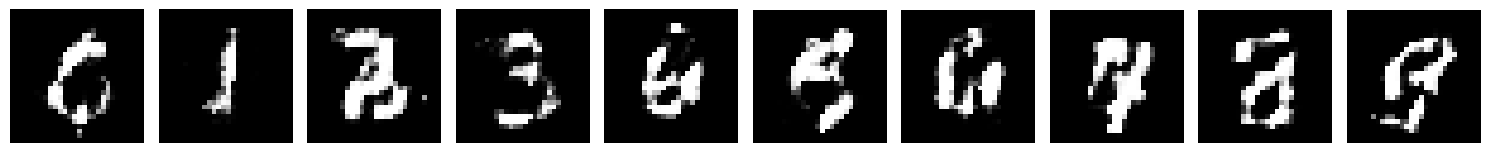

 75%|██████████████████████████▎        | 3/4 [23:44<07:45, 465.84s/it, 5001/60000, dis_loss: 0.3515, gen_loss: 1.8721]

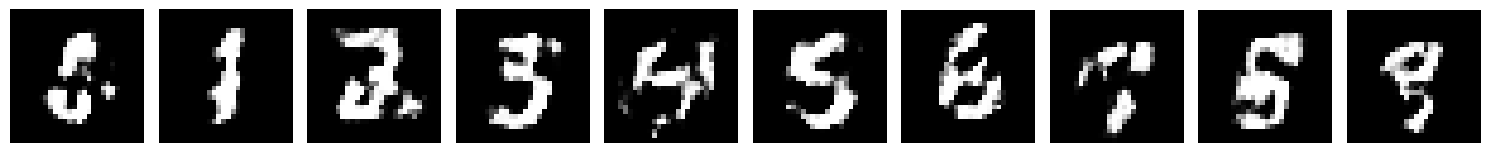

 75%|██████████████████████████▎        | 3/4 [23:49<07:45, 465.84s/it, 6001/60000, dis_loss: 0.3542, gen_loss: 1.8683]

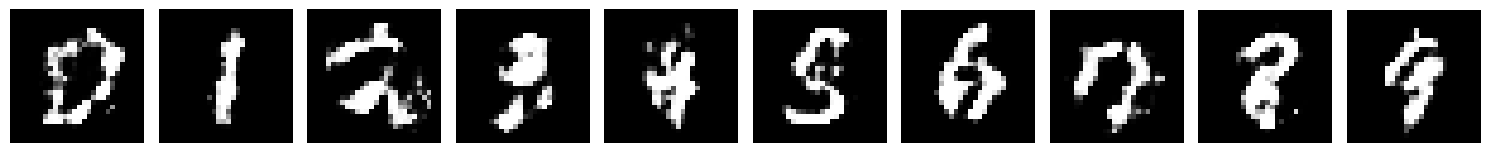

 75%|██████████████████████████▎        | 3/4 [23:55<07:45, 465.84s/it, 7001/60000, dis_loss: 0.3616, gen_loss: 1.8436]

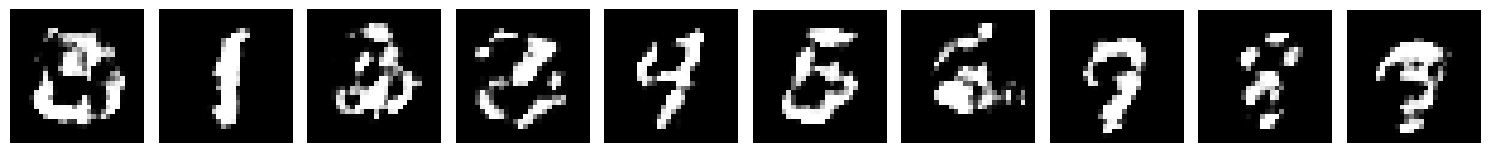

 75%|██████████████████████████▎        | 3/4 [24:01<07:45, 465.84s/it, 8001/60000, dis_loss: 0.3582, gen_loss: 1.8580]

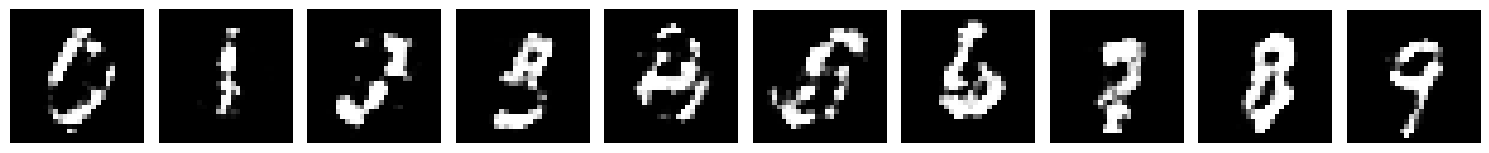

 75%|██████████████████████████▎        | 3/4 [24:07<07:45, 465.84s/it, 9001/60000, dis_loss: 0.3613, gen_loss: 1.8494]

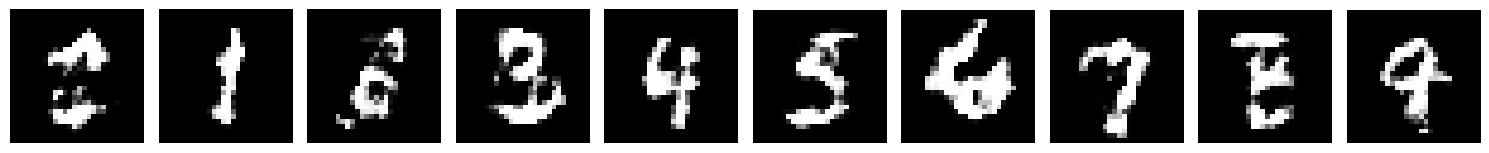

 75%|█████████████████████████▌        | 3/4 [24:13<07:45, 465.84s/it, 10001/60000, dis_loss: 0.3581, gen_loss: 1.8431]

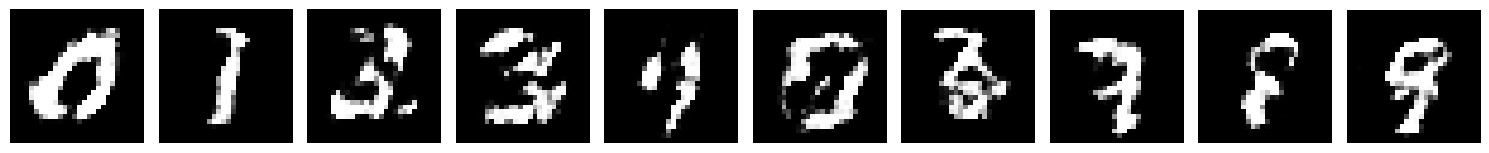

 75%|█████████████████████████▌        | 3/4 [24:20<07:45, 465.84s/it, 11001/60000, dis_loss: 0.3590, gen_loss: 1.8453]

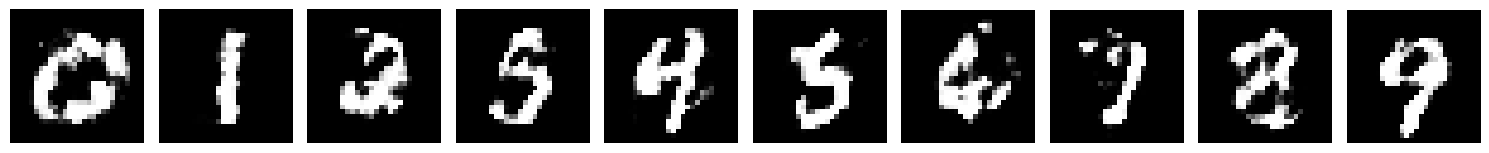

 75%|█████████████████████████▌        | 3/4 [24:26<07:45, 465.84s/it, 12001/60000, dis_loss: 0.3601, gen_loss: 1.8382]

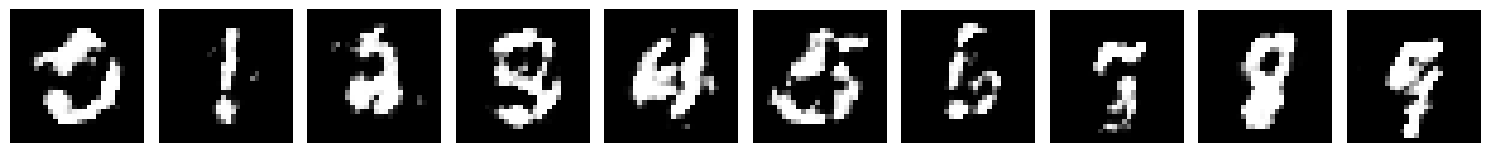

 75%|█████████████████████████▌        | 3/4 [24:32<07:45, 465.84s/it, 13001/60000, dis_loss: 0.3593, gen_loss: 1.8462]

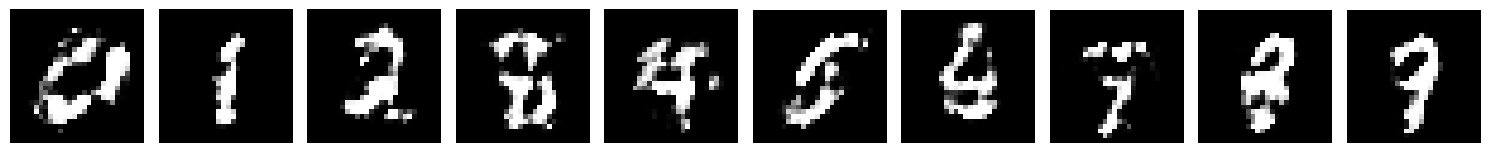

 75%|█████████████████████████▌        | 3/4 [24:39<07:45, 465.84s/it, 14001/60000, dis_loss: 0.3568, gen_loss: 1.8513]

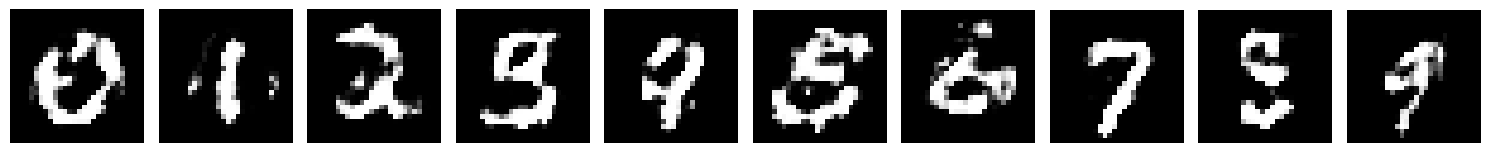

 75%|█████████████████████████▌        | 3/4 [24:45<07:45, 465.84s/it, 15001/60000, dis_loss: 0.3550, gen_loss: 1.8586]

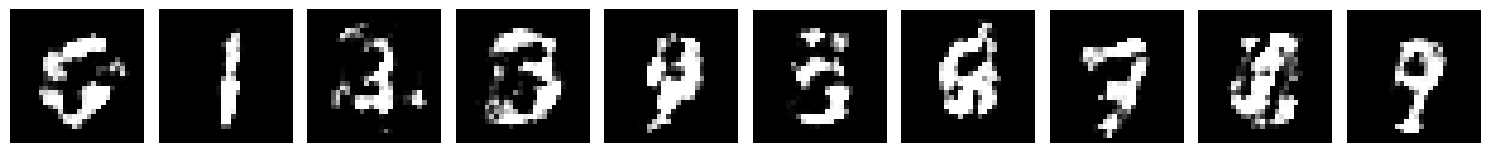

 75%|█████████████████████████▌        | 3/4 [24:52<07:45, 465.84s/it, 16001/60000, dis_loss: 0.3534, gen_loss: 1.8605]

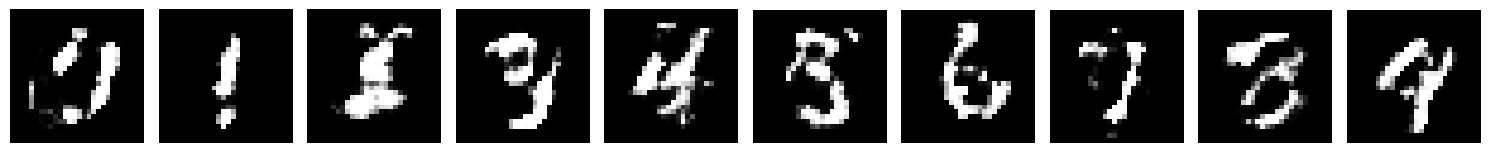

 75%|█████████████████████████▌        | 3/4 [24:58<07:45, 465.84s/it, 17001/60000, dis_loss: 0.3541, gen_loss: 1.8614]

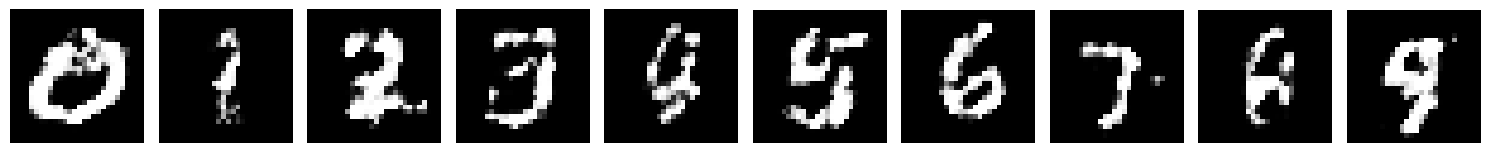

 75%|█████████████████████████▌        | 3/4 [25:05<07:45, 465.84s/it, 18001/60000, dis_loss: 0.3531, gen_loss: 1.8680]

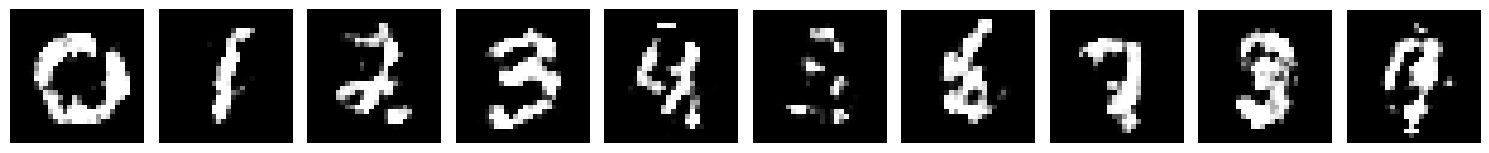

 75%|█████████████████████████▌        | 3/4 [25:12<07:45, 465.84s/it, 19001/60000, dis_loss: 0.3549, gen_loss: 1.8632]

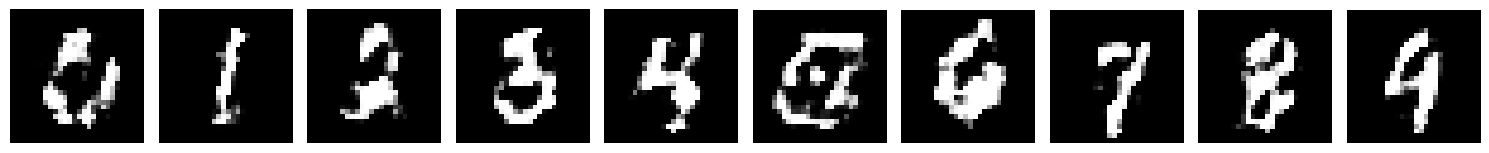

 75%|█████████████████████████▌        | 3/4 [25:19<07:45, 465.84s/it, 20001/60000, dis_loss: 0.3560, gen_loss: 1.8629]

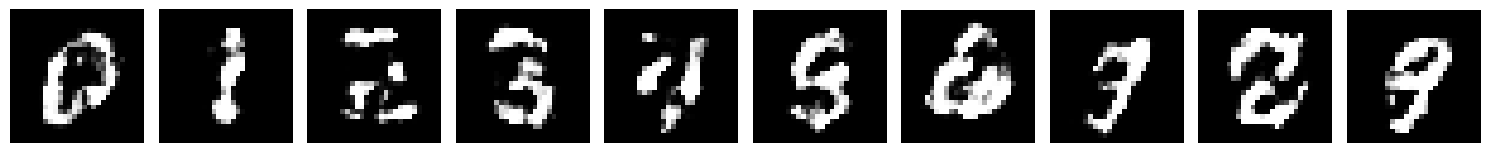

 75%|█████████████████████████▌        | 3/4 [25:26<07:45, 465.84s/it, 21001/60000, dis_loss: 0.3557, gen_loss: 1.8620]

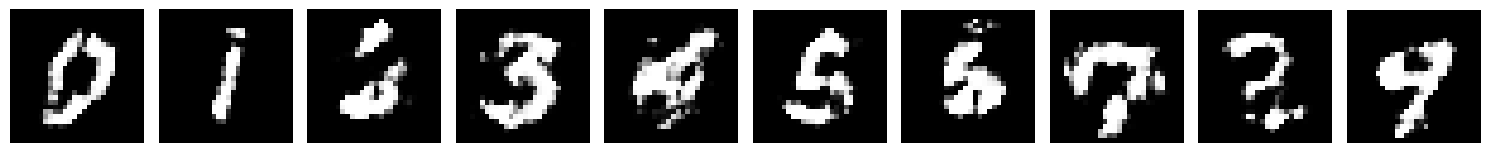

 75%|█████████████████████████▌        | 3/4 [25:33<07:45, 465.84s/it, 22001/60000, dis_loss: 0.3558, gen_loss: 1.8579]

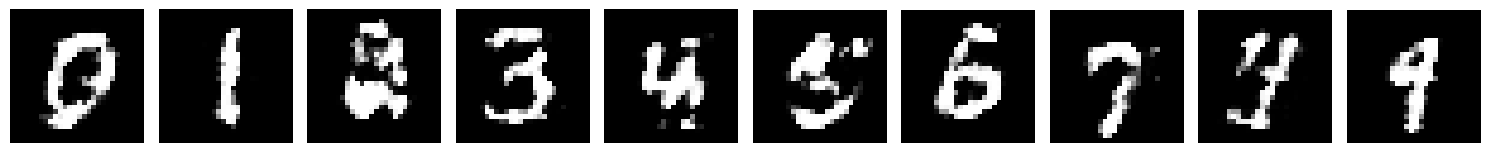

 75%|█████████████████████████▌        | 3/4 [25:40<07:45, 465.84s/it, 23001/60000, dis_loss: 0.3550, gen_loss: 1.8620]

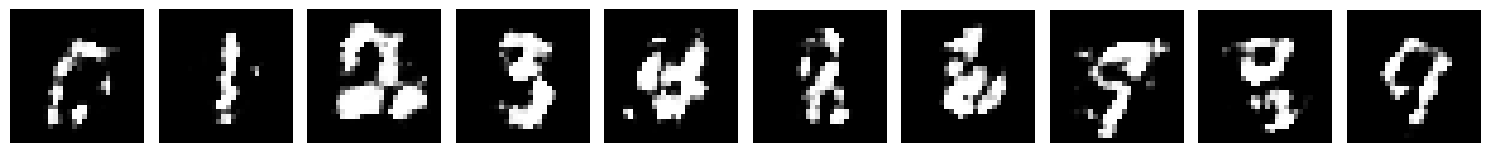

 75%|█████████████████████████▌        | 3/4 [25:48<07:45, 465.84s/it, 24001/60000, dis_loss: 0.3548, gen_loss: 1.8648]

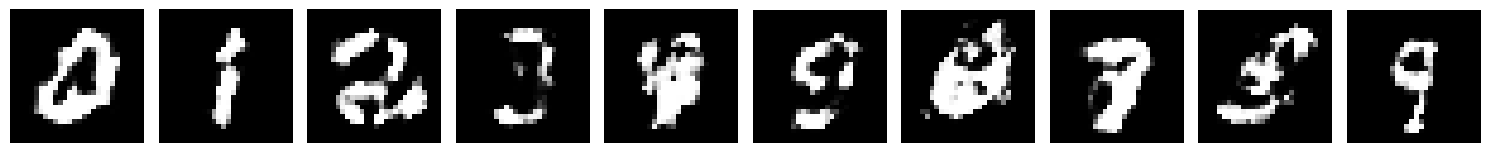

 75%|█████████████████████████▌        | 3/4 [25:55<07:45, 465.84s/it, 25001/60000, dis_loss: 0.3541, gen_loss: 1.8635]

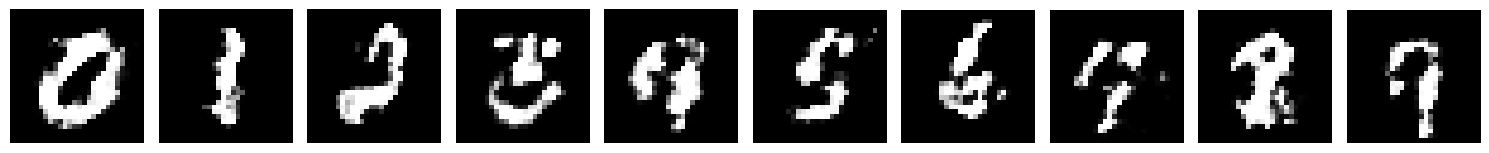

 75%|█████████████████████████▌        | 3/4 [26:03<07:45, 465.84s/it, 26001/60000, dis_loss: 0.3543, gen_loss: 1.8662]

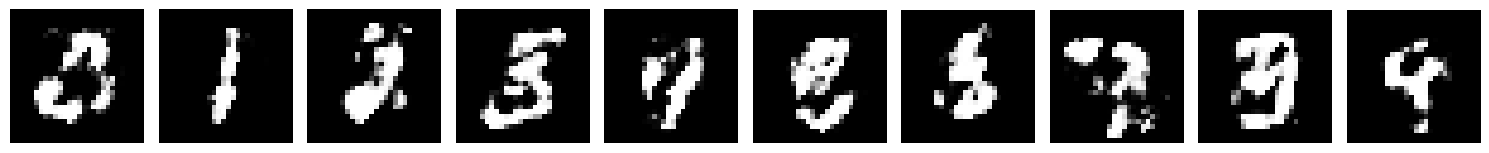

 75%|█████████████████████████▌        | 3/4 [26:10<07:45, 465.84s/it, 27001/60000, dis_loss: 0.3548, gen_loss: 1.8627]

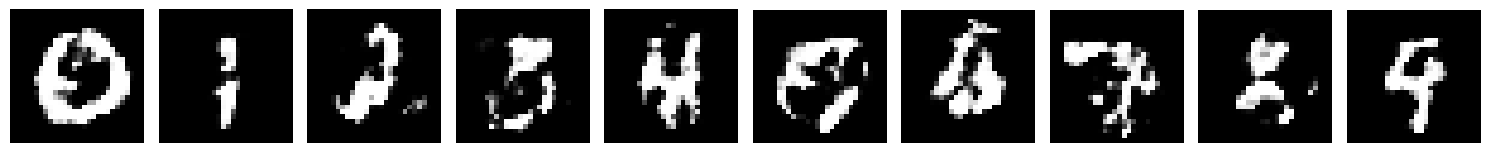

 75%|█████████████████████████▌        | 3/4 [26:18<07:45, 465.84s/it, 28001/60000, dis_loss: 0.3550, gen_loss: 1.8657]

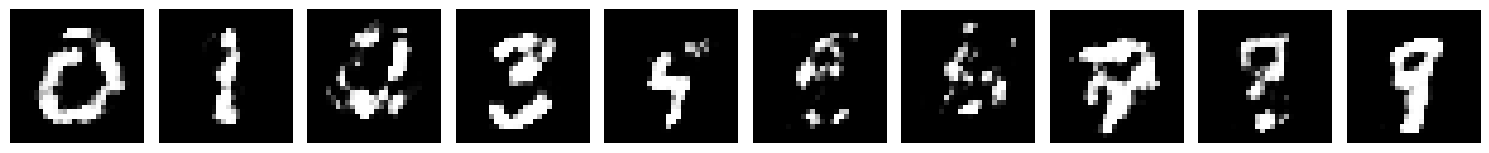

 75%|█████████████████████████▌        | 3/4 [26:25<07:45, 465.84s/it, 29001/60000, dis_loss: 0.3561, gen_loss: 1.8634]

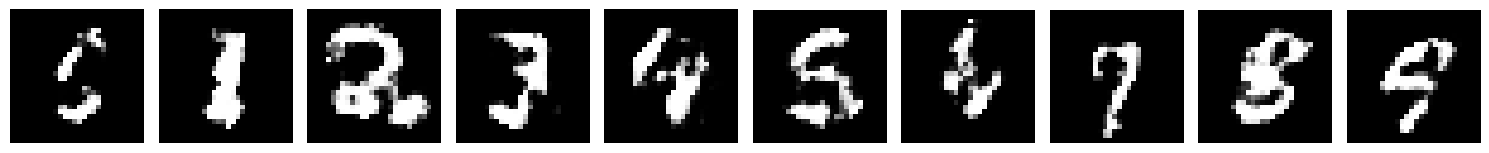

 75%|█████████████████████████▌        | 3/4 [26:33<07:45, 465.84s/it, 30001/60000, dis_loss: 0.3566, gen_loss: 1.8616]

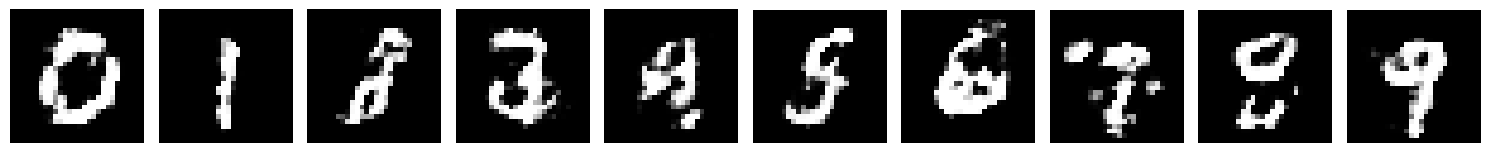

 75%|█████████████████████████▌        | 3/4 [26:41<07:45, 465.84s/it, 31001/60000, dis_loss: 0.3560, gen_loss: 1.8629]

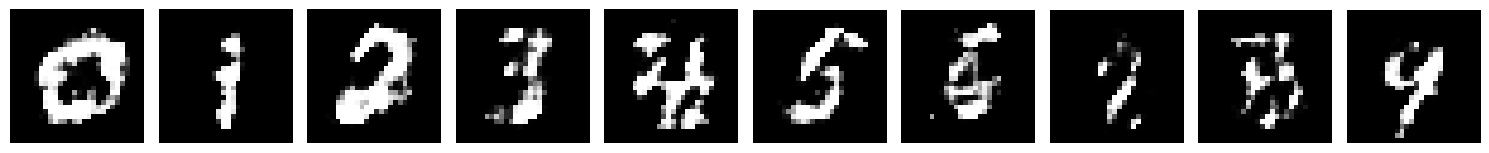

 75%|█████████████████████████▌        | 3/4 [26:49<07:45, 465.84s/it, 32001/60000, dis_loss: 0.3547, gen_loss: 1.8631]

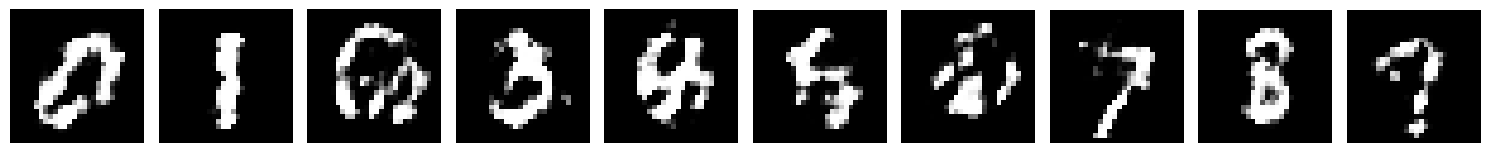

 75%|█████████████████████████▌        | 3/4 [26:57<07:45, 465.84s/it, 33001/60000, dis_loss: 0.3541, gen_loss: 1.8667]

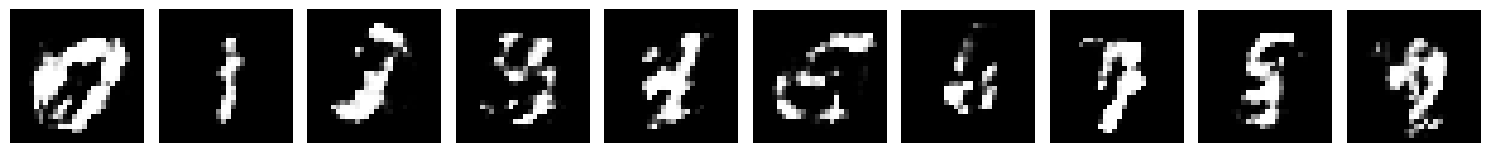

 75%|█████████████████████████▌        | 3/4 [27:05<07:45, 465.84s/it, 34001/60000, dis_loss: 0.3543, gen_loss: 1.8663]

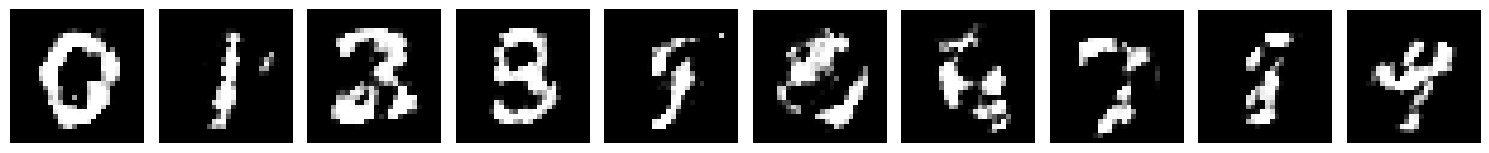

 75%|█████████████████████████▌        | 3/4 [27:13<07:45, 465.84s/it, 35001/60000, dis_loss: 0.3544, gen_loss: 1.8677]

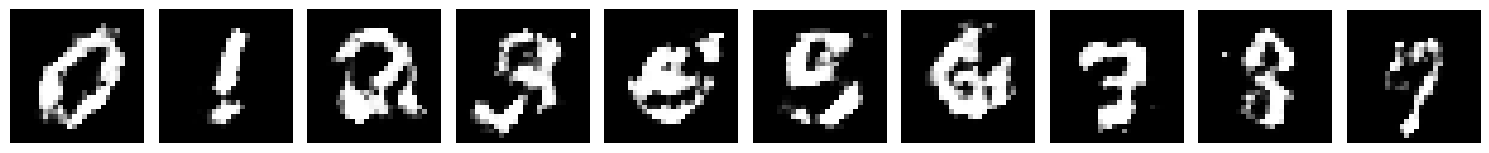

 75%|█████████████████████████▌        | 3/4 [27:21<07:45, 465.84s/it, 36001/60000, dis_loss: 0.3532, gen_loss: 1.8723]

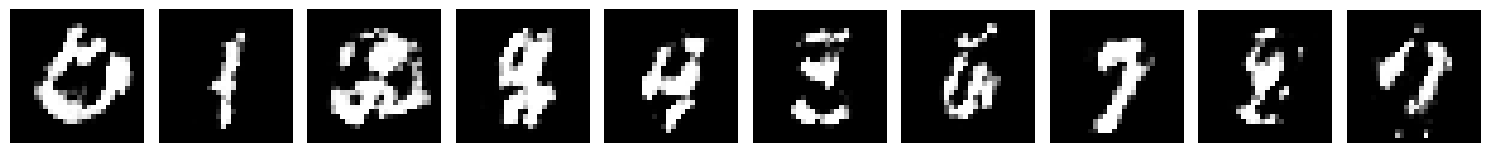

 75%|█████████████████████████▌        | 3/4 [27:30<07:45, 465.84s/it, 37001/60000, dis_loss: 0.3539, gen_loss: 1.8736]

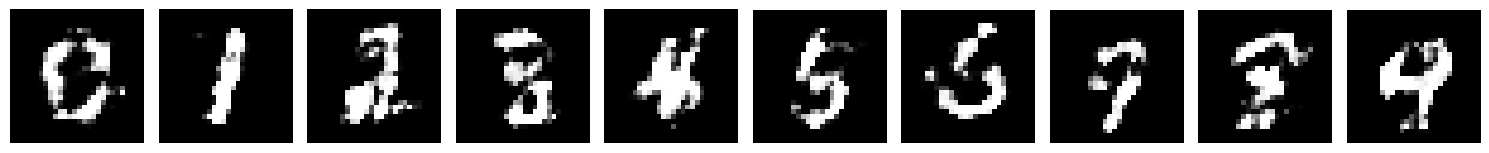

 75%|█████████████████████████▌        | 3/4 [27:38<07:45, 465.84s/it, 38001/60000, dis_loss: 0.3540, gen_loss: 1.8755]

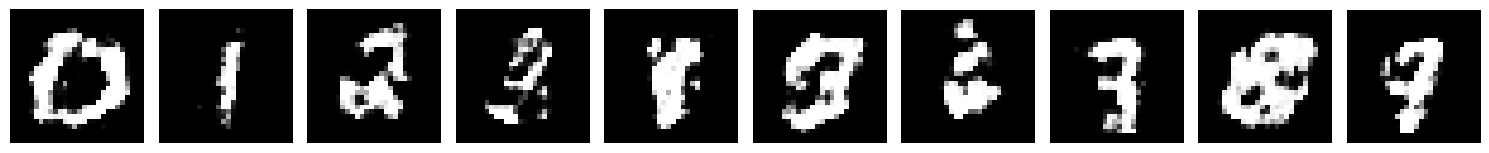

 75%|█████████████████████████▌        | 3/4 [27:47<07:45, 465.84s/it, 39001/60000, dis_loss: 0.3543, gen_loss: 1.8771]

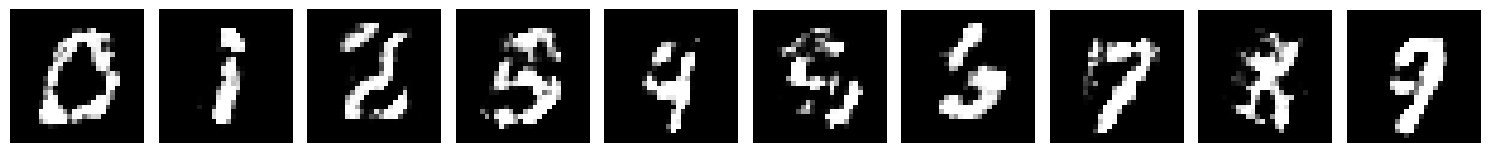

 75%|█████████████████████████▌        | 3/4 [27:55<07:45, 465.84s/it, 40001/60000, dis_loss: 0.3551, gen_loss: 1.8752]

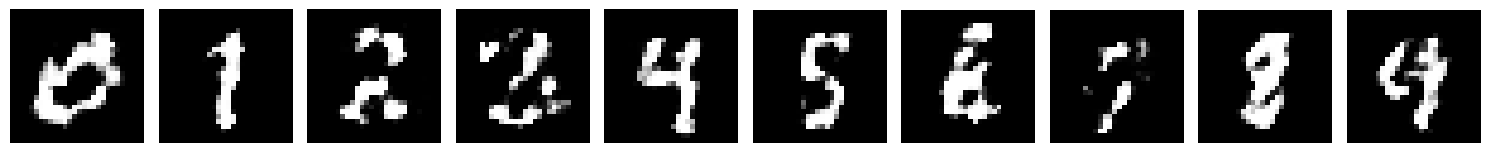

 75%|█████████████████████████▌        | 3/4 [28:04<07:45, 465.84s/it, 41001/60000, dis_loss: 0.3544, gen_loss: 1.8759]

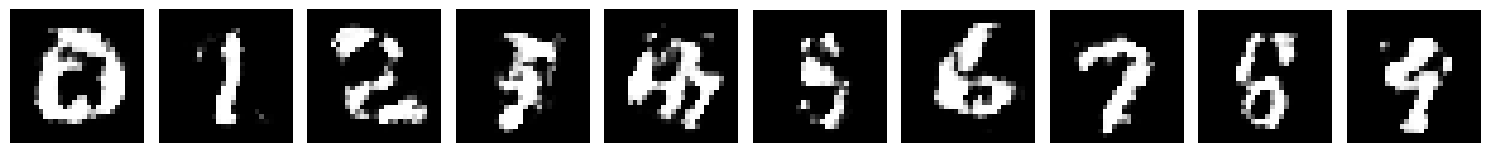

 75%|█████████████████████████▌        | 3/4 [28:12<07:45, 465.84s/it, 42001/60000, dis_loss: 0.3535, gen_loss: 1.8797]

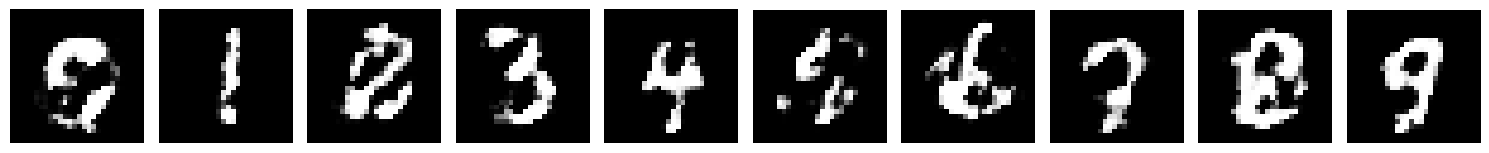

 75%|█████████████████████████▌        | 3/4 [28:21<07:45, 465.84s/it, 43001/60000, dis_loss: 0.3540, gen_loss: 1.8799]

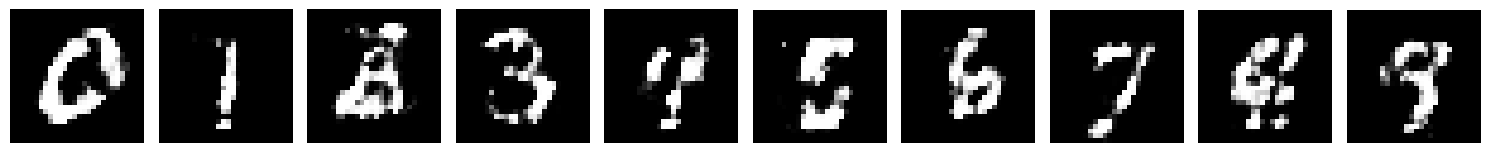

 75%|█████████████████████████▌        | 3/4 [28:30<07:45, 465.84s/it, 44001/60000, dis_loss: 0.3541, gen_loss: 1.8788]

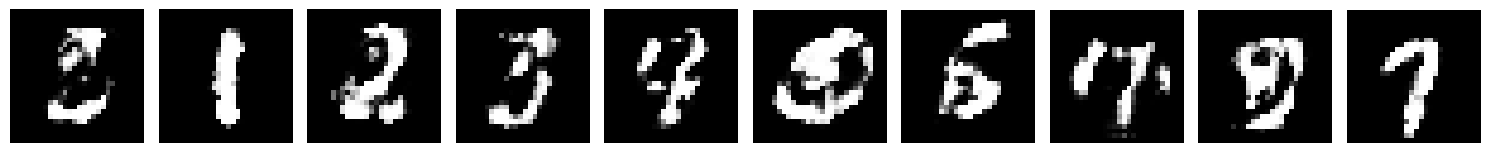

 75%|█████████████████████████▌        | 3/4 [28:39<07:45, 465.84s/it, 45001/60000, dis_loss: 0.3534, gen_loss: 1.8811]

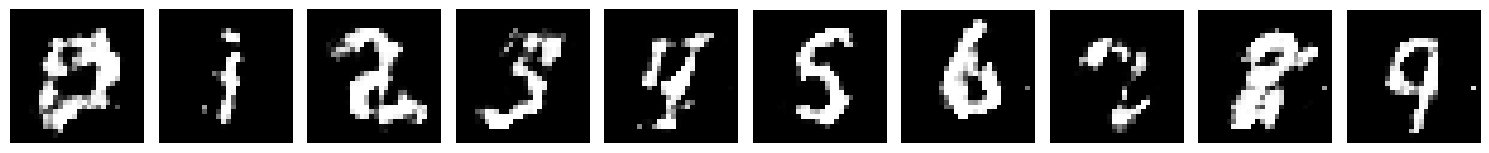

 75%|█████████████████████████▌        | 3/4 [28:48<07:45, 465.84s/it, 46001/60000, dis_loss: 0.3525, gen_loss: 1.8827]

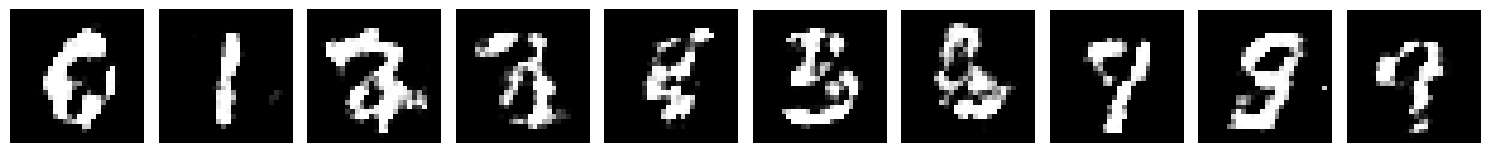

 75%|█████████████████████████▌        | 3/4 [28:57<07:45, 465.84s/it, 47001/60000, dis_loss: 0.3524, gen_loss: 1.8843]

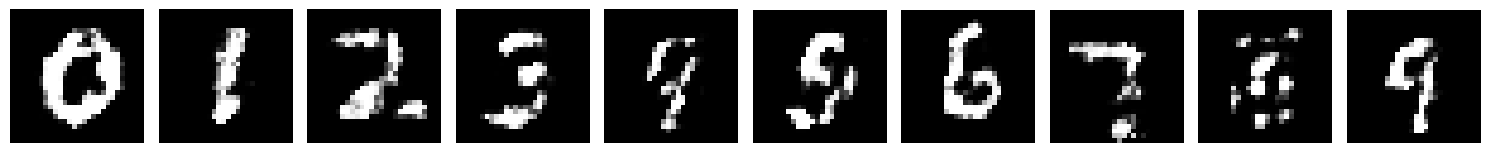

 75%|█████████████████████████▌        | 3/4 [29:07<07:45, 465.84s/it, 48001/60000, dis_loss: 0.3522, gen_loss: 1.8847]

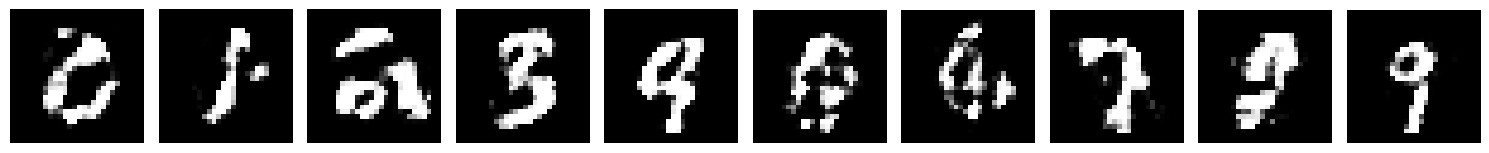

 75%|█████████████████████████▌        | 3/4 [29:16<07:45, 465.84s/it, 49001/60000, dis_loss: 0.3527, gen_loss: 1.8824]

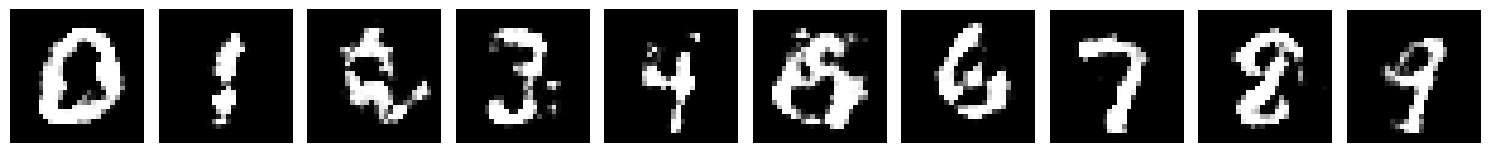

 75%|█████████████████████████▌        | 3/4 [29:25<07:45, 465.84s/it, 50001/60000, dis_loss: 0.3519, gen_loss: 1.8860]

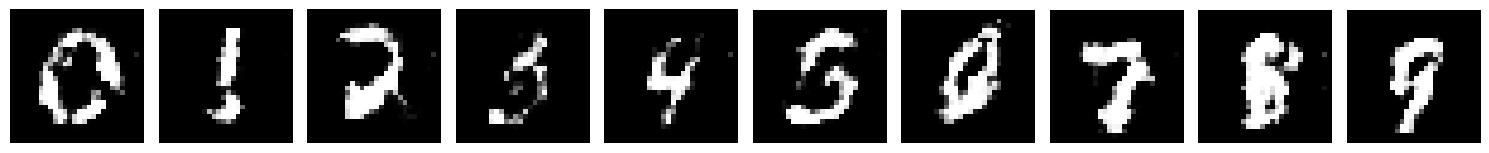

 75%|█████████████████████████▌        | 3/4 [29:35<07:45, 465.84s/it, 51001/60000, dis_loss: 0.3520, gen_loss: 1.8860]

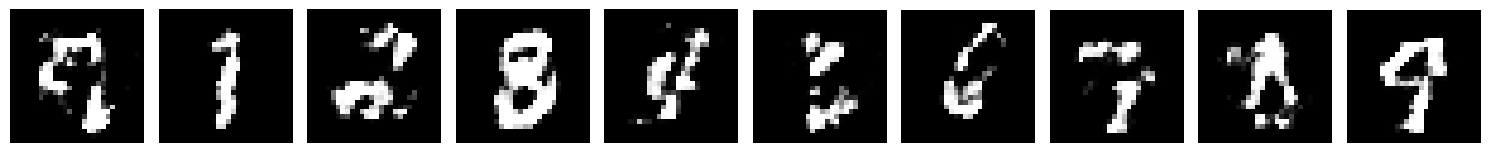

 75%|█████████████████████████▌        | 3/4 [29:44<07:45, 465.84s/it, 52001/60000, dis_loss: 0.3517, gen_loss: 1.8860]

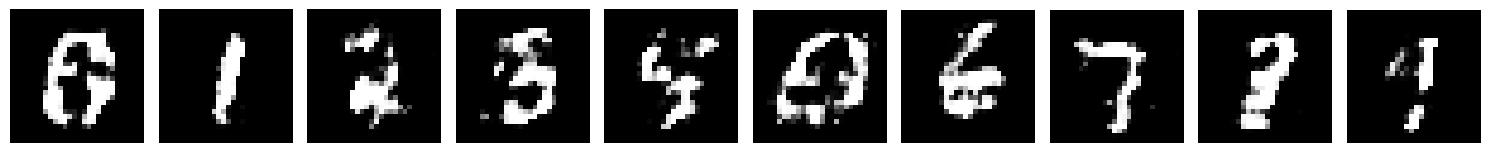

 75%|█████████████████████████▌        | 3/4 [29:54<07:45, 465.84s/it, 53001/60000, dis_loss: 0.3520, gen_loss: 1.8872]

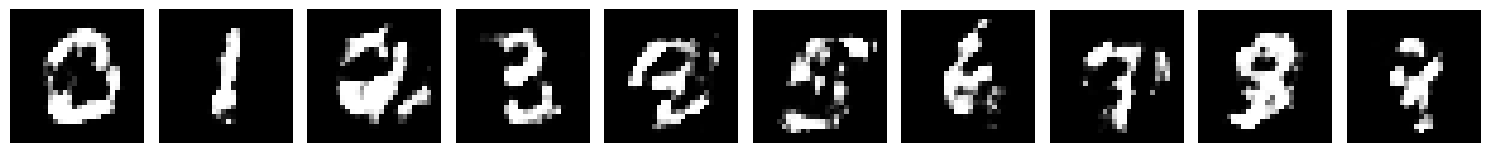

 75%|█████████████████████████▌        | 3/4 [30:03<07:45, 465.84s/it, 54001/60000, dis_loss: 0.3520, gen_loss: 1.8903]

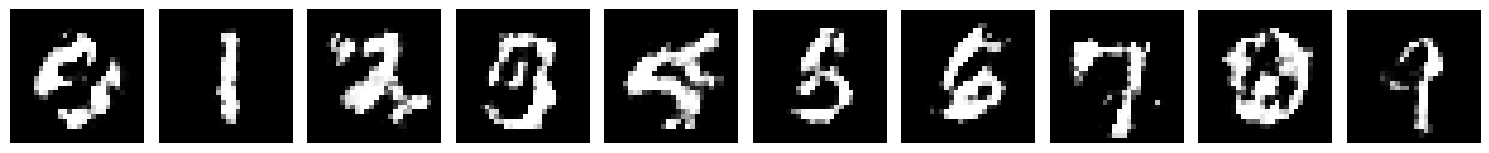

 75%|█████████████████████████▌        | 3/4 [30:13<07:45, 465.84s/it, 55001/60000, dis_loss: 0.3525, gen_loss: 1.8888]

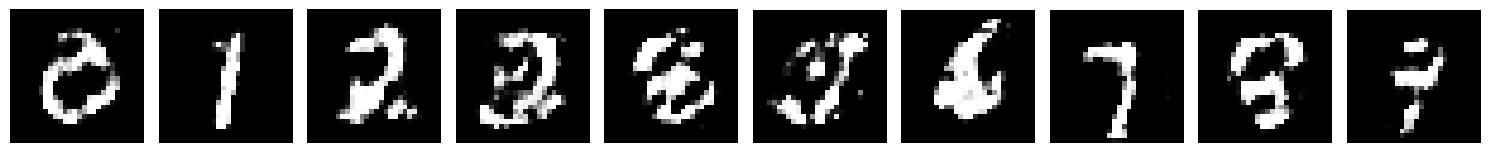

 75%|█████████████████████████▌        | 3/4 [30:23<07:45, 465.84s/it, 56001/60000, dis_loss: 0.3535, gen_loss: 1.8865]

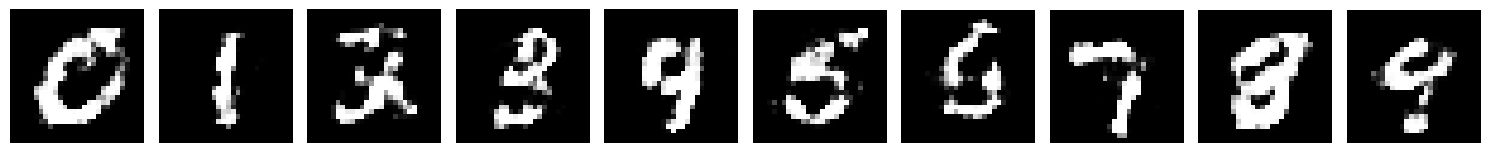

 75%|█████████████████████████▌        | 3/4 [30:33<07:45, 465.84s/it, 57001/60000, dis_loss: 0.3534, gen_loss: 1.8850]

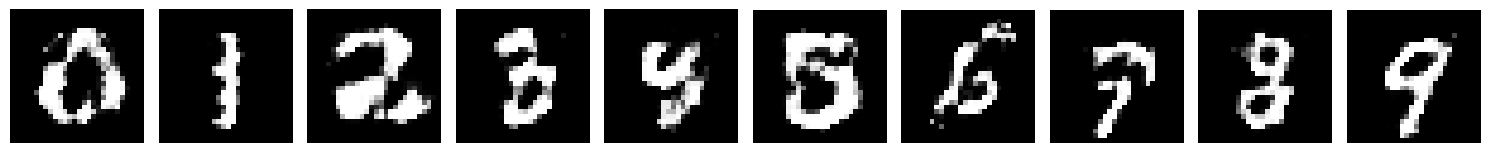

 75%|█████████████████████████▌        | 3/4 [30:42<07:45, 465.84s/it, 58001/60000, dis_loss: 0.3530, gen_loss: 1.8866]

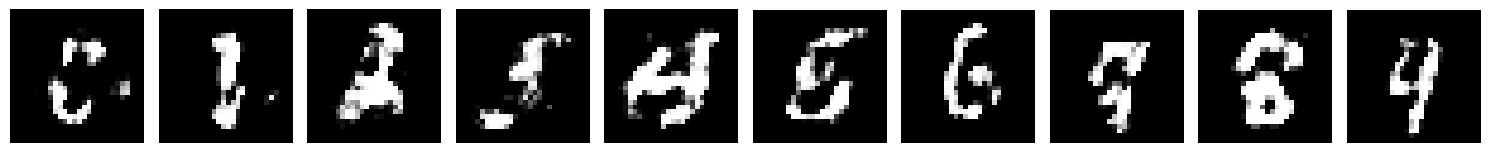

 75%|█████████████████████████▌        | 3/4 [30:52<07:45, 465.84s/it, 59001/60000, dis_loss: 0.3526, gen_loss: 1.8884]

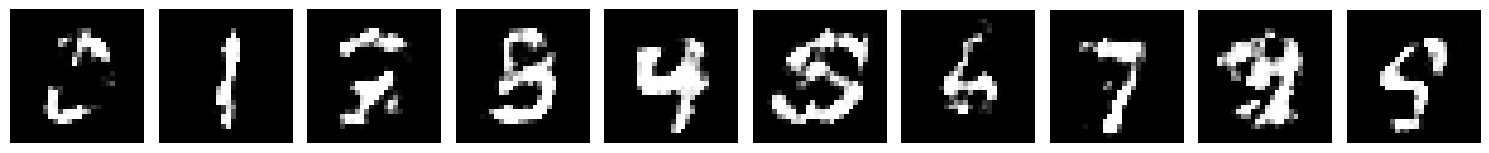

100%|██████████████████████████████████| 4/4 [31:03<00:00, 465.76s/it, 60000/60000, dis_loss: 0.3515, gen_loss: 1.8928]


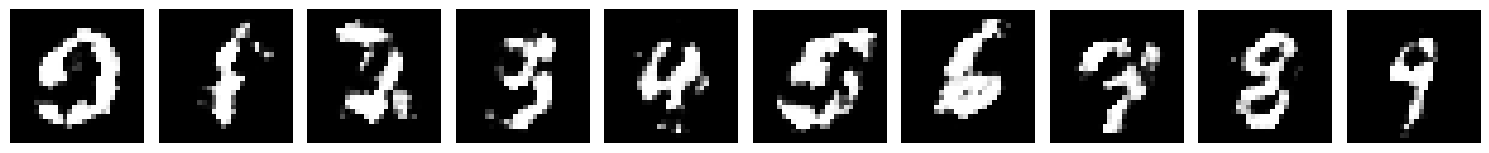

In [8]:
progress = tqdm(range(4))
for epoch in progress:
    dis_losses = []
    gen_losses = []
    
    for step, (x, label) in enumerate(train_dataset):
        one_hot = torch.nn.functional.one_hot(torch.tensor(label), 10).type(torch.FloatTensor).to(device)
        x = x.reshape(-1).to(device)
        x = torch.concat([x, one_hot], dim=0)
        target = torch.Tensor([1.]).to(device)
        pos_loss = train_step(discriminator, x, target, criterion, disc_optimizer)

        seed = torch.randn(100).to(device)
        seed = torch.concat([seed, one_hot], dim=0)
        x = generator(seed).detach()
        x = torch.concat([x, one_hot], dim=0)
        target = torch.Tensor([0.]).to(device)
        neg_loss = train_step(discriminator, x, target, criterion, disc_optimizer)

        seed = torch.randn(100).to(device)
        seed = torch.concat([seed, one_hot], dim=0)
        x = generator(seed)
        x = torch.concat([x, one_hot], dim=0)
        target = torch.Tensor([1.]).to(device)
        gen_loss = train_step(discriminator, x, target, criterion, genr_optimizer)

        dis_losses.append(pos_loss)
        dis_losses.append(neg_loss)
        gen_losses.append(gen_loss)

        progress.set_postfix_str(f"{step + 1}/{len(train_dataset)}, dis_loss: {np.mean(dis_losses):.04f}, gen_loss: {np.mean(gen_losses):.04f}")
        if step % 1000 == 0:
            show_plt(generator, 10)

generator.eval()
show_plt(generator, 10)

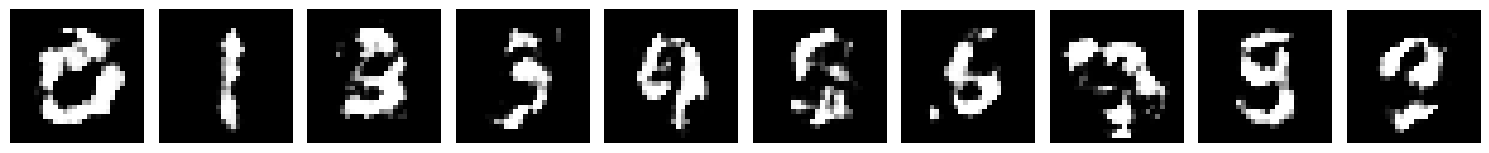

In [24]:
generator.eval()
show_plt(generator, 10)